# The Spark Foundation

## Data Science and Business Analytics Internship


### Task #4 : Exploratory Data Analysis - Terrorism

#### Author : Supriya Nagpal

#### Problem: Perform Exploratory Data Analysis (EDA) on Global Terrorism. As security / defense analytics, Find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?


#### Dataset : https://bit.ly/2TK5Xn5

### 1. Import Required Libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

### 2. Read Data

In [2]:
#Location of Data required
path = r"GlobalTerrorism.csv"
g_data = pd.read_csv(path)

In [3]:
g_data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


In [4]:
g_data.head() #Shows only first 5 rows of the data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
g_data.tail() ##Shows only last 5 rows of the data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
209701,202012310015,2020,12,31,12/31/2020,0,NaN,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,12/31/2020,0,NaN,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaN,75,Germany,8,...,NaN,"""Far-left arson attack suspected on German asy...","""Fire of Bundeswehr vehicles in Leipzig, proba...","""Anarchist Antifa Take Credit for Arson Attack...",START Primary Collection,-9,-9,0,-9,NaN
209704,202012310018,2020,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Civil society activist and tribal elder kille...","""Terrorism Digest: 1-2 Jan 21,"" BBC Monitoring...",NaN,START Primary Collection,-9,-9,0,-9,NaN
209705,202012310019,2020,12,31,NaN,1,NaN,33,Burkina Faso,11,...,NaN,"""Terrorism Digest: 3-4 Jan 21,"" BBC Monitoring...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
g_data #Shows the full data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,202012310015,2020,12,31,12/31/2020,0,NaN,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,12/31/2020,0,NaN,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaN,75,Germany,8,...,NaN,"""Far-left arson attack suspected on German asy...","""Fire of Bundeswehr vehicles in Leipzig, proba...","""Anarchist Antifa Take Credit for Arson Attack...",START Primary Collection,-9,-9,0,-9,NaN
209704,202012310018,2020,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Civil society activist and tribal elder kille...","""Terrorism Digest: 1-2 Jan 21,"" BBC Monitoring...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
g_data.shape #Gives number of rows and columns

(209706, 135)

In [8]:
g_data.describe() #Inform about important statistical terms depending on Data

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209705.000000,...,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,130.291351,7.279854,23.358696,30.416738,1.468387,...,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,111.714562,2.905697,18.137061,56.113029,0.984958,...,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,69.000000,6.000000,11.510046,8.748117,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,98.000000,8.000000,31.300213,43.746215,1.000000,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.557022,68.835918,1.000000,...,3.420000e+05,0.000000e+00,6.640600e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
g_data.columns #Tells the name of remaining columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
g_data.isnull().sum() #To check null value

eventid            0
iyear              0
imonth             0
iday               0
approxdate    197017
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       179102
Length: 135, dtype: int64

In [11]:
g_data.duplicated().sum() #To check duplicate value

0

### 3. Clean Data

In [12]:
for i in g_data.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [13]:
#Data of specific columns

g_data = g_data[["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "location", "summary", "attacktype1_txt", "targtype1_txt", "gname", "motive", "weaptype1_txt", "nkill", "nwound", "addnotes"]]

In [14]:
g_data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            209706 non-null  int64  
 1   imonth           209706 non-null  int64  
 2   iday             209706 non-null  int64  
 3   country_txt      209706 non-null  object 
 4   region_txt       209706 non-null  object 
 5   provstate        209706 non-null  object 
 6   city             209280 non-null  object 
 7   latitude         205015 non-null  float64
 8   longitude        205014 non-null  float64
 9   location         67475 non-null   object 
 10  summary          143586 non-null  object 
 11  attacktype1_txt  209706 non-null  object 
 12  targtype1_txt    209706 non-null  object 
 13  gname            209706 non-null  object 
 14  motive           55058 non-null   object 
 15  weaptype1_txt    209706 non-null  object 
 16  nkill            197179 non-null  floa

In [15]:
#Rename columns

g_data.rename(columns = {"iyear" : "Year", "imonth" : "Month", "iday" : "Day", "country_txt" : "Country", "region_txt" : "Region", "provstate" : "Proviance/State", "city" : "City", "latitude" : "Latitude", "longitude" : "Longitude", "location" : "Location", "summary" : "Summary", "attacktype1_txt" : "Attack Type", "targtype1_txt"  :"Target Type", "gname" : "Group Name", "motive" : "Motive", "weaptype1_txt" : "Weapon Type", "nkill" : "Killed", "nwound" : "Wounded", "addnotes" : "Add Notes"}, inplace = True)

In [16]:
g_data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             209706 non-null  int64  
 1   Month            209706 non-null  int64  
 2   Day              209706 non-null  int64  
 3   Country          209706 non-null  object 
 4   Region           209706 non-null  object 
 5   Proviance/State  209706 non-null  object 
 6   City             209280 non-null  object 
 7   Latitude         205015 non-null  float64
 8   Longitude        205014 non-null  float64
 9   Location         67475 non-null   object 
 10  Summary          143586 non-null  object 
 11  Attack Type      209706 non-null  object 
 12  Target Type      209706 non-null  object 
 13  Group Name       209706 non-null  object 
 14  Motive           55058 non-null   object 
 15  Weapon Type      209706 non-null  object 
 16  Killed           197179 non-null  floa

In [17]:
g_data.head() ##Shows only first 5 rows of the data

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [18]:
g_data.tail() ##Shows only last 5 rows of the data

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
209701,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,NaN,12/31/2020: Assailants fired mortar shells tar...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,NaN,NaN,NaN
209702,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,NaN,NaN,NaN
209703,2020,12,31,Germany,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,NaN,12/31/2020: Assailants set fire to German Army...,Facility/Infrastructure Attack,Military,Left-wing extremists,NaN,Incendiary,0.0,0.0,NaN
209704,2020,12,31,Afghanistan,South Asia,Kabul,Kabul,34.523842,69.140304,The incident occurred in Khair Khana neighborh...,12/31/2020: Assailants shot and killed a civil...,Armed Assault,Private Citizens & Property,Unknown,NaN,Firearms,1.0,0.0,NaN
209705,2020,12,31,Burkina Faso,Sub-Saharan Africa,Sahel,Kelbo,13.864252,-1.161453,NaN,12/31/2020: Assailants attacked a Volunteers o...,Armed Assault,Military,Unknown,NaN,Firearms,5.0,0.0,NaN


In [19]:
g_data #Shows the full data

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,NaN,12/31/2020: Assailants fired mortar shells tar...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,NaN,NaN,NaN
209702,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,NaN,NaN,NaN
209703,2020,12,31,Germany,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,NaN,12/31/2020: Assailants set fire to German Army...,Facility/Infrastructure Attack,Military,Left-wing extremists,NaN,Incendiary,0.0,0.0,NaN
209704,2020,12,31,Afghanistan,South Asia,Kabul,Kabul,34.523842,69.140304,The incident occurred in Khair Khana neighborh...,12/31/2020: Assailants shot and killed a civil...,Armed Assault,Private Citizens & Property,Unknown,NaN,Firearms,1.0,0.0,NaN


In [20]:
g_data.shape #Gives number of rows and columns

(209706, 19)

In [21]:
g_data.columns #Tells the name of remaining columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Proviance/State', 'City',
       'Latitude', 'Longitude', 'Location', 'Summary', 'Attack Type',
       'Target Type', 'Group Name', 'Motive', 'Weapon Type', 'Killed',
       'Wounded', 'Add Notes'],
      dtype='object')

In [22]:
g_data.isnull().sum() #To check null value

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
Proviance/State         0
City                  426
Latitude             4691
Longitude            4692
Location           142231
Summary             66120
Attack Type             0
Target Type             0
Group Name              0
Motive             154648
Weapon Type             0
Killed              12527
Wounded             19936
Add Notes          173897
dtype: int64

In [23]:
g_data.duplicated().sum() #To check duplicate value

11617

In [24]:
#Filling blanks

g_data["Killed"] = g_data["Killed"].fillna(0)
g_data["Wounded"] = g_data["Wounded"].fillna(0)
g_data["Casualty"] = g_data["Killed"] + g_data["Wounded"]

In [25]:
g_data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             209706 non-null  int64  
 1   Month            209706 non-null  int64  
 2   Day              209706 non-null  int64  
 3   Country          209706 non-null  object 
 4   Region           209706 non-null  object 
 5   Proviance/State  209706 non-null  object 
 6   City             209280 non-null  object 
 7   Latitude         205015 non-null  float64
 8   Longitude        205014 non-null  float64
 9   Location         67475 non-null   object 
 10  Summary          143586 non-null  object 
 11  Attack Type      209706 non-null  object 
 12  Target Type      209706 non-null  object 
 13  Group Name       209706 non-null  object 
 14  Motive           55058 non-null   object 
 15  Weapon Type      209706 non-null  object 
 16  Killed           209706 non-null  floa

In [26]:
g_data.head() #Shows only first 5 rows of the data

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [27]:
g_data.tail() ##Shows only last 5 rows of the data

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
209701,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,NaN,12/31/2020: Assailants fired mortar shells tar...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,0.0,0.0,NaN,0.0
209702,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,0.0,0.0,NaN,0.0
209703,2020,12,31,Germany,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,NaN,12/31/2020: Assailants set fire to German Army...,Facility/Infrastructure Attack,Military,Left-wing extremists,NaN,Incendiary,0.0,0.0,NaN,0.0
209704,2020,12,31,Afghanistan,South Asia,Kabul,Kabul,34.523842,69.140304,The incident occurred in Khair Khana neighborh...,12/31/2020: Assailants shot and killed a civil...,Armed Assault,Private Citizens & Property,Unknown,NaN,Firearms,1.0,0.0,NaN,1.0
209705,2020,12,31,Burkina Faso,Sub-Saharan Africa,Sahel,Kelbo,13.864252,-1.161453,NaN,12/31/2020: Assailants attacked a Volunteers o...,Armed Assault,Military,Unknown,NaN,Firearms,5.0,0.0,NaN,5.0


In [28]:
g_data #Shows the full data

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,NaN,12/31/2020: Assailants fired mortar shells tar...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,0.0,0.0,NaN,0.0
209702,2020,12,31,Yemen,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,Explosives,0.0,0.0,NaN,0.0
209703,2020,12,31,Germany,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,NaN,12/31/2020: Assailants set fire to German Army...,Facility/Infrastructure Attack,Military,Left-wing extremists,NaN,Incendiary,0.0,0.0,NaN,0.0
209704,2020,12,31,Afghanistan,South Asia,Kabul,Kabul,34.523842,69.140304,The incident occurred in Khair Khana neighborh...,12/31/2020: Assailants shot and killed a civil...,Armed Assault,Private Citizens & Property,Unknown,NaN,Firearms,1.0,0.0,NaN,1.0


In [29]:
g_data.shape #Gives number of rows and columns

(209706, 20)

In [30]:
g_data.columns #Tells the name of remaining columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Proviance/State', 'City',
       'Latitude', 'Longitude', 'Location', 'Summary', 'Attack Type',
       'Target Type', 'Group Name', 'Motive', 'Weapon Type', 'Killed',
       'Wounded', 'Add Notes', 'Casualty'],
      dtype='object')

In [31]:
g_data.isnull().sum() #To check null value

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
Proviance/State         0
City                  426
Latitude             4691
Longitude            4692
Location           142231
Summary             66120
Attack Type             0
Target Type             0
Group Name              0
Motive             154648
Weapon Type             0
Killed                  0
Wounded                 0
Add Notes          173897
Casualty                0
dtype: int64

In [32]:
g_data.duplicated().sum() #To check duplicate value

11761

In [33]:
g_data.describe() #Inform about important statistical terms depending on Data

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209706.000000,209706.00000,209706.000000
mean,2004.800993,6.455285,15.527930,23.358696,30.416738,2.285810,2.79251,5.078319
std,13.519321,3.387098,8.801104,18.137061,56.113029,11.012018,38.93325,44.832867
min,1970.000000,0.000000,0.000000,-53.154613,-176.176447,0.000000,0.00000,0.000000
25%,1992.000000,4.000000,8.000000,11.510046,8.748117,0.000000,0.00000,0.000000
50%,2012.000000,6.000000,15.000000,31.300213,43.746215,0.000000,0.00000,1.000000
75%,2015.000000,9.000000,23.000000,34.557022,68.835918,2.000000,2.00000,4.000000
max,2020.000000,12.000000,31.000000,74.633553,179.366667,1700.000000,10878.00000,12263.000000


1. The data we have considered is from 1970 to 2020.
2. The maximum number of killed in event: 1700
3. The maximum number of wounded in event: 10878
4. The maximum number of casualty in event: 12263

### 4. Visualize Data (Yearly)

In [34]:
#Yearwise Attack

YearAtck = g_data["Year"].value_counts(dropna = False).sort_index().to_frame().reset_index().rename(columns = {"index" : "Year", "Year" : "Attacks"}).set_index("Year")

In [35]:
YearAtck.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2020
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Attacks  50 non-null     int64
dtypes: int64(1)
memory usage: 800.0 bytes


In [36]:
YearAtck.head() #Shows only first 5 rows of the data

,Attacks
Year,
1970,651
1971,471
1972,567
1973,473
1974,581


In [37]:
YearAtck.tail() ##Shows only last 5 rows of the data

,Attacks
Year,
2016,14051
2017,11364
2018,9853
2019,8537
2020,8438


In [38]:
YearAtck #Shows the full data

,Attacks
Year,
1970,651
1971,471
1972,567
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


In [39]:
YearAtck.shape #Gives number of rows and columns

(50, 1)

In [40]:
YearAtck.describe() #Inform about important statistical terms depending on Data

,Attacks
count,50.000000
mean,4194.120000
std,3969.016074
min,471.000000
25%,1428.500000
50%,2986.000000
75%,4781.500000
max,16960.000000


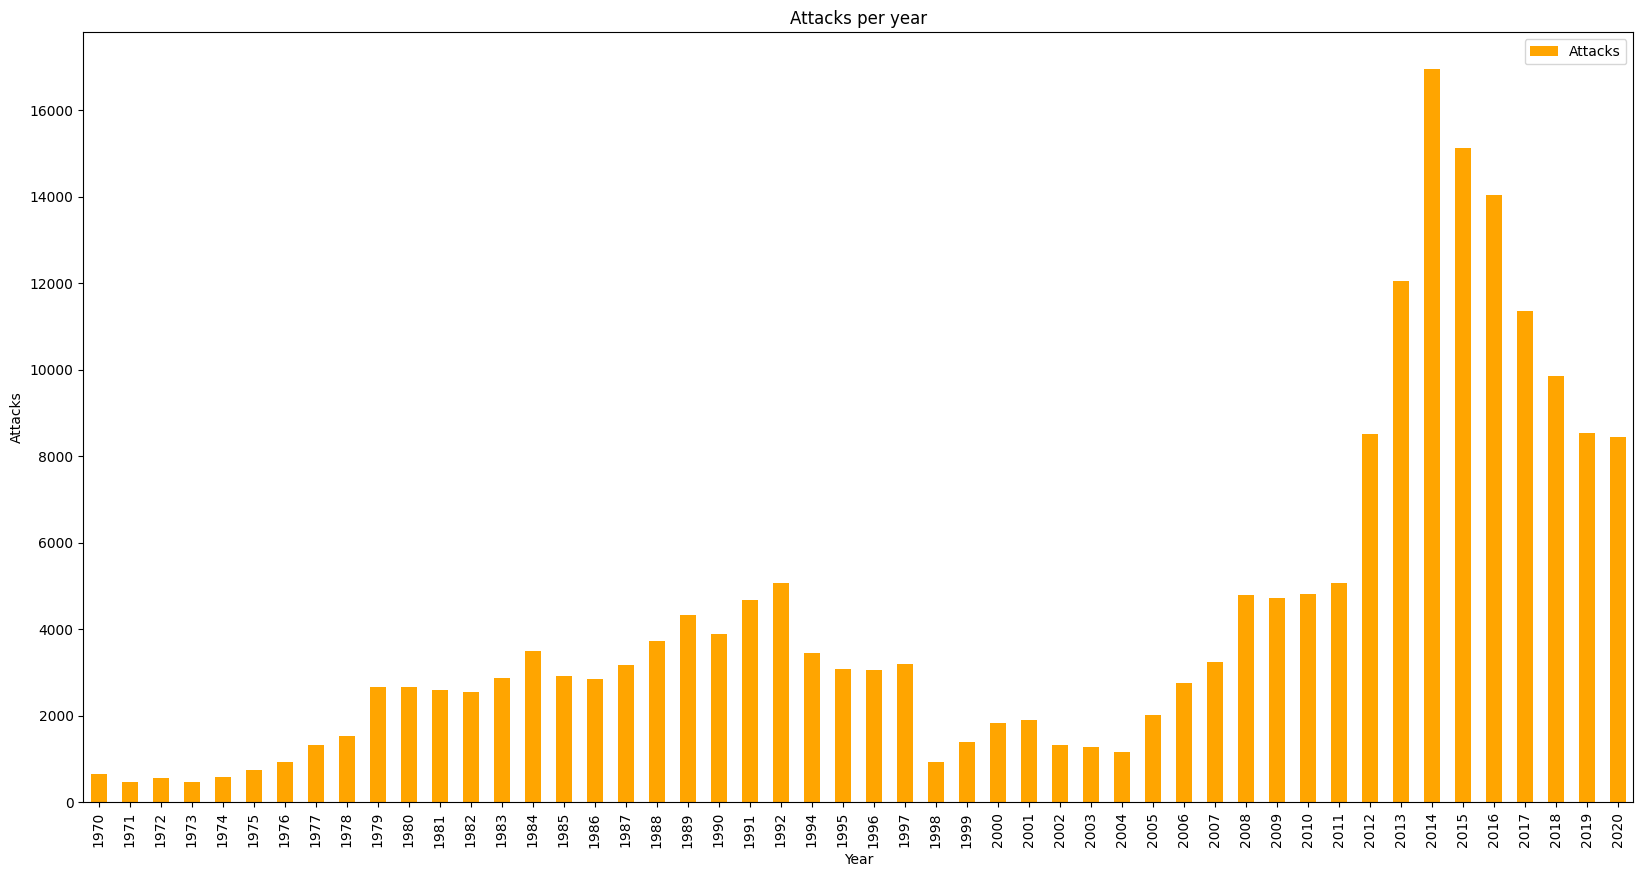

In [41]:
#Plot Attack Data

YearAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Attacks per year")
plt.xlabel("Year")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were in 1971 with attacks: 471
2. The most number of attacks were in 2014 with attacks: 16960

In [42]:
#Yearwise Casualty

YearCas = g_data[["Year", "Casualty"]].groupby("Year").sum()

In [43]:
YearCas.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2020
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Casualty  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


In [44]:
YearCas.head() #Shows only first 5 rows of the data

,Casualty
Year,
1970,386.0
1971,255.0
1972,894.0
1973,865.0
1974,1404.0


In [45]:
YearCas.tail() ##Shows only last 5 rows of the data

,Casualty
Year,
2016,75815.0
2017,52491.0
2018,43900.0
2019,39188.0
2020,38313.0


In [46]:
YearCas #Shows the full data

,Casualty
Year,
1970,386.0
1971,255.0
1972,894.0
1973,865.0
1974,1404.0
1975,1234.0
1976,1430.0
1977,978.0
1978,3059.0


In [47]:
YearCas.shape #Gives number of rows and columns

(50, 1)

In [48]:
YearCas.describe() #Inform about important statistical terms depending on Data

,Casualty
count,50.000000
mean,21299.080000
std,20755.422705
min,255.000000
25%,8557.500000
50%,14712.500000
75%,27505.500000
max,85791.000000


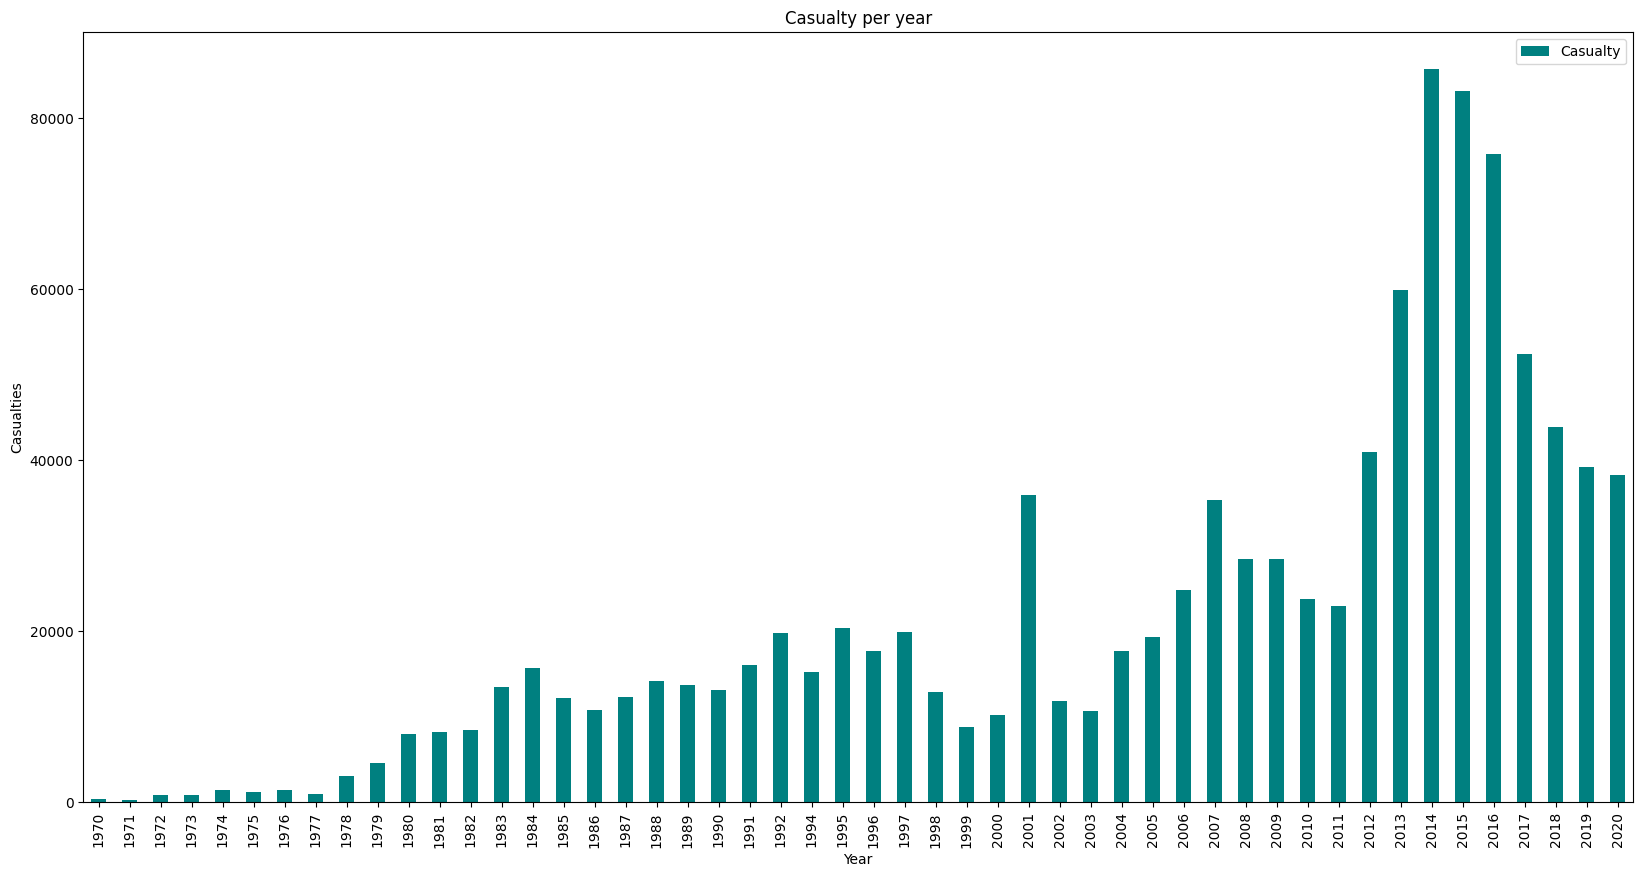

In [49]:
#Plot Casualty Data

YearCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per year")
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.show()

1. The least number of casualties were in 1971 with casualties: 255
2. The most number of casualties were in 2014 with casualties: 85791

In [50]:
#Yearwise Killed

YearKill = g_data[["Year", "Killed"]].groupby("Year").sum()

In [51]:
YearKill.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Killed  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


In [52]:
YearKill.head() #Shows only first 5 rows of the data

,Killed
Year,
1970,174.0
1971,173.0
1972,485.0
1973,370.0
1974,539.0


In [53]:
YearKill.tail() ##Shows only last 5 rows of the data

,Killed
Year,
2016,35239.0
2017,26897.0
2018,23291.0
2019,20412.0
2020,22847.0


In [54]:
YearKill #Shows the full data

,Killed
Year,
1970,174.0
1971,173.0
1972,485.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,457.0
1978,1459.0


In [55]:
YearKill.shape #Gives number of rows and columns

(50, 1)

In [56]:
YearKill.describe() #Inform about important statistical terms depending on Data

,Killed
count,50.000000
mean,9586.960000
std,9963.172724
min,173.000000
25%,4391.750000
50%,7065.000000
75%,9669.750000
max,44648.000000


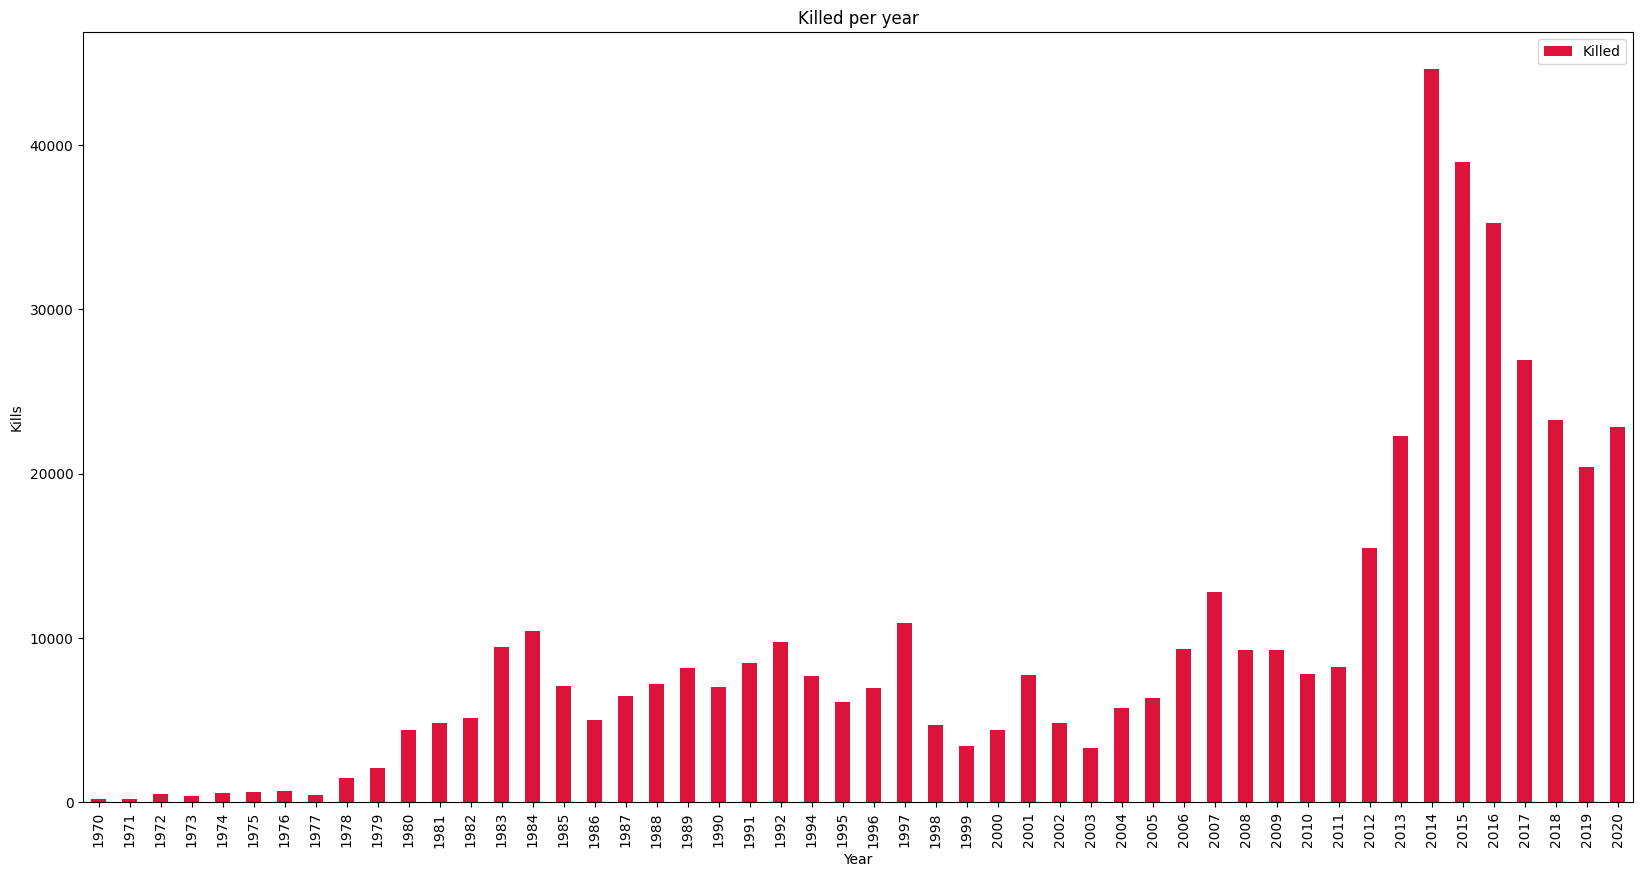

In [57]:
#Plot Killed Data

YearKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per year")
plt.xlabel("Year")
plt.ylabel("Kills")
plt.show()

1. The least number of kills were in 1971 with kills: 173
2. The most number of kills were in 2014 with kills: 44648

In [58]:
#Yearwise Wounded

YearWoun = g_data[["Year", "Wounded"]].groupby("Year").sum()

In [59]:
YearWoun.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2020
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wounded  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


In [60]:
YearWoun.head() #Shows only first 5 rows of the data

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


In [61]:
YearWoun.tail() ##Shows only last 5 rows of the data

,Wounded
Year,
2016,40576.0
2017,25594.0
2018,20609.0
2019,18776.0
2020,15466.0


In [62]:
YearWoun #Shows the full data

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0
1975,617.0
1976,756.0
1977,521.0
1978,1600.0


In [63]:
YearWoun.shape #Gives number of rows and columns

(50, 1)

In [64]:
YearWoun.describe() #Inform about important statistical terms depending on Data

,Wounded
count,50.000000
mean,11712.120000
std,11412.174639
min,82.000000
25%,3739.500000
50%,7476.500000
75%,15832.250000
max,44204.000000


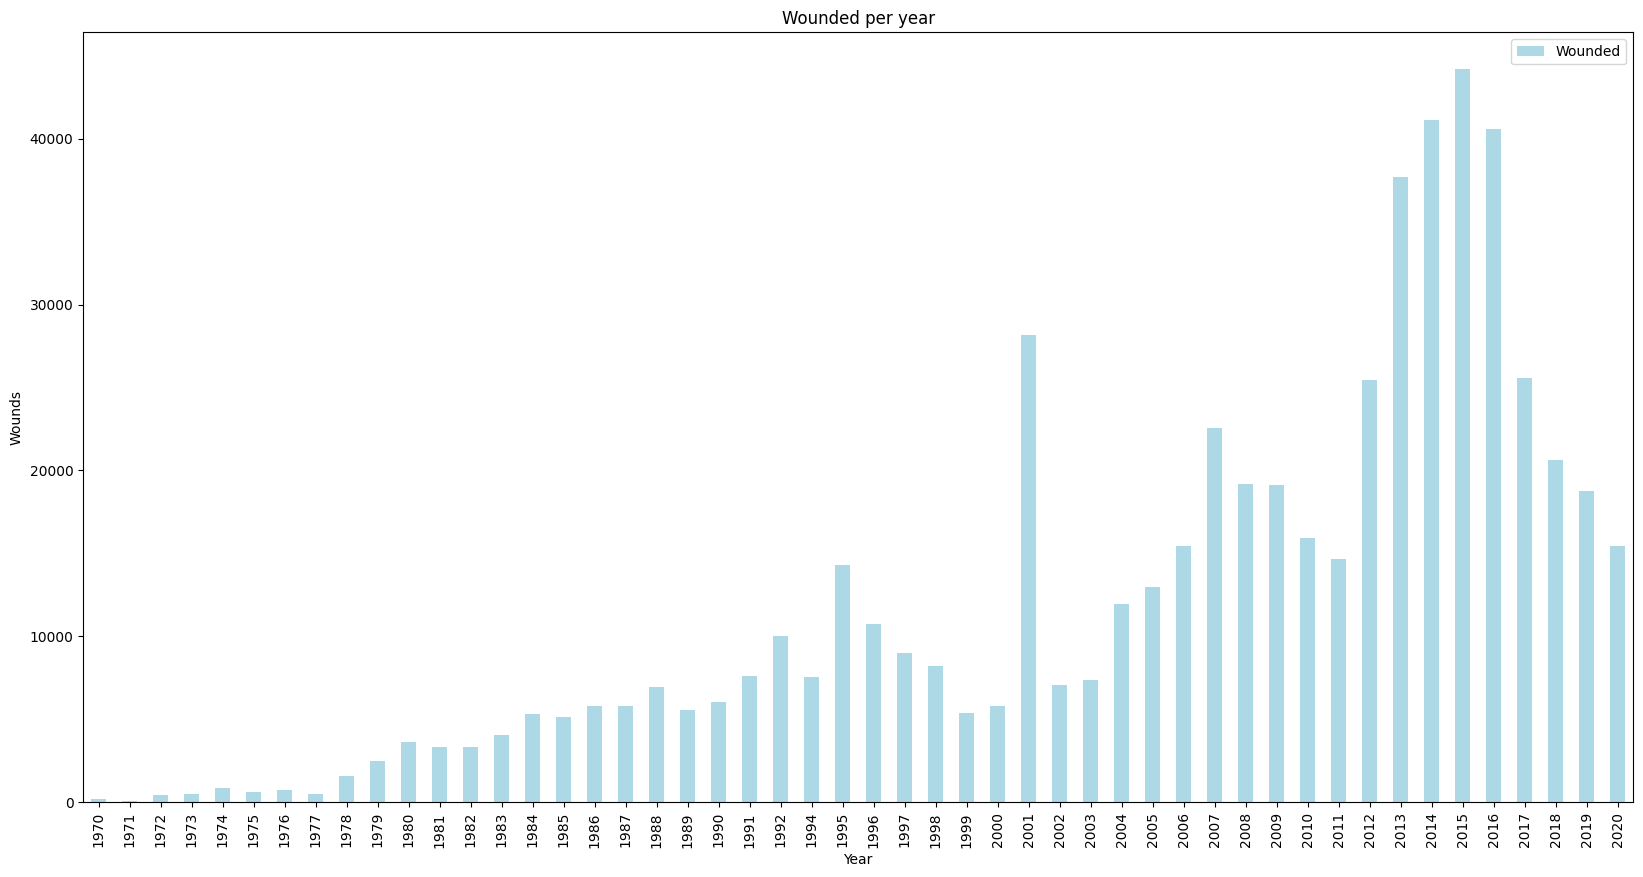

In [65]:
#Plot Wounded Data

YearWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per year")
plt.xlabel("Year")
plt.ylabel("Wounds")
plt.show()

1. The least number of wounds were in 1971 with wounds: 82
2. The most number of wounds were in 2015 with wounds: 44204

### 5. Visualize Data (Region)

In [66]:
#Region wise Attack

RegAtck = pd.crosstab(g_data.Year, g_data.Region)

In [67]:
RegAtck.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2020
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Australasia & Oceania        50 non-null     int64
 1   Central America & Caribbean  50 non-null     int64
 2   Central Asia                 50 non-null     int64
 3   East Asia                    50 non-null     int64
 4   Eastern Europe               50 non-null     int64
 5   Middle East & North Africa   50 non-null     int64
 6   North America                50 non-null     int64
 7   South America                50 non-null     int64
 8   South Asia                   50 non-null     int64
 9   Southeast Asia               50 non-null     int64
 10  Sub-Saharan Africa           50 non-null     int64
 11  Western Europe               50 non-null     int64
dtypes: int64(12)
memory usage: 5.1 KB


In [68]:
RegAtck.head() #Shows only first 5 rows of the data

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,15,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [69]:
RegAtck.tail() ##Shows only last 5 rows of the data

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
2016,10,3,17,8,136,6557,81,167,3641,1077,2082,272
2017,13,4,8,7,112,4183,105,179,3432,1024,2000,297
2018,21,15,7,6,72,2740,110,303,3287,875,2212,205
2019,5,15,3,18,44,2175,108,276,3039,715,1944,195
2020,21,13,6,21,60,1802,130,267,3418,419,1997,284


In [70]:
RegAtck #Shows the full data

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,15,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


In [71]:
RegAtck.shape #Gives number of rows and columns

(50, 12)

In [72]:
RegAtck.describe() #Inform about important statistical terms depending on Data

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.00000,50.000000,50.000000
mean,6.500000,207.720000,11.600000,16.940000,106.520000,1165.040000,76.940000,396.92000,1094.50000,289.96000,474.920000,346.560000
std,7.008013,327.558441,17.795895,21.481278,170.184682,1697.950349,73.475085,434.83198,1441.76706,331.98881,692.015832,216.035726
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,11.000000,24.00000,0.00000,2.00000,2.000000,50.000000
25%,1.000000,4.250000,0.000000,4.000000,3.250000,246.250000,36.250000,110.25000,41.25000,47.00000,63.250000,185.000000
50%,4.000000,13.500000,6.000000,9.500000,65.000000,446.000000,55.500000,182.00000,380.50000,165.50000,179.500000,307.000000
75%,10.000000,290.000000,11.750000,20.500000,137.500000,1378.250000,104.000000,483.50000,1582.75000,362.75000,419.000000,472.500000
max,29.000000,1148.000000,77.000000,99.000000,963.000000,6996.000000,472.000000,1492.00000,4997.00000,1188.00000,2321.000000,1020.000000


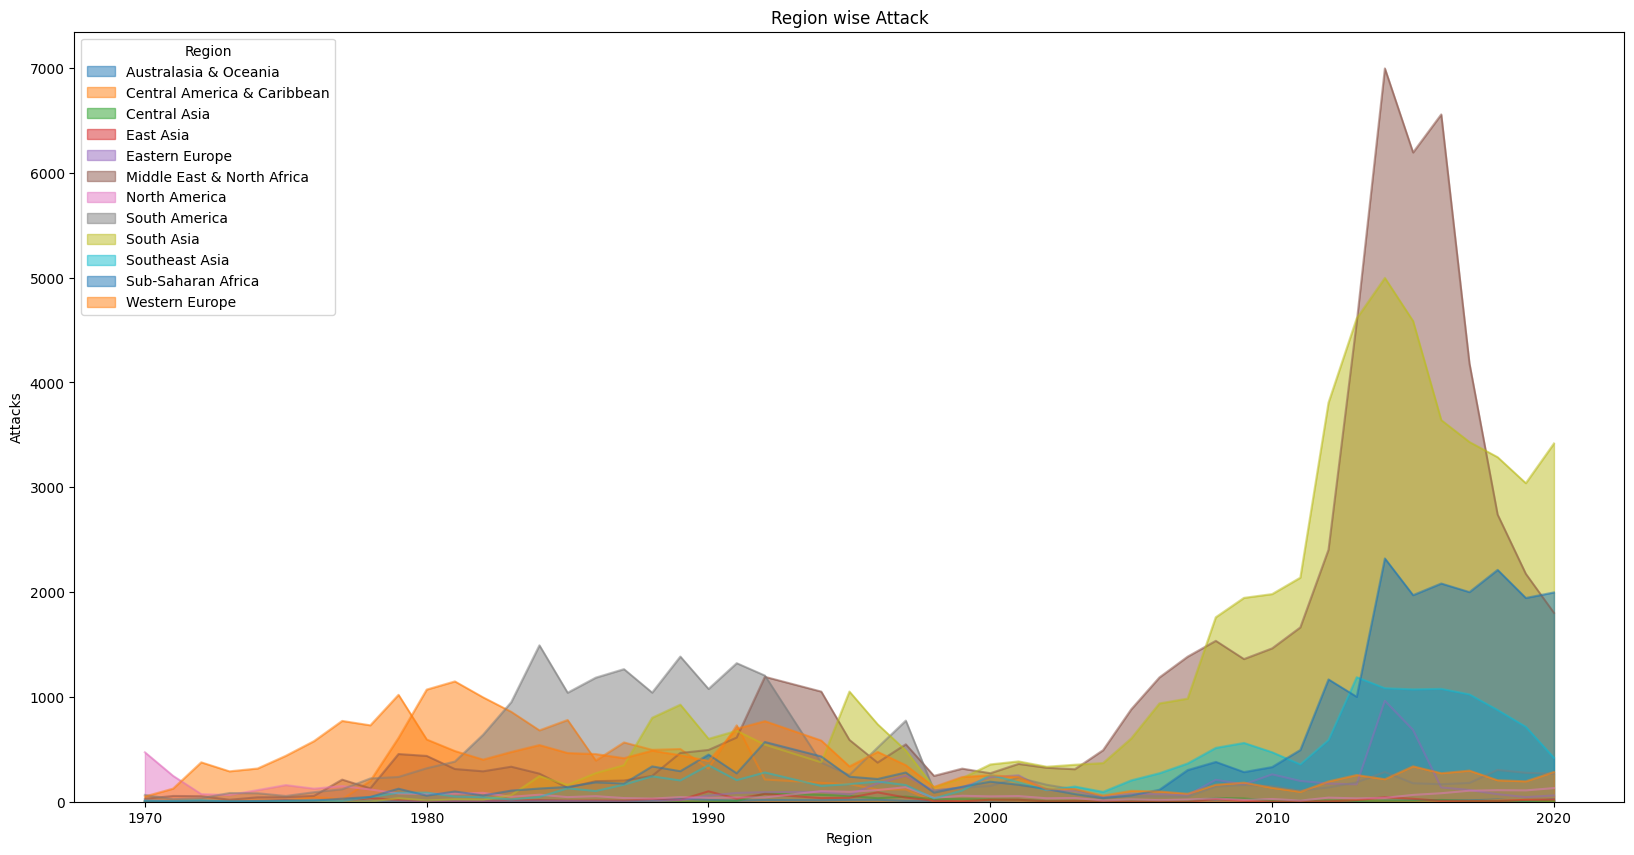

In [73]:
#Plot Attack Region Data

RegAtck.plot(kind = "area", figsize = (20,10), stacked = False, alpha = 0.5)
plt.title("Region wise Attack")
plt.xlabel("Region")
plt.ylabel("Attacks")
plt.show()

In [74]:
#Terrorist Attack per Region

Reg_TA = RegAtck.transpose()
Reg_TA["Total"] = Reg_TA.sum(axis = 1)
RA = Reg_TA["Total"].sort_values(ascending = False)

In [75]:
RA.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 12 entries, Middle East & North Africa to Australasia & Oceania
Series name: Total
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes


In [76]:
RA.head() #Shows only first 5 rows of the data

Region
Middle East & North Africa    58252
South Asia                    54725
Sub-Saharan Africa            23746
South America                 19846
Western Europe                17328
Name: Total, dtype: int64

In [77]:
RA.tail() ##Shows only last 5 rows of the data

Region
Eastern Europe           5326
North America            3847
East Asia                 847
Central Asia              580
Australasia & Oceania     325
Name: Total, dtype: int64

In [78]:
RA #Shows the full data

Region
Middle East & North Africa     58252
South Asia                     54725
Sub-Saharan Africa             23746
South America                  19846
Western Europe                 17328
Southeast Asia                 14498
Central America & Caribbean    10386
Eastern Europe                  5326
North America                   3847
East Asia                        847
Central Asia                     580
Australasia & Oceania            325
Name: Total, dtype: int64

In [79]:
RA.shape #Gives number of rows and columns

(12,)

In [80]:
RA.describe() #Inform about important statistical terms depending on Data

count       12.000000
mean     17475.500000
std      19871.829904
min        325.000000
25%       3097.000000
50%      12442.000000
75%      20821.000000
max      58252.000000
Name: Total, dtype: float64

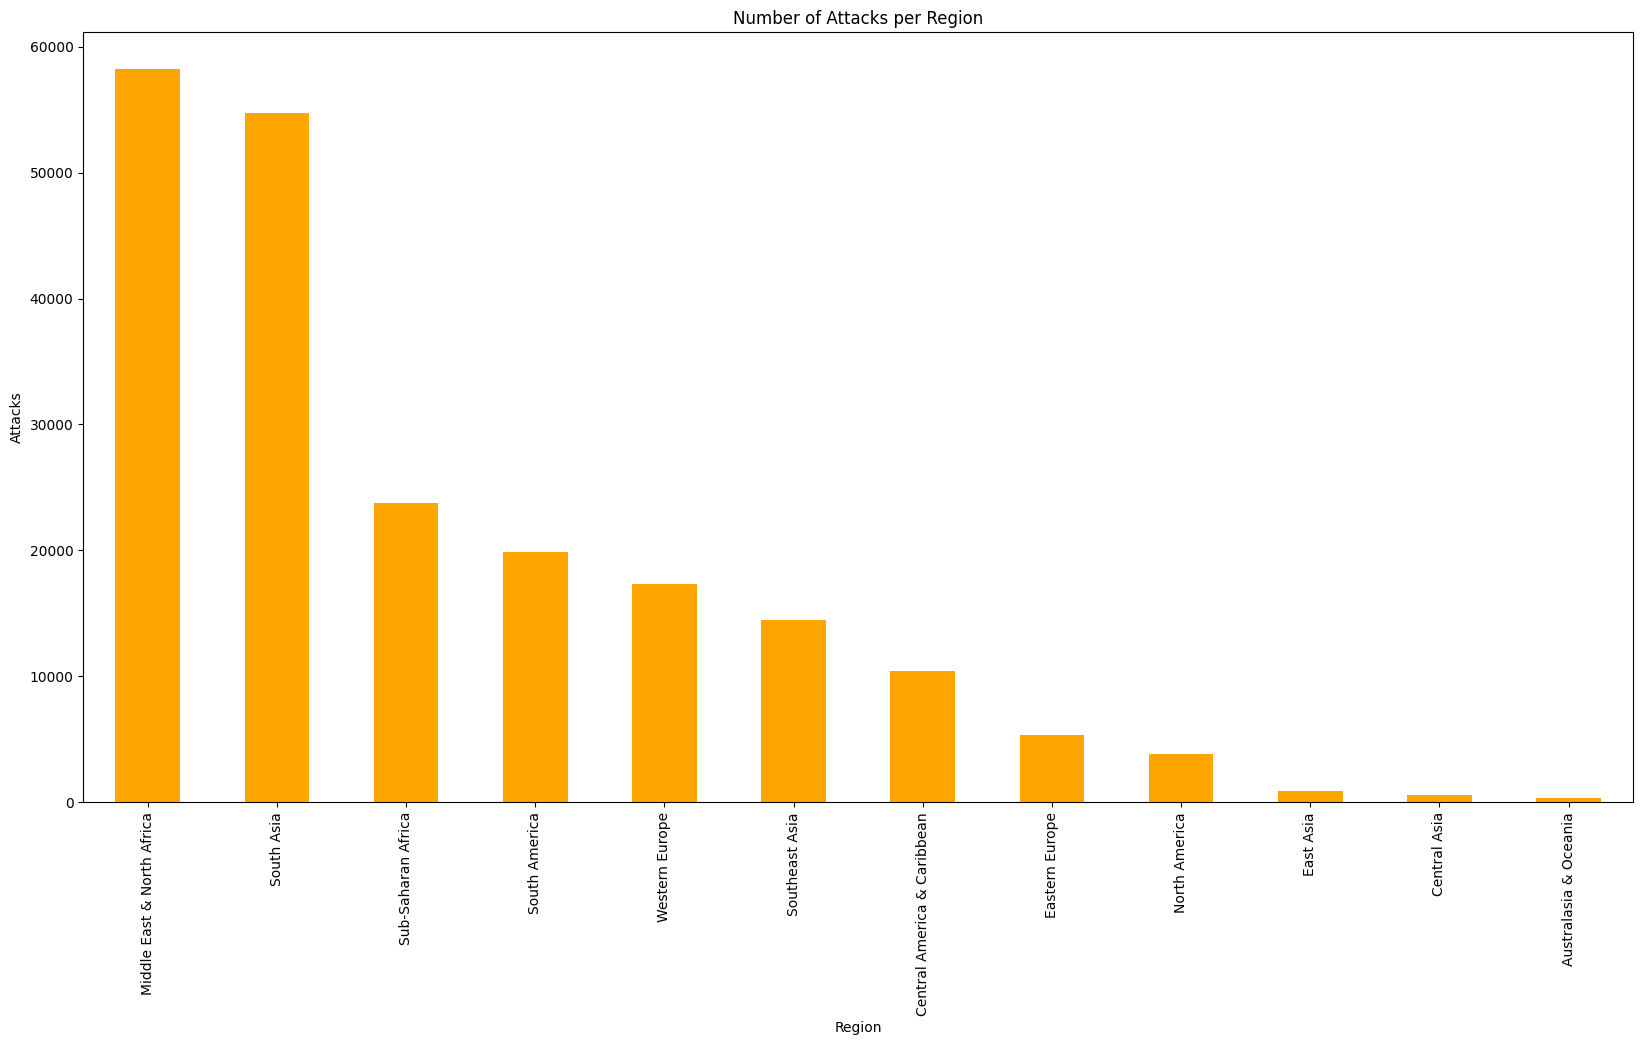

In [81]:
#Plot Attack Data

RA.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Number of Attacks per Region")
plt.xlabel("Region")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were in Australasia and Oceania with attacks: 325
2. The most number of attacks were in Middle East & North Africa with attacks: 58252

In [82]:
#Regionwise Casualty

RegCas = g_data[["Region", "Casualty"]].groupby("Region").sum().sort_values(by = "Casualty", ascending = False)

In [83]:
RegCas.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Middle East & North Africa to Australasia & Oceania
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Casualty  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


In [84]:
RegCas.head() #Shows only first 5 rows of the data

,Casualty
Region,
Middle East & North Africa,378559.0
South Asia,301359.0
Sub-Saharan Africa,163402.0
South America,46888.0
Southeast Asia,45503.0


In [85]:
RegCas.tail() ##Shows only last 5 rows of the data

,Casualty
Region,
Western Europe,25482.0
Eastern Europe,19615.0
East Asia,10391.0
Central Asia,3105.0
Australasia & Oceania,519.0


In [86]:
RegCas #Shows the full data

,Casualty
Region,
Middle East & North Africa,378559.0
South Asia,301359.0
Sub-Saharan Africa,163402.0
South America,46888.0
Southeast Asia,45503.0
Central America & Caribbean,37718.0
North America,32413.0
Western Europe,25482.0
Eastern Europe,19615.0


In [87]:
RegCas.shape #Gives number of rows and columns

(12, 1)

In [88]:
RegCas.describe() #Inform about important statistical terms depending on Data

,Casualty
count,12.000000
mean,88746.166667
std,125845.508914
min,519.000000
25%,17309.000000
50%,35065.500000
75%,76016.500000
max,378559.000000


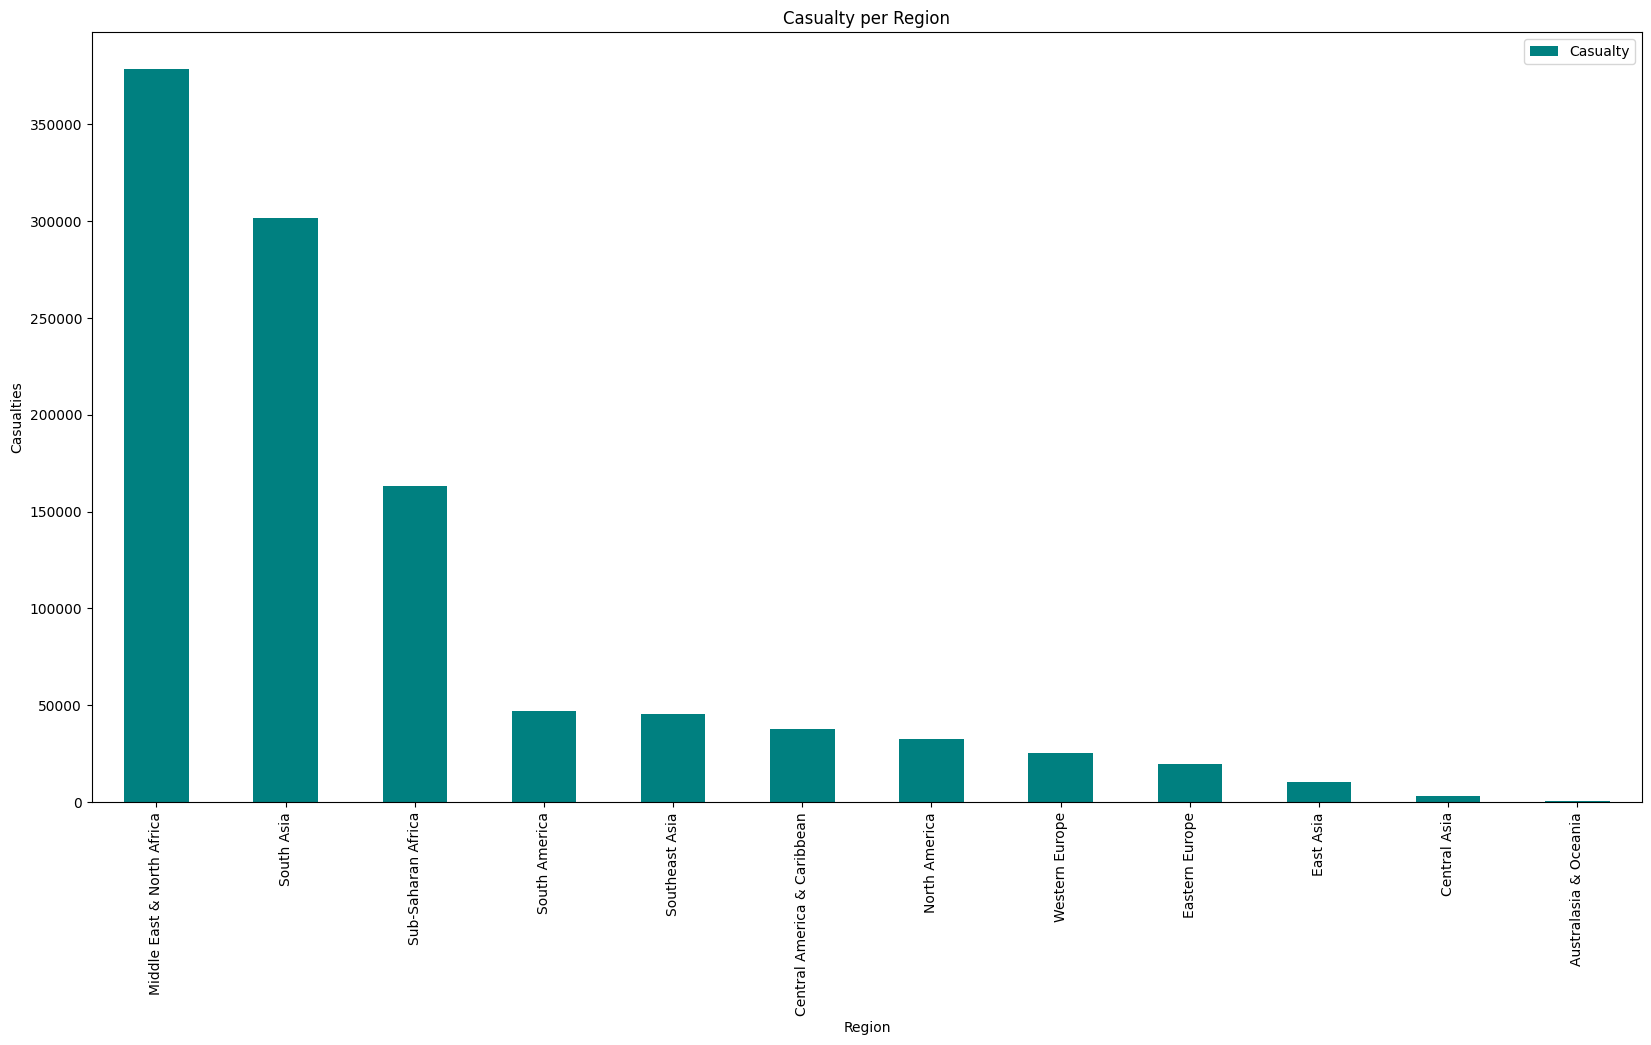

In [89]:
#Plot Casualty Data

RegCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per Region")
plt.xlabel("Region")
plt.ylabel("Casualties")
plt.show()

1. The least number of casualties were in Australasia and Oceania with casualties: 519
2. The most number of casualties were in Middle East and North Africa with casualties: 378559

In [90]:
#Regionwise Killed

RegKill = g_data[["Region", "Killed"]].groupby("Region").sum()

In [91]:
RegKill.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Australasia & Oceania to Western Europe
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Killed  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


In [92]:
RegKill.head() #Shows only first 5 rows of the data

,Killed
Region,
Australasia & Oceania,205.0
Central America & Caribbean,28730.0
Central Asia,1084.0
East Asia,1154.0
Eastern Europe,7483.0


In [93]:
RegKill.tail() ##Shows only last 5 rows of the data

,Killed
Region,
South America,29388.0
South Asia,132037.0
Southeast Asia,17109.0
Sub-Saharan Africa,100557.0
Western Europe,6709.0


In [94]:
RegKill #Shows the full data

,Killed
Region,
Australasia & Oceania,205.0
Central America & Caribbean,28730.0
Central Asia,1084.0
East Asia,1154.0
Eastern Europe,7483.0
Middle East & North Africa,149739.0
North America,5153.0
South America,29388.0
South Asia,132037.0


In [95]:
RegKill.shape #Gives number of rows and columns

(12, 1)

In [96]:
RegKill.describe() #Inform about important statistical terms depending on Data

,Killed
count,12.000000
mean,39945.666667
std,54715.184709
min,205.000000
25%,4153.250000
50%,12296.000000
75%,47180.250000
max,149739.000000


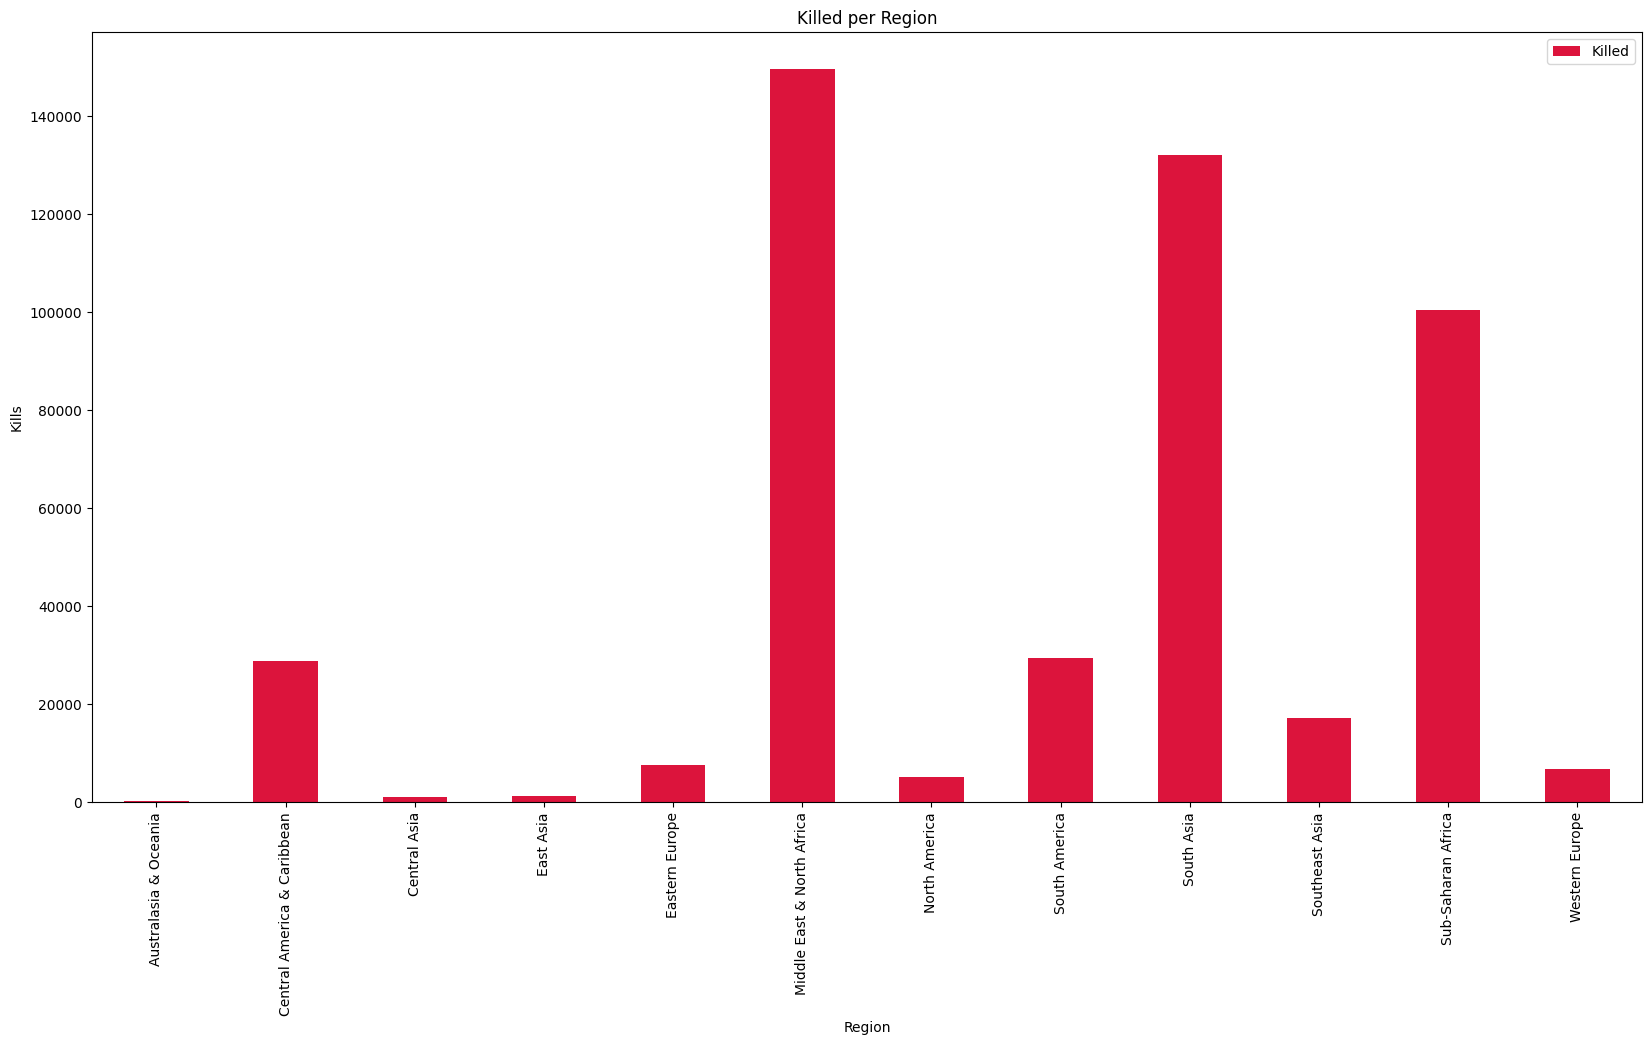

In [97]:
#Plot Killed Data

RegKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per Region")
plt.xlabel("Region")
plt.ylabel("Kills")
plt.show()

1. The least number of kills were in Australasia and Oceania with kills: 205
2. The most number of kills were in Middle East & North Africa with kills: 149739

In [98]:
#Regionwise Wounded

RegWoun = g_data[["Region", "Wounded"]].groupby("Region").sum()

In [99]:
RegWoun.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Australasia & Oceania to Western Europe
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wounded  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


In [100]:
RegWoun.head() #Shows only first 5 rows of the data

,Wounded
Region,
Australasia & Oceania,314.0
Central America & Caribbean,8988.0
Central Asia,2021.0
East Asia,9237.0
Eastern Europe,12132.0


In [101]:
RegWoun.tail() ##Shows only last 5 rows of the data

,Wounded
Region,
South America,17500.0
South Asia,169322.0
Southeast Asia,28394.0
Sub-Saharan Africa,62845.0
Western Europe,18773.0


In [102]:
RegWoun #Shows the full data

,Wounded
Region,
Australasia & Oceania,314.0
Central America & Caribbean,8988.0
Central Asia,2021.0
East Asia,9237.0
Eastern Europe,12132.0
Middle East & North Africa,228820.0
North America,27260.0
South America,17500.0
South Asia,169322.0


In [103]:
RegWoun.shape #Gives number of rows and columns

(12, 1)

In [104]:
RegWoun.describe() #Inform about important statistical terms depending on Data

,Wounded
count,12.000000
mean,48800.500000
std,73190.683489
min,314.000000
25%,9174.750000
50%,18136.500000
75%,37006.750000
max,228820.000000


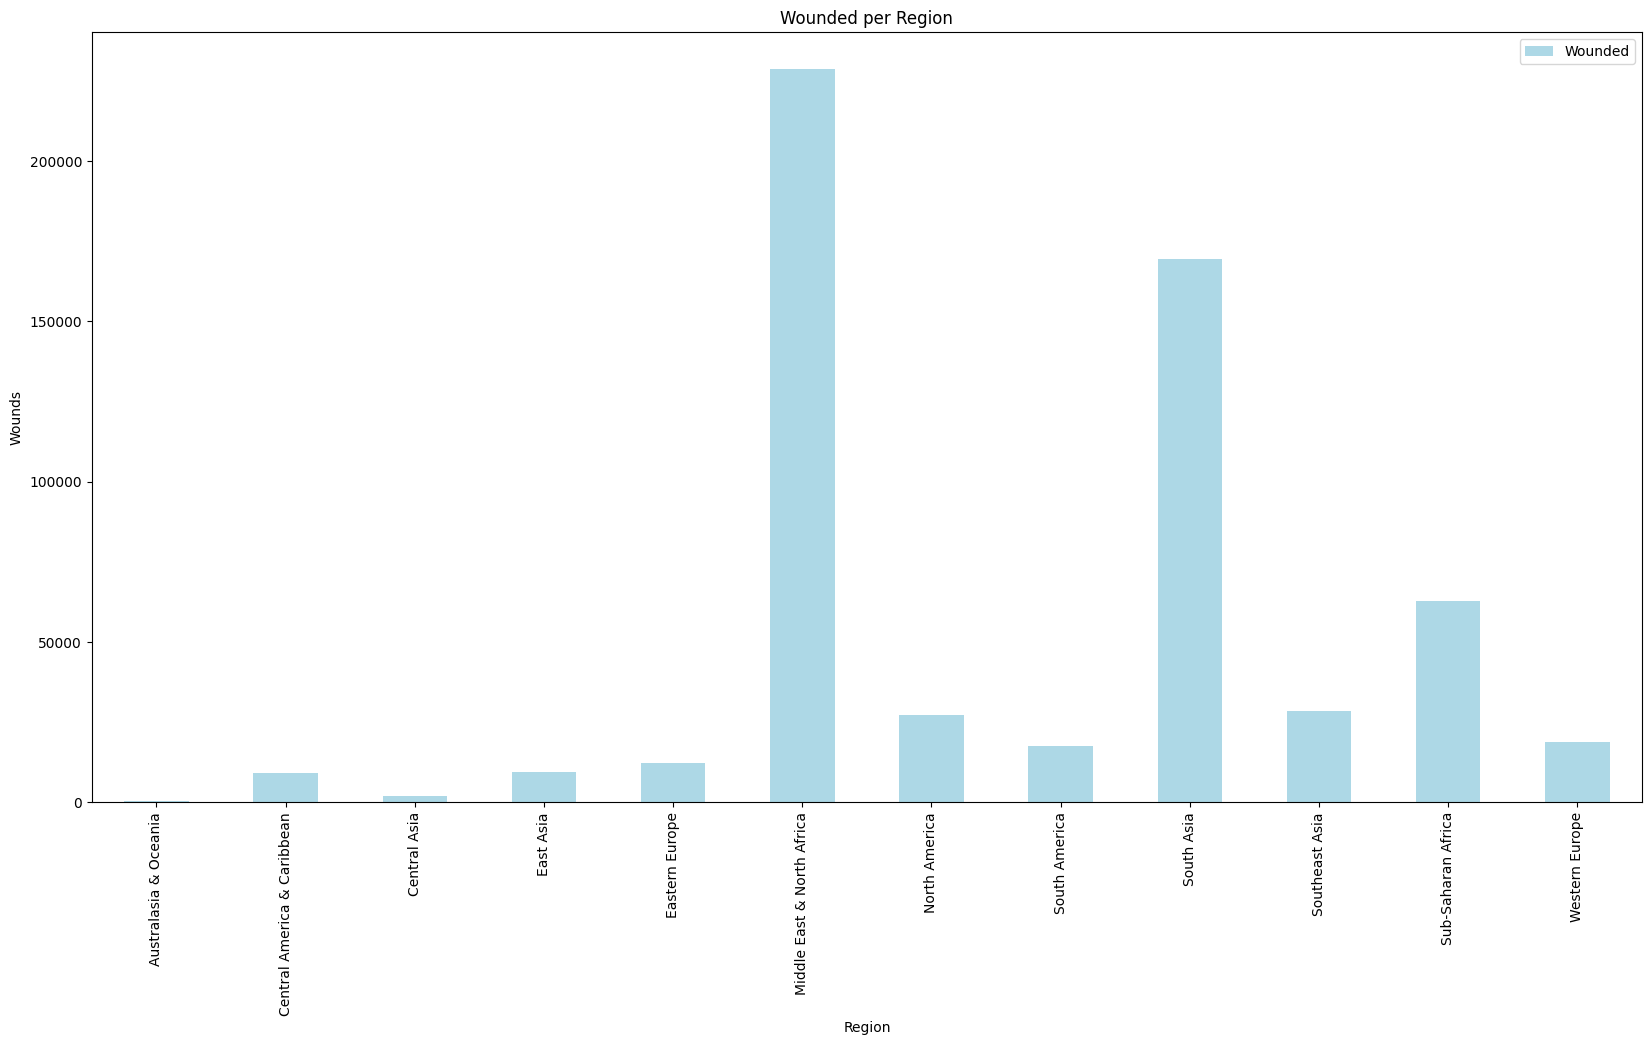

In [105]:
#Plot Wounded Data

RegWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per Region")
plt.xlabel("Region")
plt.ylabel("Wounds")
plt.show()

1. The least number of wounds were in Australasia and Oceania with wounds 314
2. The most number of wounds were in Middle East & North Africa with wounds 228820

### 6. Visualize Data (Country{Top 20})

In [106]:
#Country wise Attack

CounAtck = g_data["Country"].value_counts().head(20)

In [107]:
CounAtck.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Iraq to France
Series name: Country
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [108]:
CounAtck.head() #Shows only first 5 rows of the data

Iraq           27521
Afghanistan    18920
Pakistan       15504
India          13929
Colombia        8915
Name: Country, dtype: int64

In [109]:
CounAtck.tail() ##Shows only last 5 rows of the data

United States    3121
Sri Lanka        3041
Syria            2997
Algeria          2753
France           2751
Name: Country, dtype: int64

In [110]:
CounAtck #Shows the full data

Iraq              27521
Afghanistan       18920
Pakistan          15504
India             13929
Colombia           8915
Philippines        8271
Peru               6111
Yemen              6027
Nigeria            5550
United Kingdom     5513
El Salvador        5320
Somalia            5317
Turkey             4485
Thailand           4201
Spain              3255
United States      3121
Sri Lanka          3041
Syria              2997
Algeria            2753
France             2751
Name: Country, dtype: int64

In [111]:
CounAtck.shape #Gives number of rows and columns

(20,)

In [112]:
CounAtck.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      7675.100000
std       6498.663684
min       2751.000000
25%       3221.500000
50%       5416.500000
75%       8432.000000
max      27521.000000
Name: Country, dtype: float64

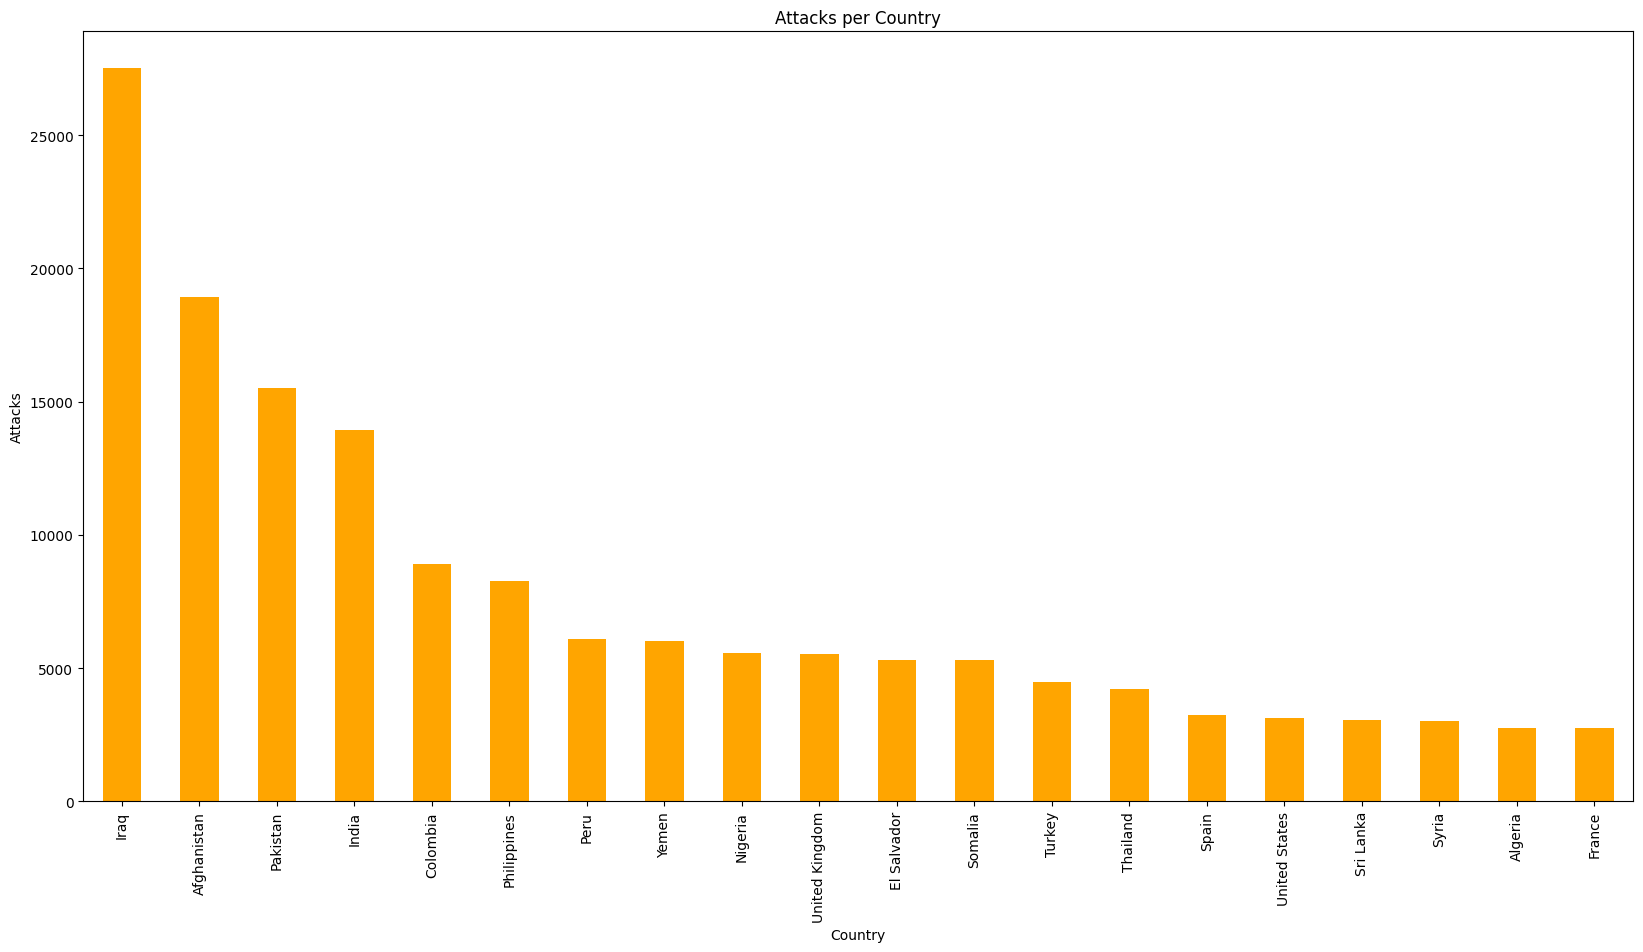

In [113]:
#Plot Attack Data

CounAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Attacks per Country")
plt.xlabel("Country")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were in France with attacks: 2751
2. The most number of attacks were in Iraq with attacks: 27521

In [114]:
#Country wise Casualty

CounCas = g_data["Country"].value_counts().head(20)

In [115]:
CounCas.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Iraq to France
Series name: Country
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [116]:
CounCas.head() #Shows only first 5 rows of the data

Iraq           27521
Afghanistan    18920
Pakistan       15504
India          13929
Colombia        8915
Name: Country, dtype: int64

In [117]:
CounCas.tail() ##Shows only last 5 rows of the data

United States    3121
Sri Lanka        3041
Syria            2997
Algeria          2753
France           2751
Name: Country, dtype: int64

In [118]:
CounCas #Shows the full data

Iraq              27521
Afghanistan       18920
Pakistan          15504
India             13929
Colombia           8915
Philippines        8271
Peru               6111
Yemen              6027
Nigeria            5550
United Kingdom     5513
El Salvador        5320
Somalia            5317
Turkey             4485
Thailand           4201
Spain              3255
United States      3121
Sri Lanka          3041
Syria              2997
Algeria            2753
France             2751
Name: Country, dtype: int64

In [119]:
CounCas.shape #Gives number of rows and columns

(20,)

In [120]:
CounCas.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      7675.100000
std       6498.663684
min       2751.000000
25%       3221.500000
50%       5416.500000
75%       8432.000000
max      27521.000000
Name: Country, dtype: float64

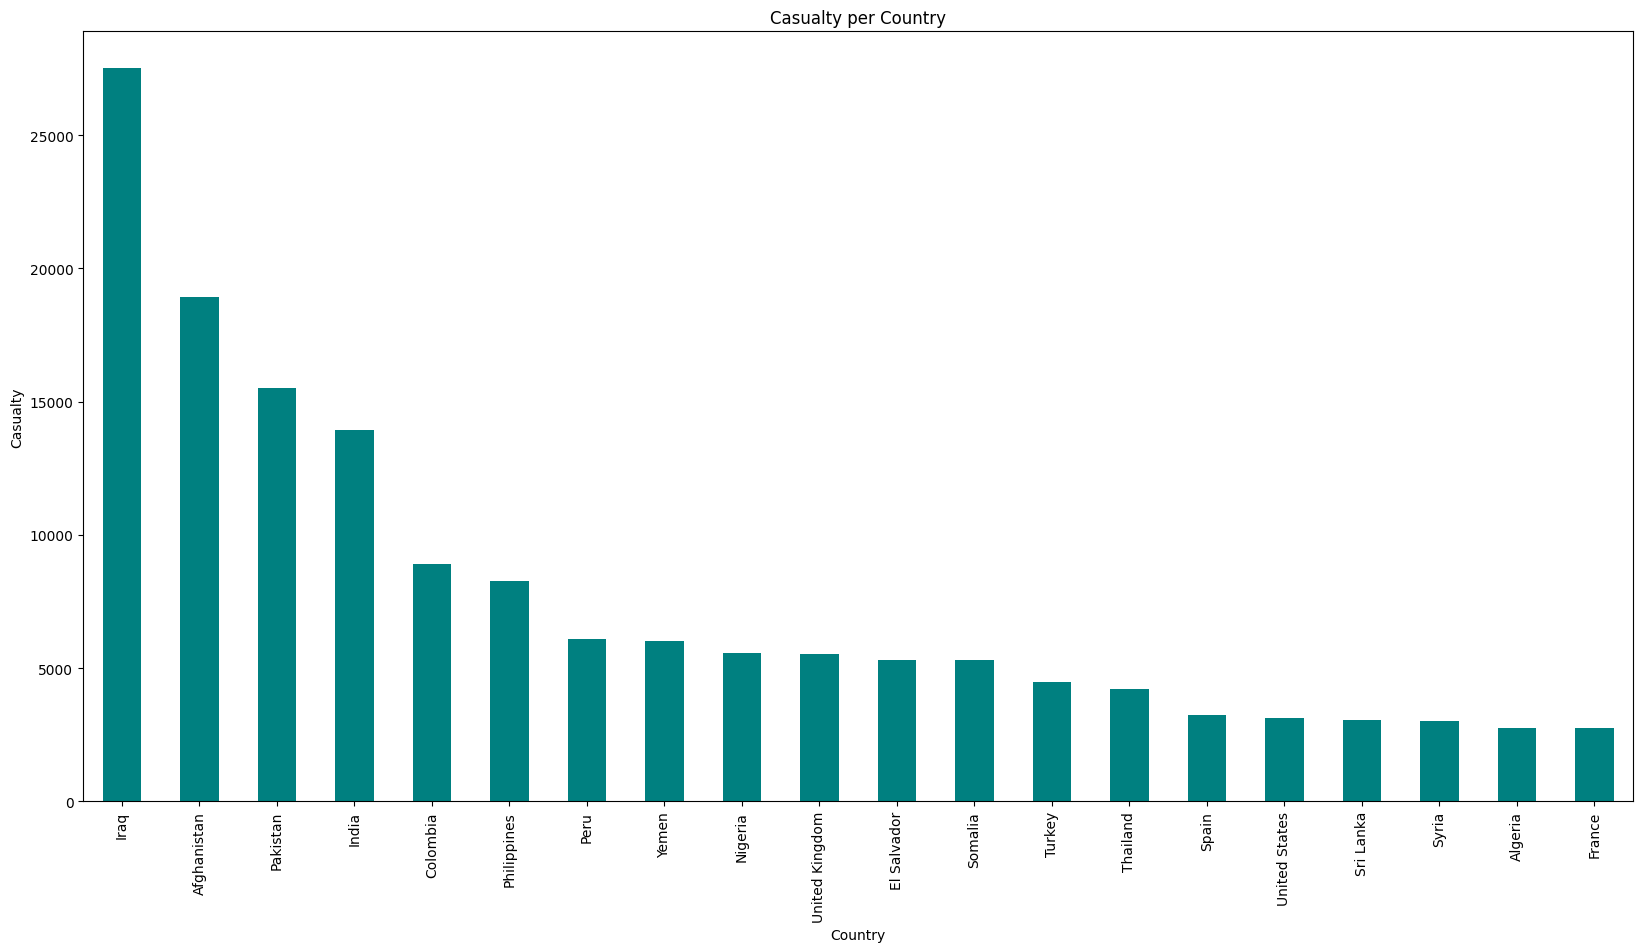

In [121]:
#Plot Casualty Data

CounCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per Country")
plt.xlabel("Country")
plt.ylabel("Casualty")
plt.show()

1. The least number of casualties were in France with casualties: 2751
2. The most number of casualties were in Iraq with casualties: 27521

In [122]:
#Country wise Killed

CounKill = g_data["Country"].value_counts().head(20)

In [123]:
CounKill.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Iraq to France
Series name: Country
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [124]:
CounKill.head() #Shows only first 5 rows of the data

Iraq           27521
Afghanistan    18920
Pakistan       15504
India          13929
Colombia        8915
Name: Country, dtype: int64

In [125]:
CounKill.tail() ##Shows only last 5 rows of the data

United States    3121
Sri Lanka        3041
Syria            2997
Algeria          2753
France           2751
Name: Country, dtype: int64

In [126]:
CounKill #Shows the full data

Iraq              27521
Afghanistan       18920
Pakistan          15504
India             13929
Colombia           8915
Philippines        8271
Peru               6111
Yemen              6027
Nigeria            5550
United Kingdom     5513
El Salvador        5320
Somalia            5317
Turkey             4485
Thailand           4201
Spain              3255
United States      3121
Sri Lanka          3041
Syria              2997
Algeria            2753
France             2751
Name: Country, dtype: int64

In [127]:
CounKill.shape #Gives number of rows and columns

(20,)

In [128]:
CounKill.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      7675.100000
std       6498.663684
min       2751.000000
25%       3221.500000
50%       5416.500000
75%       8432.000000
max      27521.000000
Name: Country, dtype: float64

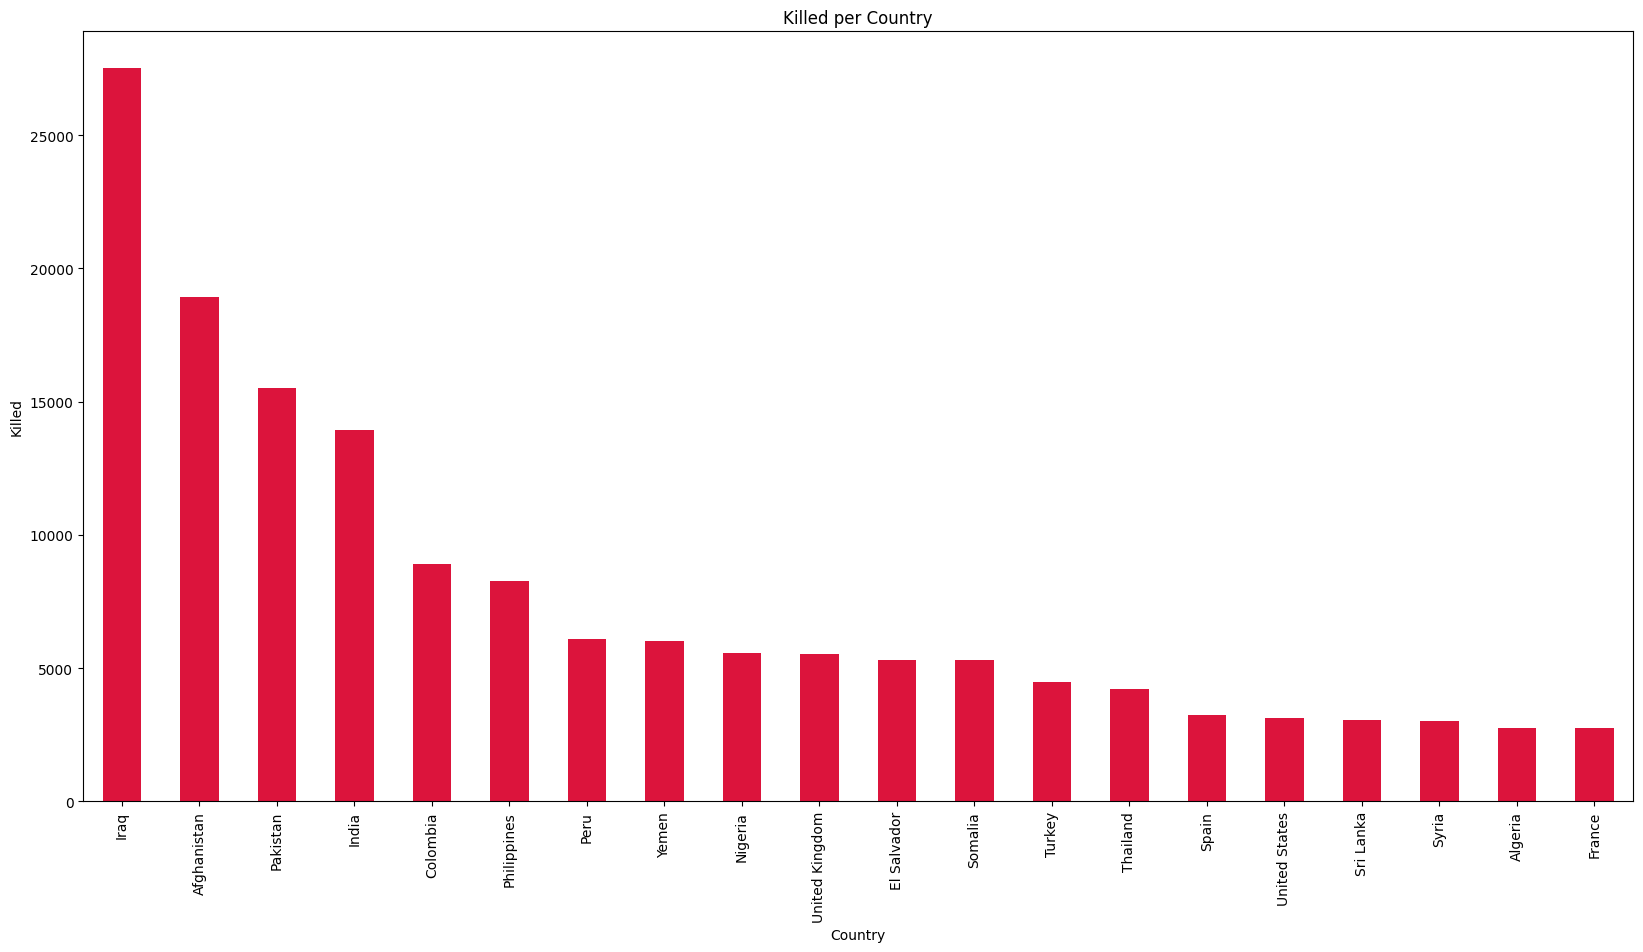

In [129]:
#Plot Killed Data

CounKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per Country")
plt.xlabel("Country")
plt.ylabel("Killed")
plt.show()

1. The least number of kills were in France with kills: 2751
2. The most number of kills were in Iraq with kills: 27521

In [130]:
#Country wise Wounded

CounWoun = g_data[["Country", "Wounded"]].value_counts().head(20)

In [131]:
CounWoun.info() #Information about Data

<class 'pandas.core.series.Series'>
MultiIndex: 20 entries, ('Iraq', 0.0) to ('Chile', 0.0)
Series name: None
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 3.8+ KB


In [132]:
CounWoun.head() #Shows only first 5 rows of the data

Country      Wounded
Iraq         0.0        11038
India        0.0         9635
Pakistan     0.0         9580
Afghanistan  0.0         8773
Colombia     0.0         7137
dtype: int64

In [133]:
CounWoun.tail() ##Shows only last 5 rows of the data

Country   Wounded
Thailand  0.0        2554
Iraq      2.0        2484
          1.0        2483
France    0.0        2442
Chile     0.0        2224
dtype: int64

In [134]:
CounWoun #Shows the full data

Country         Wounded
Iraq            0.0        11038
India           0.0         9635
Pakistan        0.0         9580
Afghanistan     0.0         8773
Colombia        0.0         7137
Philippines     0.0         5605
Peru            0.0         5246
United Kingdom  0.0         4559
El Salvador     0.0         4559
Yemen           0.0         4185
Nigeria         0.0         4100
Somalia         0.0         3590
Turkey          0.0         2922
United States   0.0         2687
Spain           0.0         2601
Thailand        0.0         2554
Iraq            2.0         2484
                1.0         2483
France          0.0         2442
Chile           0.0         2224
dtype: int64

In [135]:
CounWoun.shape #Gives number of rows and columns

(20,)

In [136]:
CounWoun.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      4920.200000
std       2811.546579
min       2224.000000
25%       2589.250000
50%       4142.500000
75%       5988.000000
max      11038.000000
dtype: float64

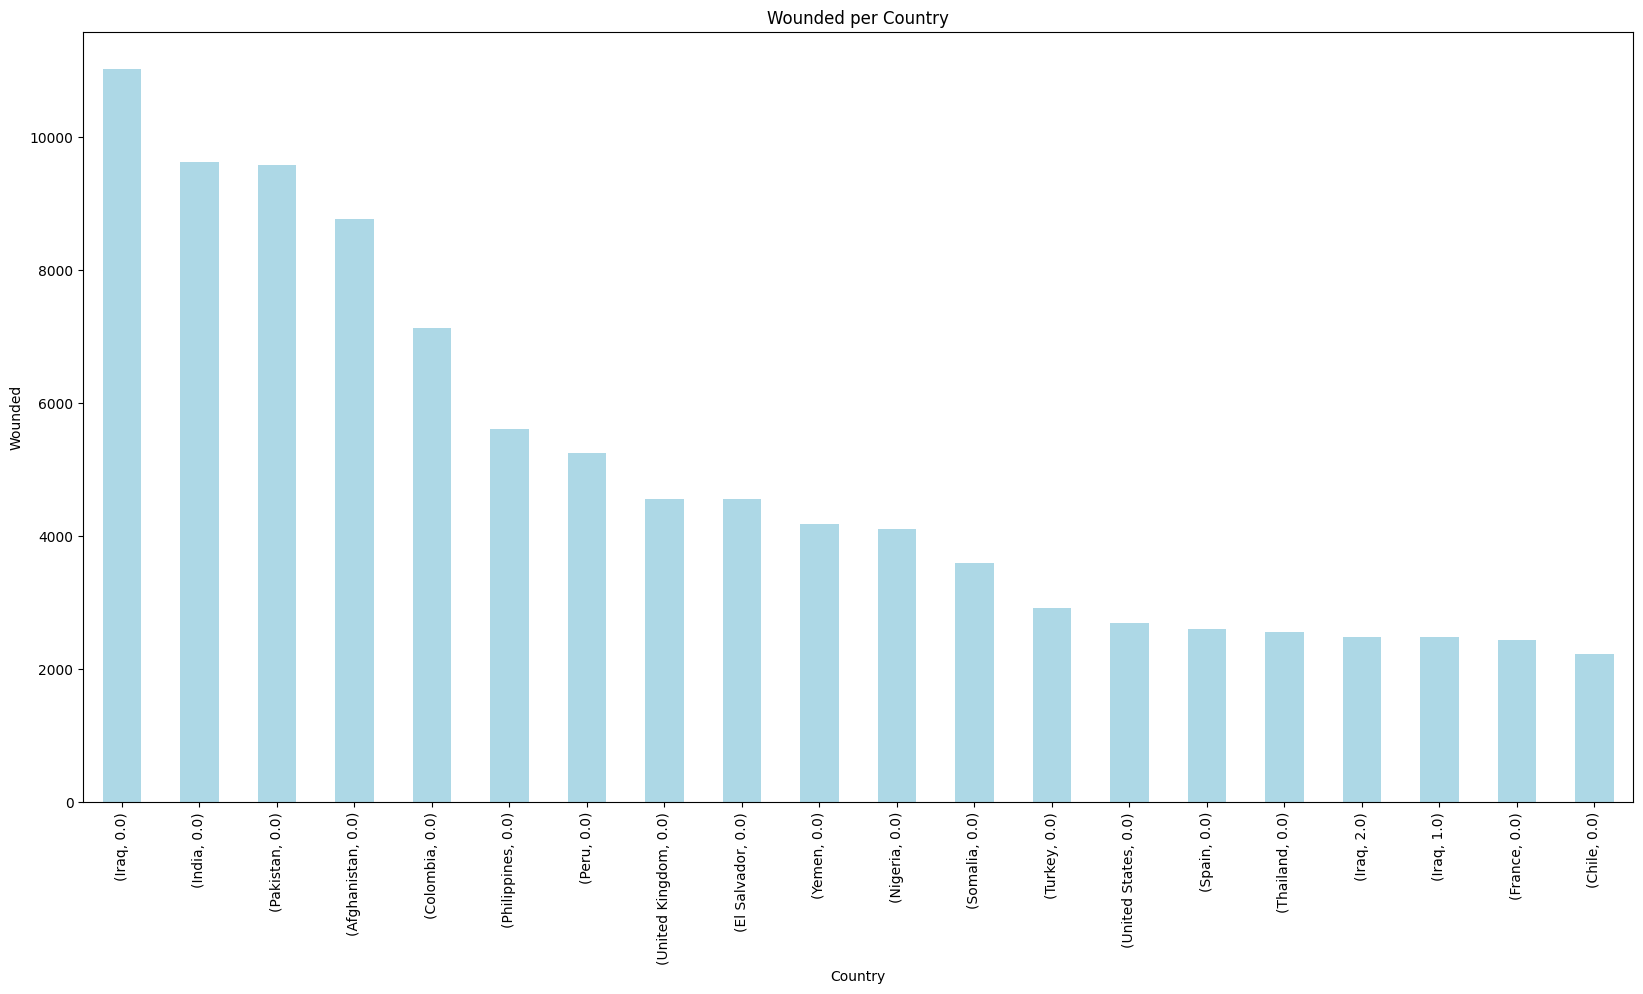

In [137]:
#Plot Wounded Data

CounWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per Country")
plt.xlabel("Country")
plt.ylabel("Wounded")
plt.show()

1. The least number of wounds were in France with wounds: 2751
2. The most number of wounds were in Iraq with wounds: 27521

### 7. Visualize Data (City)

In [138]:
#City wise Attack

CityAtck = g_data["City"].value_counts()[1:21]

In [139]:
CityAtck.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Baghdad to Baqubah
Series name: City
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [140]:
CityAtck.head() #Shows only first 5 rows of the data

Baghdad    8020
Karachi    2723
Lima       2359
Mosul      2330
Belfast    2242
Name: City, dtype: int64

In [141]:
CityAtck.tail() ##Shows only last 5 rows of the data

Benghazi          863
Medellin          853
Peshawar          847
Guatemala City    764
Baqubah           758
Name: City, dtype: int64

In [142]:
CityAtck #Shows the full data

Baghdad           8020
Karachi           2723
Lima              2359
Mosul             2330
Belfast           2242
Mogadishu         1962
Santiago          1643
San Salvador      1560
Kabul             1102
Athens            1091
Istanbul          1056
Kirkuk            1022
Bogota             988
Beirut             914
Quetta             878
Benghazi           863
Medellin           853
Peshawar           847
Guatemala City     764
Baqubah            758
Name: City, dtype: int64

In [143]:
CityAtck.shape #Gives number of rows and columns

(20,)

In [144]:
CityAtck.describe() #Inform about important statistical terms depending on Data

count      20.000000
mean     1698.750000
std      1614.371505
min       758.000000
25%       874.250000
50%      1073.500000
75%      2032.000000
max      8020.000000
Name: City, dtype: float64

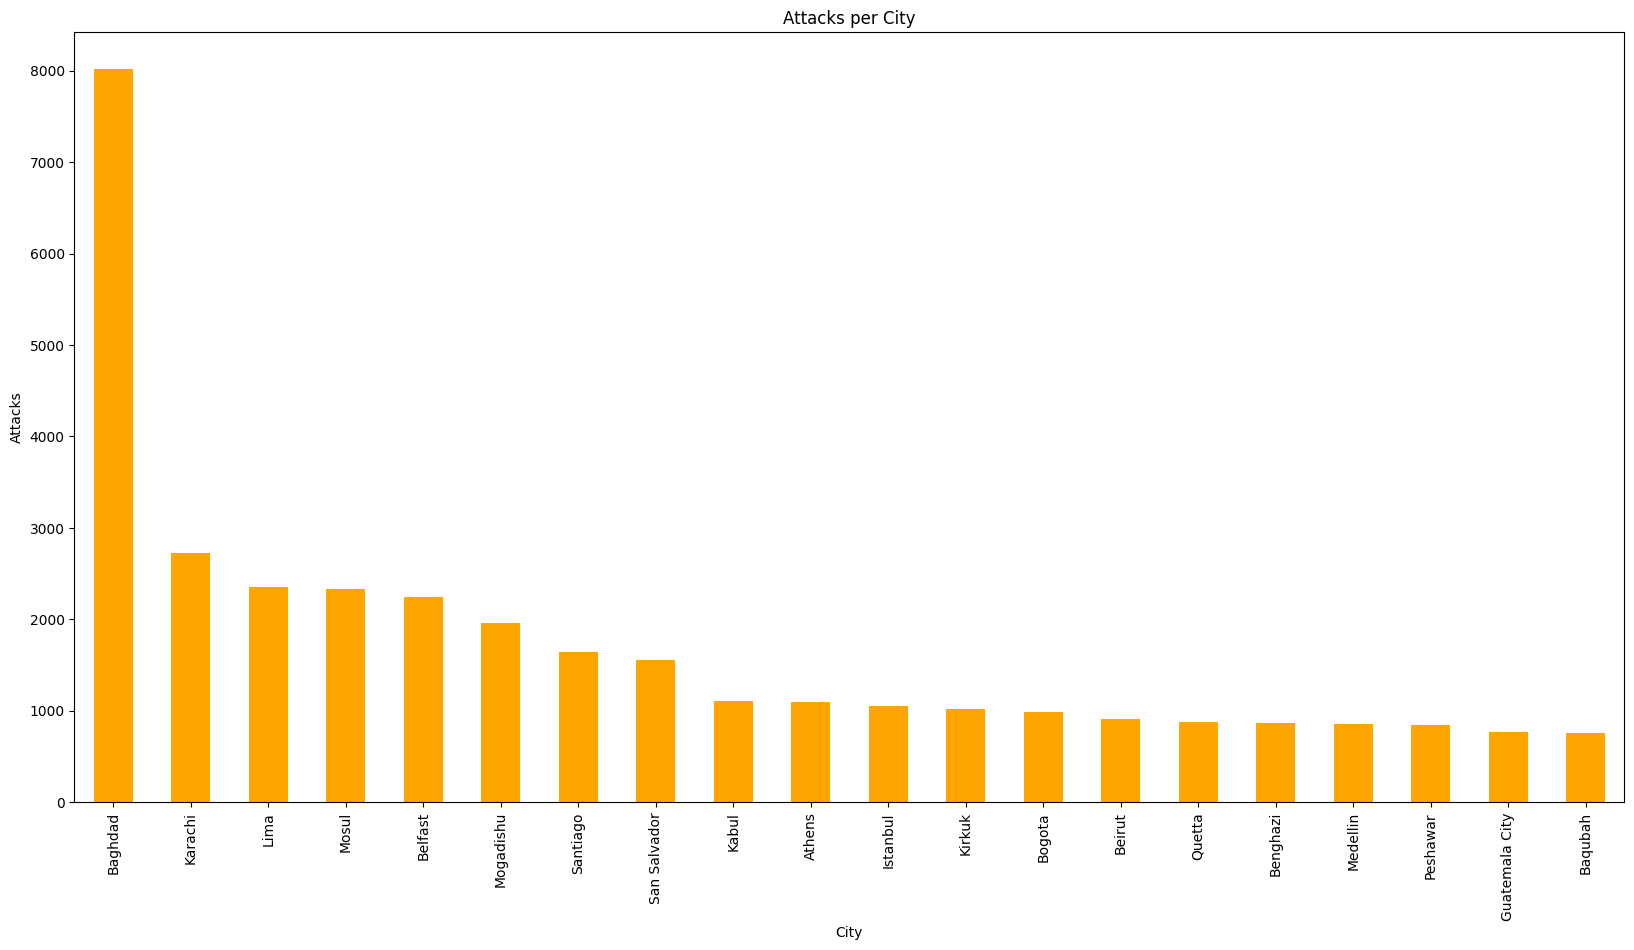

In [145]:
#Plot Attack Data

CityAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Attacks per City")
plt.xlabel("City")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were in Baqubahth attacks 758
2. The most number of attacks were in Baghdad with attacks 8020

In [146]:
#City wise Casualty

CityCas = g_data["City"].value_counts()[1:21]

In [147]:
CityCas.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Baghdad to Baqubah
Series name: City
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [148]:
CityCas.head() #Shows only first 5 rows of the data

Baghdad    8020
Karachi    2723
Lima       2359
Mosul      2330
Belfast    2242
Name: City, dtype: int64

In [149]:
CityCas.tail() ##Shows only last 5 rows of the data

Benghazi          863
Medellin          853
Peshawar          847
Guatemala City    764
Baqubah           758
Name: City, dtype: int64

In [150]:
CityCas #Shows the full data

Baghdad           8020
Karachi           2723
Lima              2359
Mosul             2330
Belfast           2242
Mogadishu         1962
Santiago          1643
San Salvador      1560
Kabul             1102
Athens            1091
Istanbul          1056
Kirkuk            1022
Bogota             988
Beirut             914
Quetta             878
Benghazi           863
Medellin           853
Peshawar           847
Guatemala City     764
Baqubah            758
Name: City, dtype: int64

In [151]:
CityCas.shape #Gives number of rows and columns

(20,)

In [152]:
CityCas.describe() #Inform about important statistical terms depending on Data

count      20.000000
mean     1698.750000
std      1614.371505
min       758.000000
25%       874.250000
50%      1073.500000
75%      2032.000000
max      8020.000000
Name: City, dtype: float64

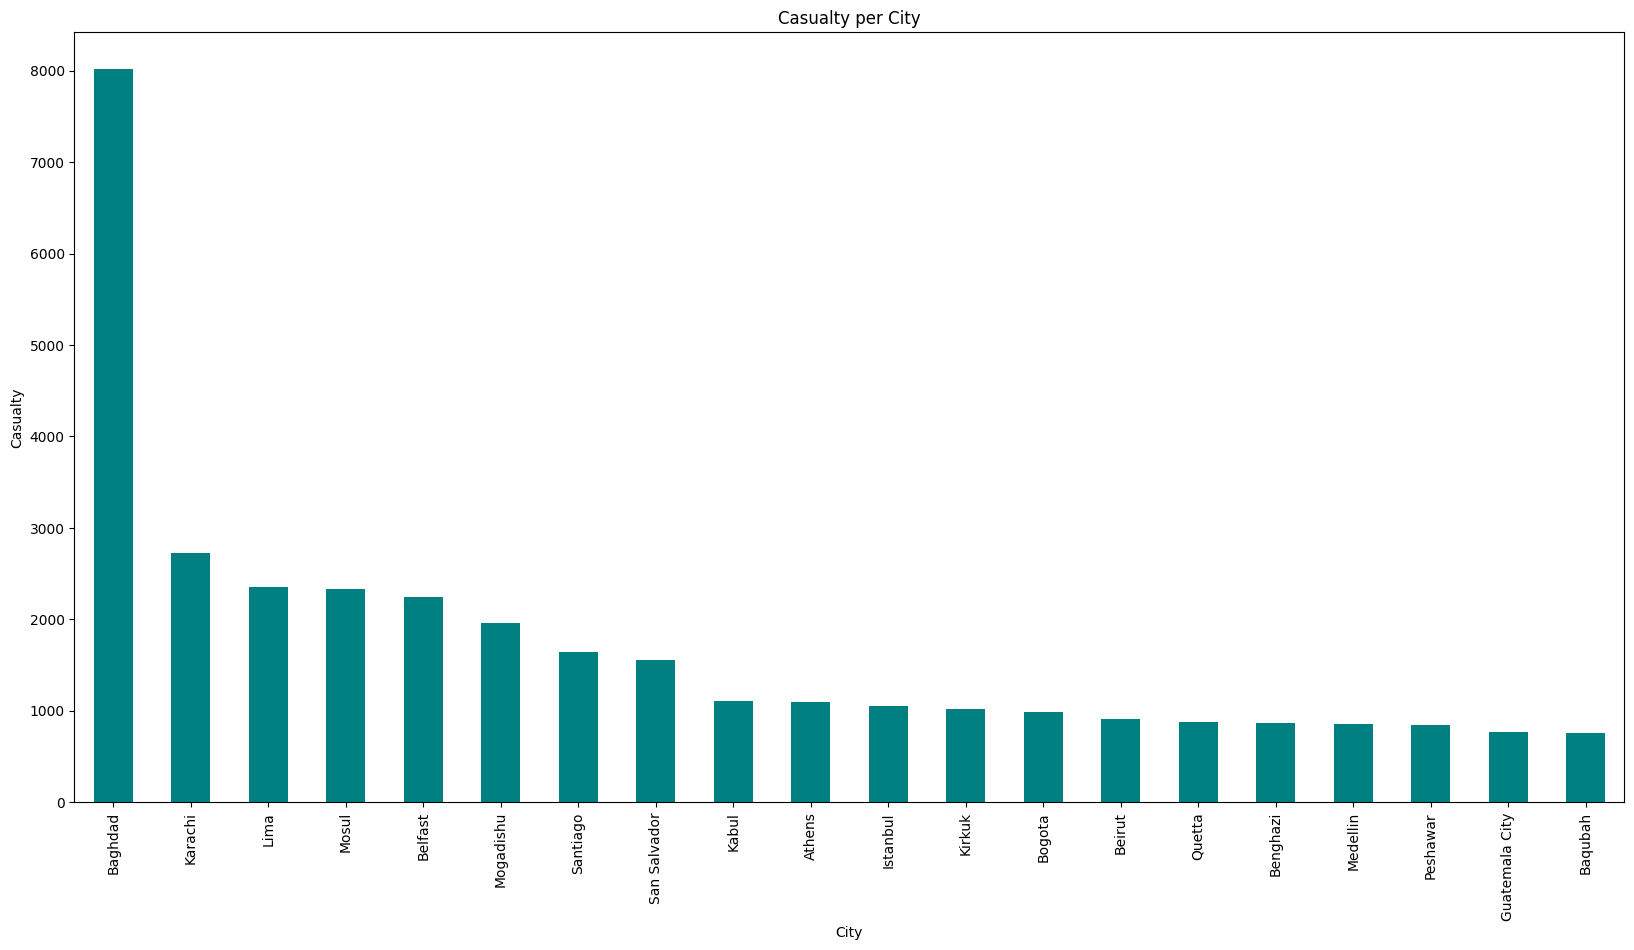

In [153]:
#Plot Casualty Data

CityCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per City")
plt.xlabel("City")
plt.ylabel("Casualty")
plt.show()

1. The least number of casualties were in Baqubahth casualties 758
2. The most number of casualties were in Baghdad with casualties 8020

In [154]:
#City wise Killed

CityKill = g_data["City"].value_counts()[1:21]

In [155]:
CityKill.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Baghdad to Baqubah
Series name: City
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [156]:
CityKill.head() #Shows only first 5 rows of the data

Baghdad    8020
Karachi    2723
Lima       2359
Mosul      2330
Belfast    2242
Name: City, dtype: int64

In [157]:
CityKill.tail() ##Shows only last 5 rows of the data

Benghazi          863
Medellin          853
Peshawar          847
Guatemala City    764
Baqubah           758
Name: City, dtype: int64

In [158]:
CityKill #Shows the full data

Baghdad           8020
Karachi           2723
Lima              2359
Mosul             2330
Belfast           2242
Mogadishu         1962
Santiago          1643
San Salvador      1560
Kabul             1102
Athens            1091
Istanbul          1056
Kirkuk            1022
Bogota             988
Beirut             914
Quetta             878
Benghazi           863
Medellin           853
Peshawar           847
Guatemala City     764
Baqubah            758
Name: City, dtype: int64

In [159]:
CityKill.shape #Gives number of rows and columns

(20,)

In [160]:
CityKill.describe() #Inform about important statistical terms depending on Data

count      20.000000
mean     1698.750000
std      1614.371505
min       758.000000
25%       874.250000
50%      1073.500000
75%      2032.000000
max      8020.000000
Name: City, dtype: float64

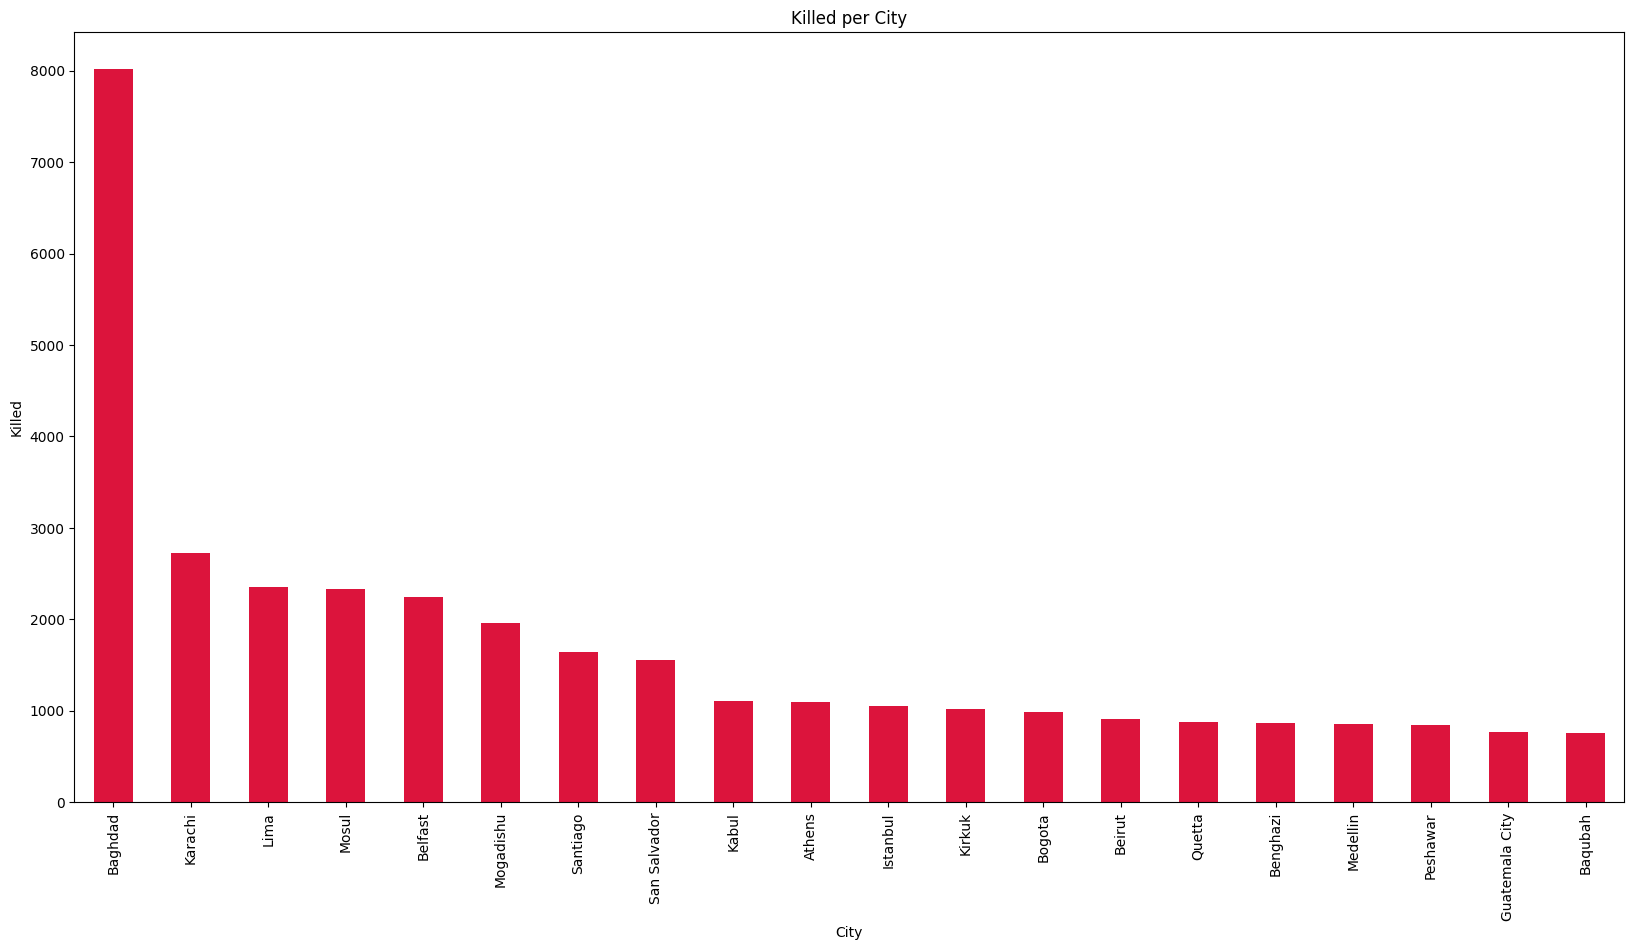

In [161]:
#Plot Killed Data

CityKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per City")
plt.xlabel("City")
plt.ylabel("Killed")
plt.show()

1. The least number of kills were in Baqubahth kills 758
2. The most number of kills were in Baghdad with kills 8020

In [162]:
#City wise Wounded

CityWoun = g_data["City"].value_counts()[1:21]

In [163]:
CityWoun.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 20 entries, Baghdad to Baqubah
Series name: City
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [164]:
CityWoun.head() #Shows only first 5 rows of the data

Baghdad    8020
Karachi    2723
Lima       2359
Mosul      2330
Belfast    2242
Name: City, dtype: int64

In [165]:
CityWoun.tail() ##Shows only last 5 rows of the data

Benghazi          863
Medellin          853
Peshawar          847
Guatemala City    764
Baqubah           758
Name: City, dtype: int64

In [166]:
CityWoun #Shows the full data

Baghdad           8020
Karachi           2723
Lima              2359
Mosul             2330
Belfast           2242
Mogadishu         1962
Santiago          1643
San Salvador      1560
Kabul             1102
Athens            1091
Istanbul          1056
Kirkuk            1022
Bogota             988
Beirut             914
Quetta             878
Benghazi           863
Medellin           853
Peshawar           847
Guatemala City     764
Baqubah            758
Name: City, dtype: int64

In [167]:
CityWoun.shape #Gives number of rows and columns

(20,)

In [168]:
CityWoun.describe() #Inform about important statistical terms depending on Data

count      20.000000
mean     1698.750000
std      1614.371505
min       758.000000
25%       874.250000
50%      1073.500000
75%      2032.000000
max      8020.000000
Name: City, dtype: float64

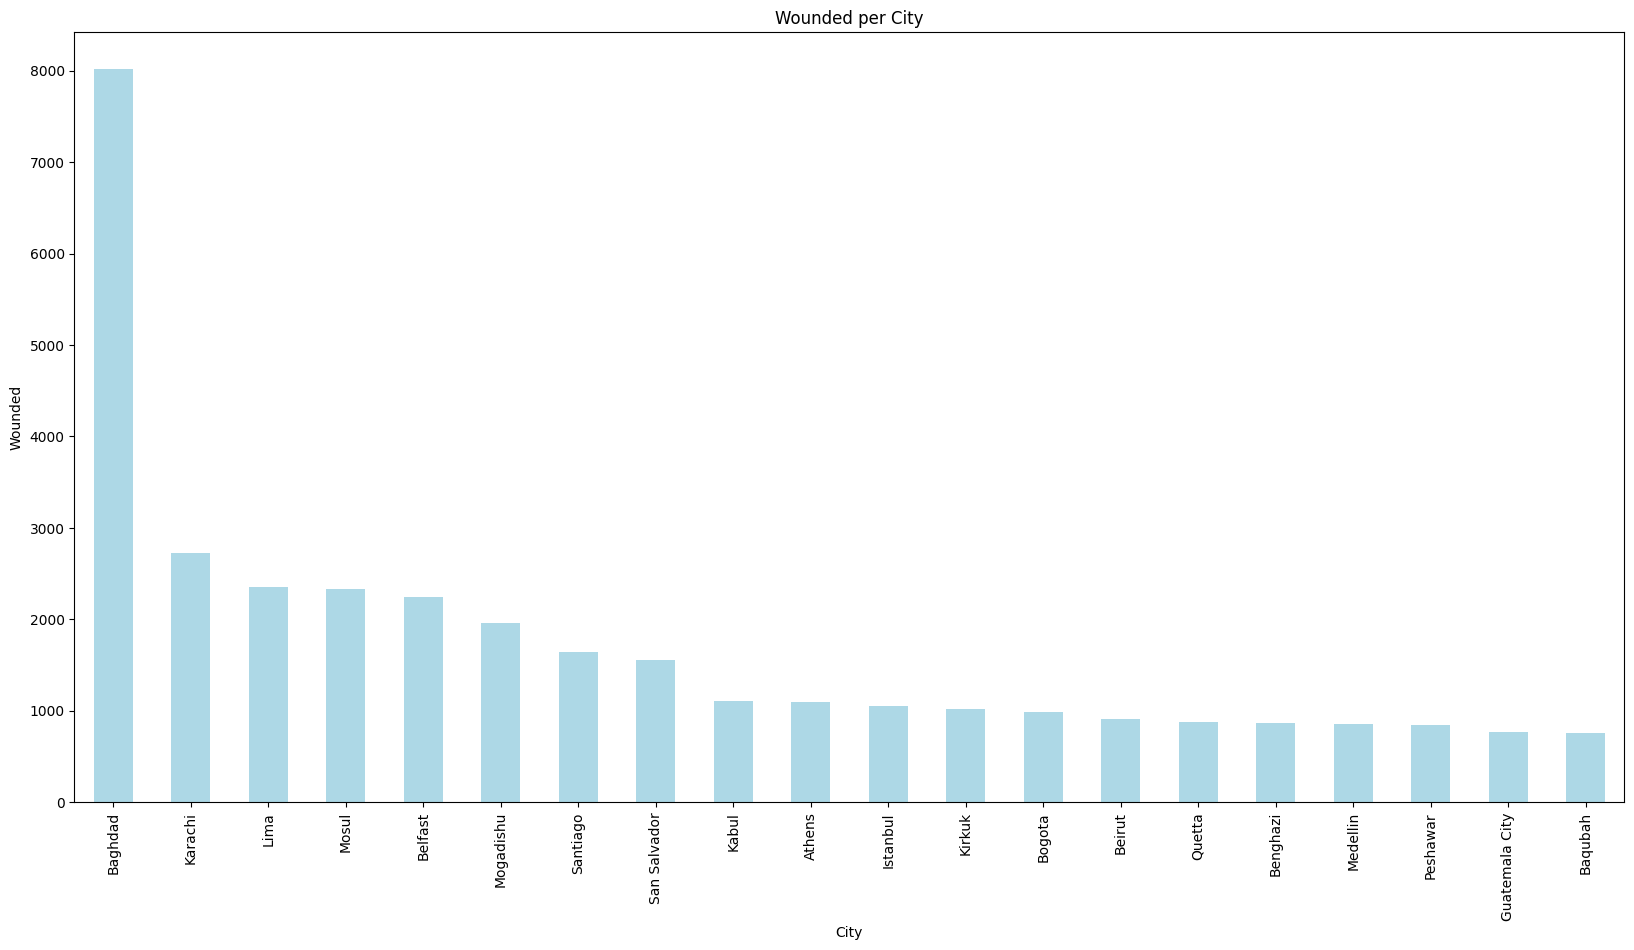

In [169]:
#Plot Wounded Data

CityWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per City")
plt.xlabel("City")
plt.ylabel("Wounded")
plt.show()

1. The least number of wounds were in Baqubahth wounds 758
2. The most number of wounds were in Baghdad with wounds 8020

### 8. Visualize Data (Terrorist Group)

In [170]:
#Terrorist Group wise Attacks

TGAtck = g_data["Group Name"].value_counts()[1:20]

In [171]:
TGAtck.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 19 entries, Taliban to Al-Qaida in the Arabian Peninsula (AQAP)
Series name: Group Name
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


In [172]:
TGAtck.head() #Shows only first 5 rows of the data

Taliban                                        11982
Islamic State of Iraq and the Levant (ISIL)     7254
Shining Path (SL)                               4564
Al-Shabaab                                      4419
New People's Army (NPA)                         3395
Name: Group Name, dtype: int64

In [173]:
TGAtck.tail() ##Shows only last 5 rows of the data

National Liberation Army of Colombia (ELN)    1815
Liberation Tigers of Tamil Eelam (LTTE)       1602
Tehrik-i-Taliban Pakistan (TTP)               1490
Palestinians                                  1123
Al-Qaida in the Arabian Peninsula (AQAP)      1113
Name: Group Name, dtype: int64

In [174]:
TGAtck #Shows the full data

Taliban                                             11982
Islamic State of Iraq and the Levant (ISIL)          7254
Shining Path (SL)                                    4564
Al-Shabaab                                           4419
New People's Army (NPA)                              3395
Farabundo Marti National Liberation Front (FMLN)     3351
Boko Haram                                           3320
Houthi extremists (Ansar Allah)                      3196
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2582
Revolutionary Armed Forces of Colombia (FARC)        2490
Communist Party of India - Maoist (CPI-Maoist)       2093
Maoists                                              2091
Basque Fatherland and Freedom (ETA)                  2024
National Liberation Army of Colombia (ELN)           1815
Liberation Tigers of Tamil Eelam (LTTE)              1602
Tehrik-i-Taliban Pakistan (TTP)                      1490
Palestinians  

In [175]:
TGAtck.shape #Gives number of rows and columns

(19,)

In [176]:
TGAtck.describe() #Inform about important statistical terms depending on Data

count       19.000000
mean      3293.368421
std       2559.135709
min       1113.000000
25%       1919.500000
50%       2582.000000
75%       3373.000000
max      11982.000000
Name: Group Name, dtype: float64

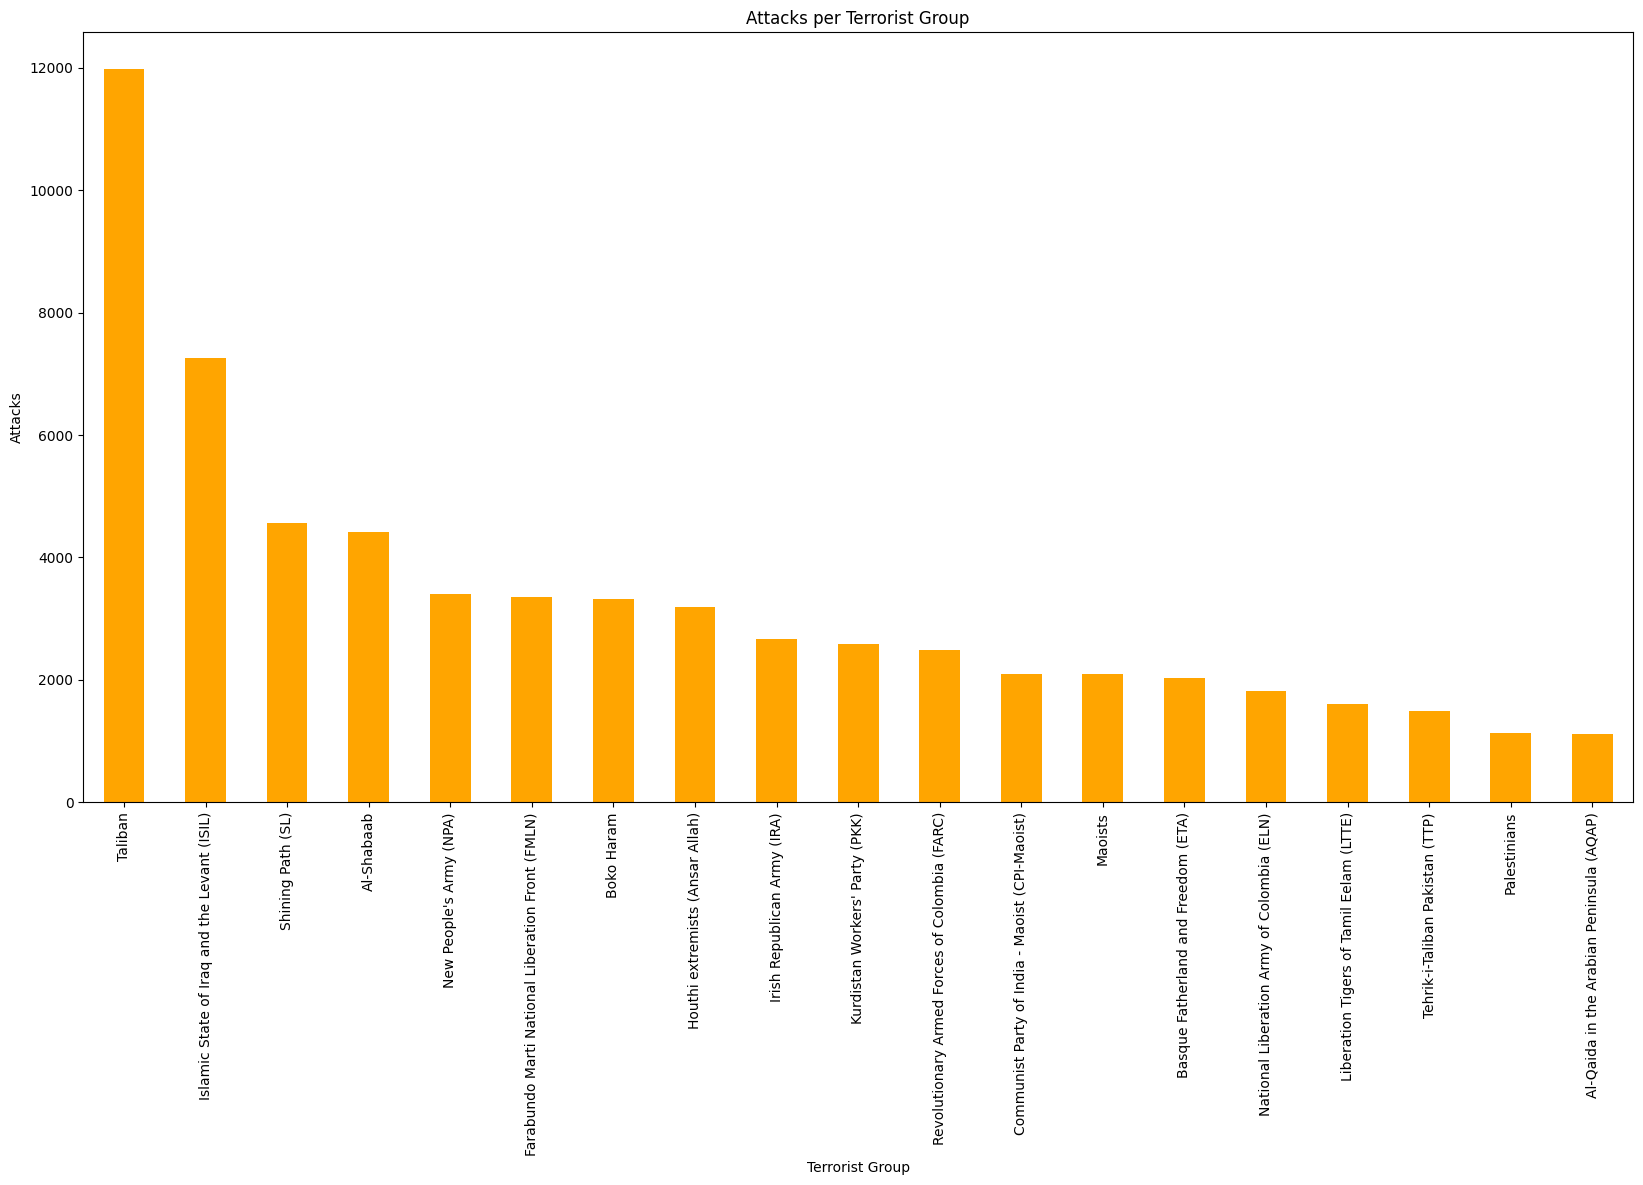

In [177]:
#Plot Attack Data

TGAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Attacks per Terrorist Group")
plt.xlabel("Terrorist Group")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were done by Al-Qaida in the Arabian Peninsula (AQAP)  with attacks 1113
2. The most number of attacks were done by Taliban with attacks 11982

In [178]:
#Terrorist Group wise Casualty

TGCas = g_data["Group Name"].value_counts()[1:20]

In [179]:
TGCas.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 19 entries, Taliban to Al-Qaida in the Arabian Peninsula (AQAP)
Series name: Group Name
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


In [180]:
TGCas.head() #Shows only first 5 rows of the data

Taliban                                        11982
Islamic State of Iraq and the Levant (ISIL)     7254
Shining Path (SL)                               4564
Al-Shabaab                                      4419
New People's Army (NPA)                         3395
Name: Group Name, dtype: int64

In [181]:
TGCas.tail() ##Shows only last 5 rows of the data

National Liberation Army of Colombia (ELN)    1815
Liberation Tigers of Tamil Eelam (LTTE)       1602
Tehrik-i-Taliban Pakistan (TTP)               1490
Palestinians                                  1123
Al-Qaida in the Arabian Peninsula (AQAP)      1113
Name: Group Name, dtype: int64

In [182]:
TGCas #Shows the full data

Taliban                                             11982
Islamic State of Iraq and the Levant (ISIL)          7254
Shining Path (SL)                                    4564
Al-Shabaab                                           4419
New People's Army (NPA)                              3395
Farabundo Marti National Liberation Front (FMLN)     3351
Boko Haram                                           3320
Houthi extremists (Ansar Allah)                      3196
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2582
Revolutionary Armed Forces of Colombia (FARC)        2490
Communist Party of India - Maoist (CPI-Maoist)       2093
Maoists                                              2091
Basque Fatherland and Freedom (ETA)                  2024
National Liberation Army of Colombia (ELN)           1815
Liberation Tigers of Tamil Eelam (LTTE)              1602
Tehrik-i-Taliban Pakistan (TTP)                      1490
Palestinians  

In [183]:
TGCas.shape #Gives number of rows and columns

(19,)

In [184]:
TGCas.describe() #Inform about important statistical terms depending on Data

count       19.000000
mean      3293.368421
std       2559.135709
min       1113.000000
25%       1919.500000
50%       2582.000000
75%       3373.000000
max      11982.000000
Name: Group Name, dtype: float64

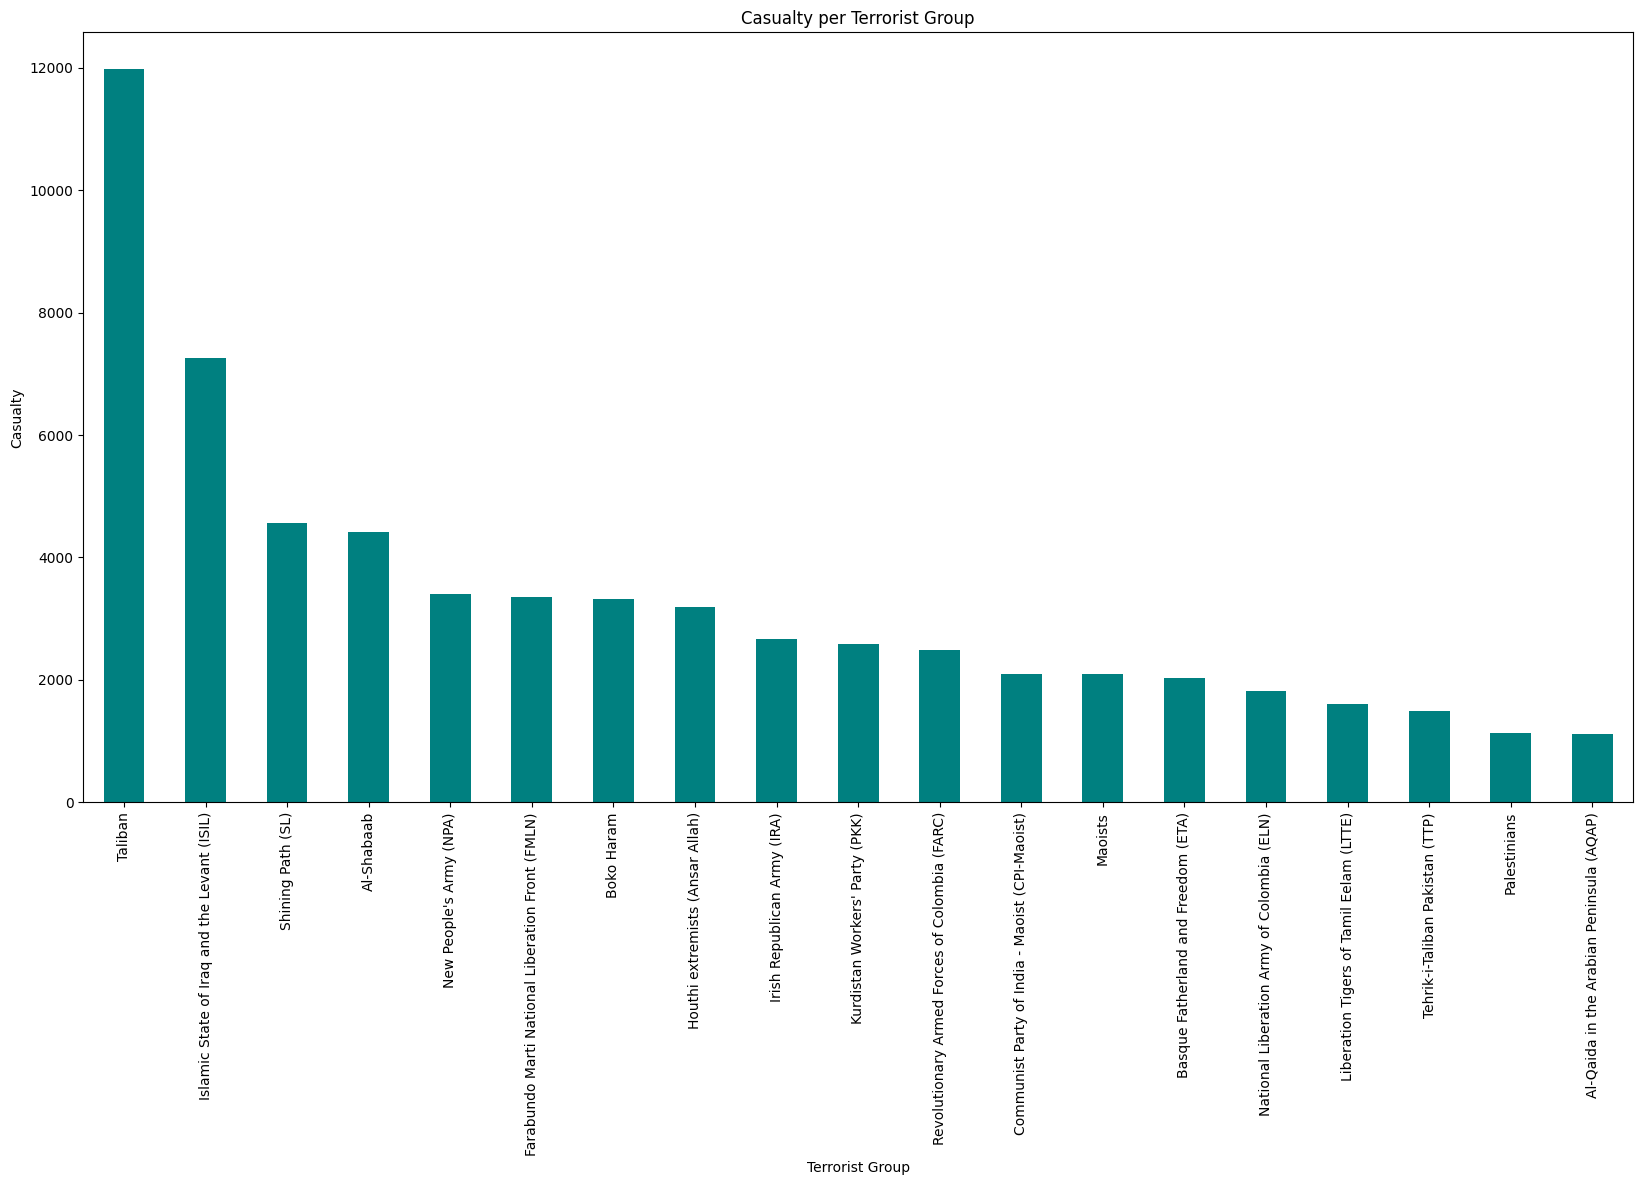

In [185]:
#Plot Casualty Data

TGCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per Terrorist Group")
plt.xlabel("Terrorist Group")
plt.ylabel("Casualty")
plt.show()

1. The least number of casualties were done by Al-Qaida in the Arabian Peninsula (AQAP)  with casualties 1113
2. The most number of casualties were done by Taliban with casualties 11982

In [186]:
#Terrorist Group wise Killed

TGKill = g_data["Group Name"].value_counts()[1:20]

In [187]:
TGKill.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 19 entries, Taliban to Al-Qaida in the Arabian Peninsula (AQAP)
Series name: Group Name
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


In [188]:
TGKill.head() #Shows only first 5 rows of the data

Taliban                                        11982
Islamic State of Iraq and the Levant (ISIL)     7254
Shining Path (SL)                               4564
Al-Shabaab                                      4419
New People's Army (NPA)                         3395
Name: Group Name, dtype: int64

In [189]:
TGKill.tail() ##Shows only last 5 rows of the data

National Liberation Army of Colombia (ELN)    1815
Liberation Tigers of Tamil Eelam (LTTE)       1602
Tehrik-i-Taliban Pakistan (TTP)               1490
Palestinians                                  1123
Al-Qaida in the Arabian Peninsula (AQAP)      1113
Name: Group Name, dtype: int64

In [190]:
TGKill #Shows the full data

Taliban                                             11982
Islamic State of Iraq and the Levant (ISIL)          7254
Shining Path (SL)                                    4564
Al-Shabaab                                           4419
New People's Army (NPA)                              3395
Farabundo Marti National Liberation Front (FMLN)     3351
Boko Haram                                           3320
Houthi extremists (Ansar Allah)                      3196
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2582
Revolutionary Armed Forces of Colombia (FARC)        2490
Communist Party of India - Maoist (CPI-Maoist)       2093
Maoists                                              2091
Basque Fatherland and Freedom (ETA)                  2024
National Liberation Army of Colombia (ELN)           1815
Liberation Tigers of Tamil Eelam (LTTE)              1602
Tehrik-i-Taliban Pakistan (TTP)                      1490
Palestinians  

In [191]:
TGKill.shape #Gives number of rows and columns

(19,)

In [192]:
TGKill.describe() #Inform about important statistical terms depending on Data

count       19.000000
mean      3293.368421
std       2559.135709
min       1113.000000
25%       1919.500000
50%       2582.000000
75%       3373.000000
max      11982.000000
Name: Group Name, dtype: float64

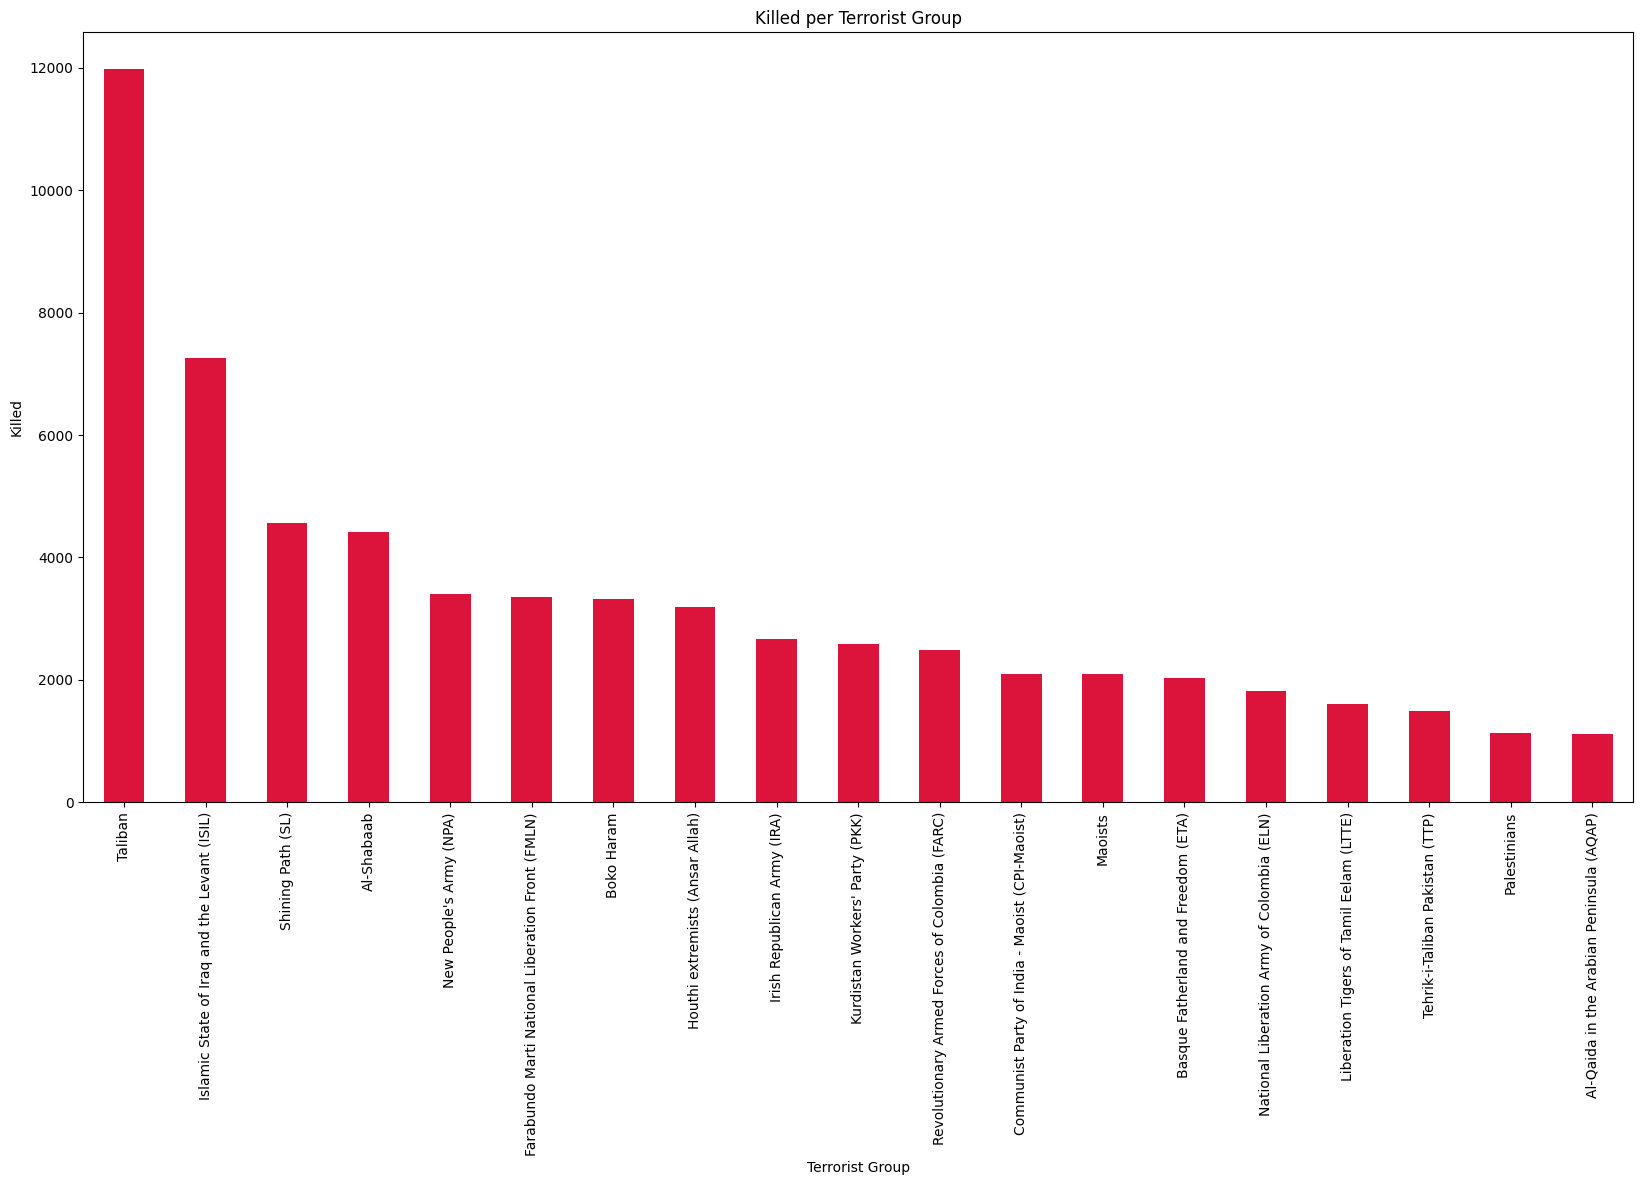

In [193]:
#Plot Killed Data

TGKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per Terrorist Group")
plt.xlabel("Terrorist Group")
plt.ylabel("Killed")
plt.show()

1. The least number of kills were done by Al-Qaida in the Arabian Peninsula (AQAP)  with kills 1113
2. The most number of kills were done by Taliban with kills 11982

In [194]:
#Terrorist Group wise Wounded

TGWoun = g_data["Group Name"].value_counts()[1:20]

In [195]:
TGWoun.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 19 entries, Taliban to Al-Qaida in the Arabian Peninsula (AQAP)
Series name: Group Name
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


In [196]:
TGWoun.head() #Shows only first 5 rows of the data

Taliban                                        11982
Islamic State of Iraq and the Levant (ISIL)     7254
Shining Path (SL)                               4564
Al-Shabaab                                      4419
New People's Army (NPA)                         3395
Name: Group Name, dtype: int64

In [197]:
TGWoun.tail() ##Shows only last 5 rows of the data

National Liberation Army of Colombia (ELN)    1815
Liberation Tigers of Tamil Eelam (LTTE)       1602
Tehrik-i-Taliban Pakistan (TTP)               1490
Palestinians                                  1123
Al-Qaida in the Arabian Peninsula (AQAP)      1113
Name: Group Name, dtype: int64

In [198]:
TGWoun #Shows the full data

Taliban                                             11982
Islamic State of Iraq and the Levant (ISIL)          7254
Shining Path (SL)                                    4564
Al-Shabaab                                           4419
New People's Army (NPA)                              3395
Farabundo Marti National Liberation Front (FMLN)     3351
Boko Haram                                           3320
Houthi extremists (Ansar Allah)                      3196
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2582
Revolutionary Armed Forces of Colombia (FARC)        2490
Communist Party of India - Maoist (CPI-Maoist)       2093
Maoists                                              2091
Basque Fatherland and Freedom (ETA)                  2024
National Liberation Army of Colombia (ELN)           1815
Liberation Tigers of Tamil Eelam (LTTE)              1602
Tehrik-i-Taliban Pakistan (TTP)                      1490
Palestinians  

In [199]:
TGWoun.shape #Gives number of rows and columns

(19,)

In [200]:
TGWoun.describe() #Inform about important statistical terms depending on Data

count       19.000000
mean      3293.368421
std       2559.135709
min       1113.000000
25%       1919.500000
50%       2582.000000
75%       3373.000000
max      11982.000000
Name: Group Name, dtype: float64

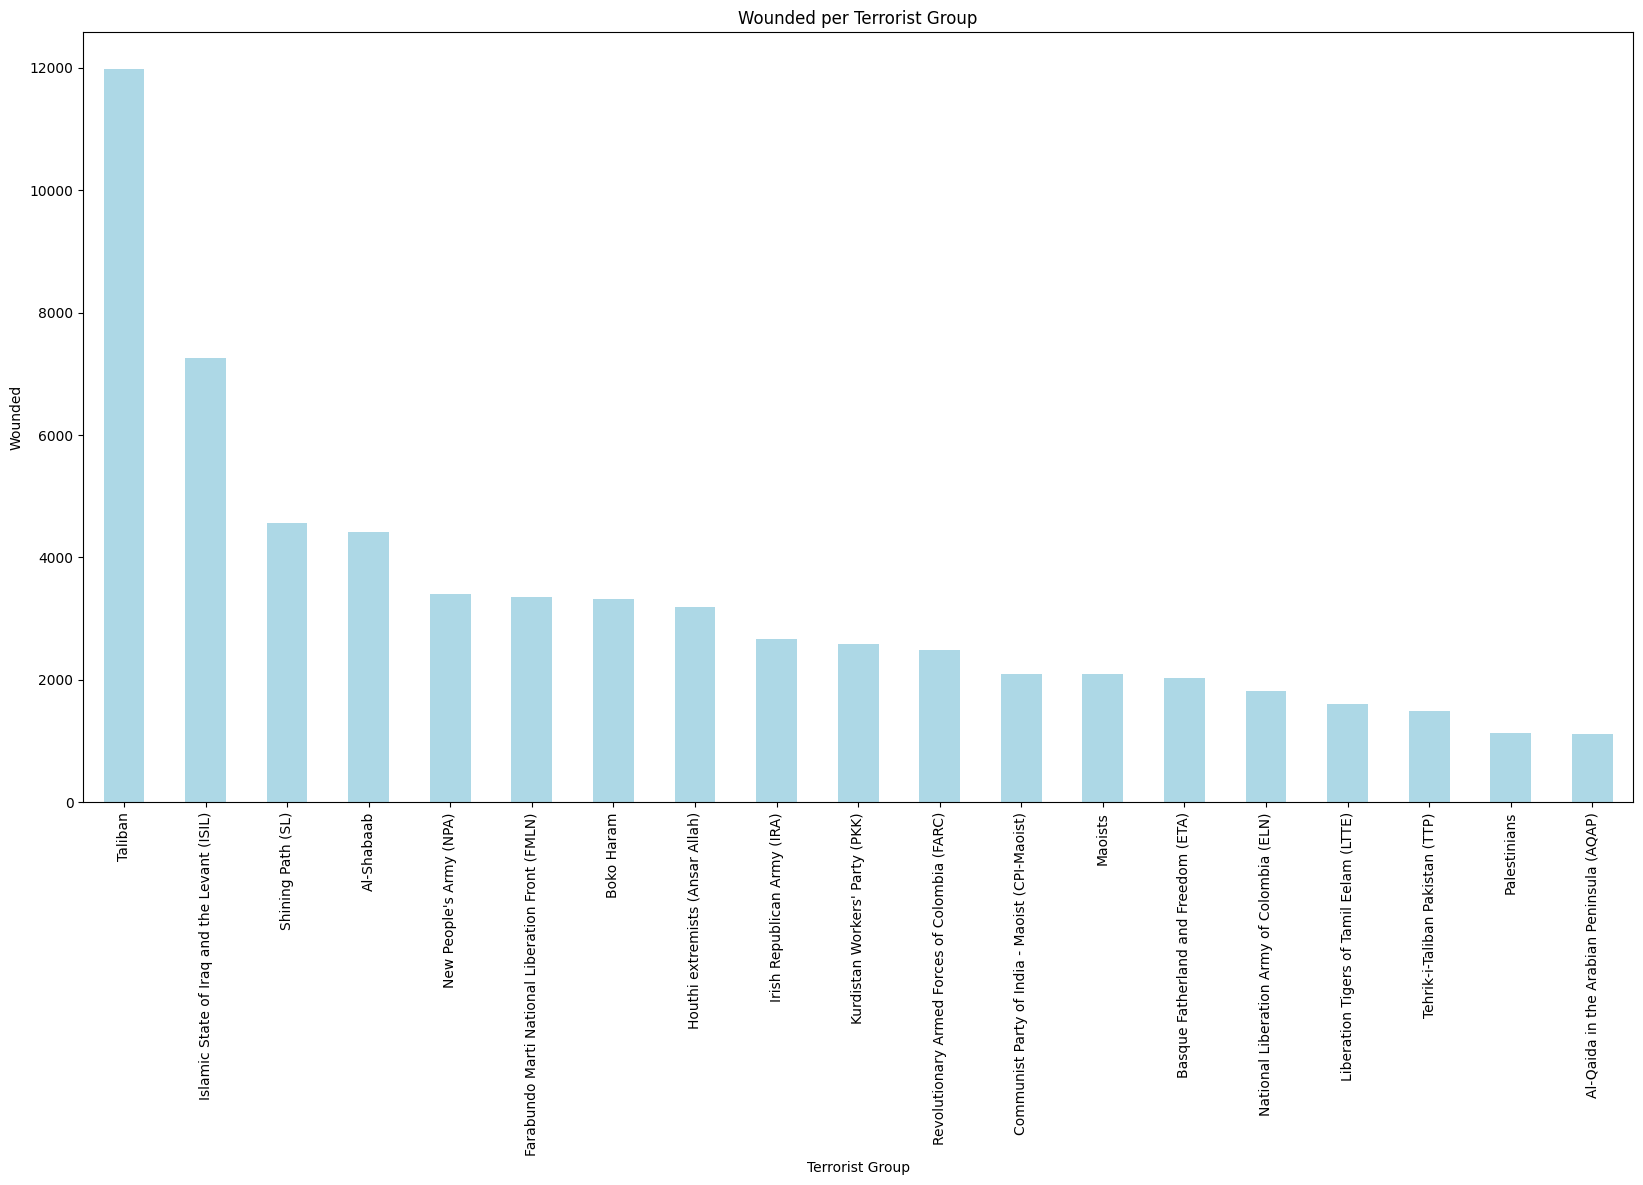

In [201]:
#Plot Wounded Data

TGWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per Terrorist Group")
plt.xlabel("Terrorist Group")
plt.ylabel("Wounded")
plt.show()

1. The least number of wounds were done by Al-Qaida in the Arabian Peninsula (AQAP)  with wounds 1113
2. The most number of wounds were done by Taliban with wounds 11982

### 9. Visualize Data (Attack Type)

In [202]:
#Attack Type wise Attacks

ATAtck = g_data["Attack Type"].value_counts()

In [203]:
ATAtck.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 9 entries, Bombing/Explosion to Hijacking
Series name: Attack Type
Non-Null Count  Dtype
--------------  -----
9 non-null      int64
dtypes: int64(1)
memory usage: 144.0+ bytes


In [204]:
ATAtck.head() #Shows only first 5 rows of the data

Bombing/Explosion                 98158
Armed Assault                     49553
Assassination                     21539
Hostage Taking (Kidnapping)       14045
Facility/Infrastructure Attack    12325
Name: Attack Type, dtype: int64

In [205]:
ATAtck.tail() ##Shows only last 5 rows of the data

Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [206]:
ATAtck #Shows the full data

Bombing/Explosion                      98158
Armed Assault                          49553
Assassination                          21539
Hostage Taking (Kidnapping)            14045
Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [207]:
ATAtck.shape #Gives number of rows and columns

(9,)

In [208]:
ATAtck.describe() #Inform about important statistical terms depending on Data

count        9.000000
mean     23300.666667
std      31899.156654
min        759.000000
25%       1229.000000
50%      12325.000000
75%      21539.000000
max      98158.000000
Name: Attack Type, dtype: float64

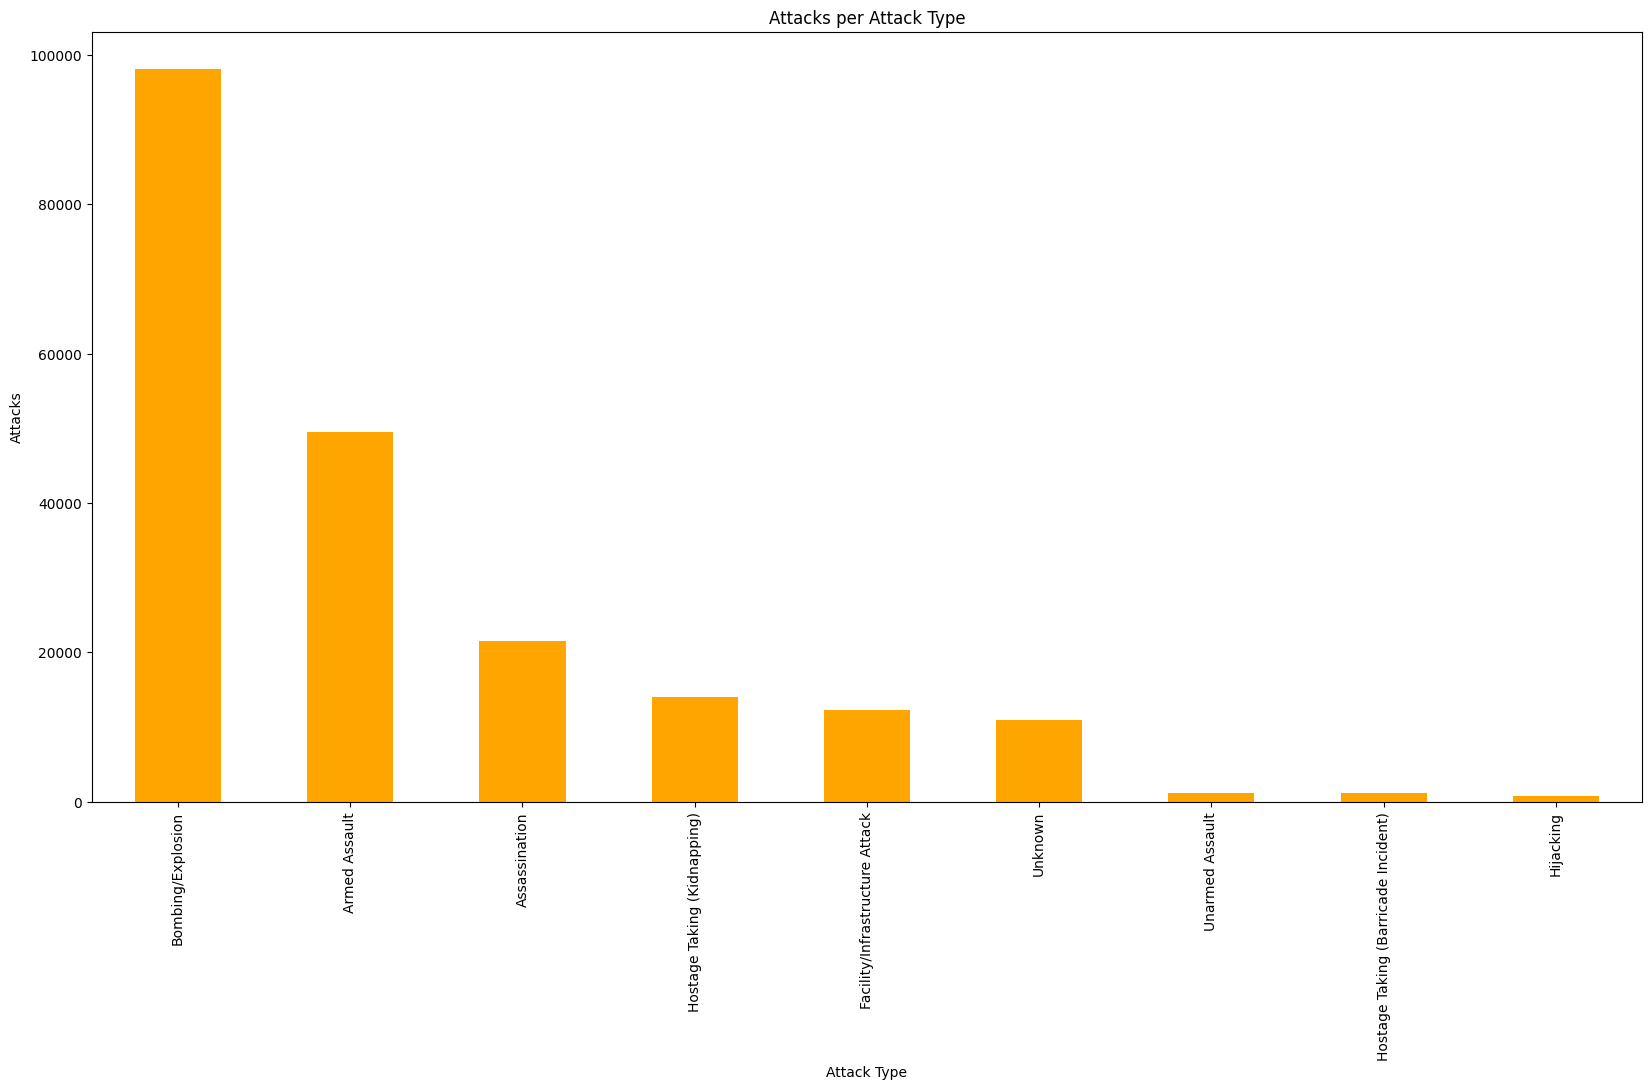

In [209]:
#Plot Attack Data

ATAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Attacks per Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were done by Hijacking with attacks 759
2. The most number of attacks were done by Bombing/Explosion with attacks 98158

In [210]:
#Attack Type wise Casualty

ATCas = g_data["Attack Type"].value_counts()

In [211]:
ATCas.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 9 entries, Bombing/Explosion to Hijacking
Series name: Attack Type
Non-Null Count  Dtype
--------------  -----
9 non-null      int64
dtypes: int64(1)
memory usage: 144.0+ bytes


In [212]:
ATCas.head() #Shows only first 5 rows of the data

Bombing/Explosion                 98158
Armed Assault                     49553
Assassination                     21539
Hostage Taking (Kidnapping)       14045
Facility/Infrastructure Attack    12325
Name: Attack Type, dtype: int64

In [213]:
ATCas.tail() ##Shows only last 5 rows of the data

Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [214]:
ATCas #Shows the full data

Bombing/Explosion                      98158
Armed Assault                          49553
Assassination                          21539
Hostage Taking (Kidnapping)            14045
Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [215]:
ATCas.shape #Gives number of rows and columns

(9,)

In [216]:
ATCas.describe() #Inform about important statistical terms depending on Data

count        9.000000
mean     23300.666667
std      31899.156654
min        759.000000
25%       1229.000000
50%      12325.000000
75%      21539.000000
max      98158.000000
Name: Attack Type, dtype: float64

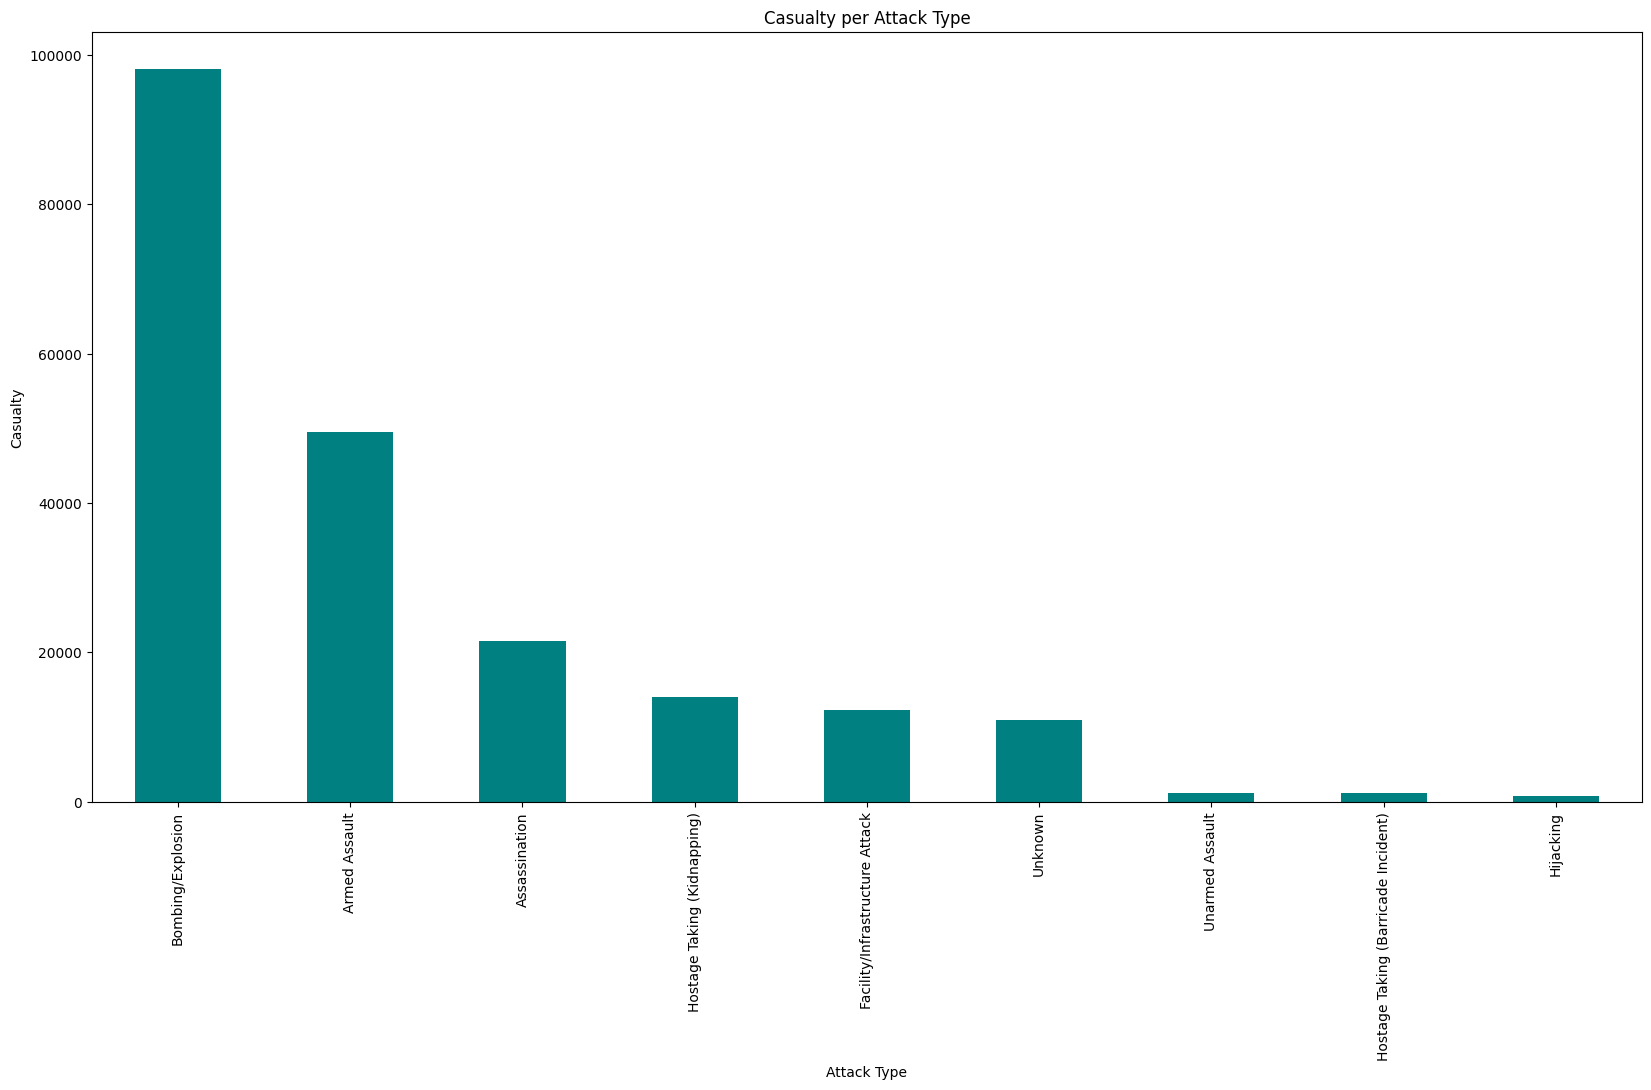

In [217]:
#Plot Casualty Data

ATCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Casualty")
plt.show()

1. The least number of casualties were done by Hijacking with casualties 759
2. The most number of casualties were done by Bombing/Explosion with casualties 98158

In [218]:
#Attack Type wise Killed

ATKill = g_data["Attack Type"].value_counts()

In [219]:
ATKill.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 9 entries, Bombing/Explosion to Hijacking
Series name: Attack Type
Non-Null Count  Dtype
--------------  -----
9 non-null      int64
dtypes: int64(1)
memory usage: 144.0+ bytes


In [220]:
ATKill.head() #Shows only first 5 rows of the data

Bombing/Explosion                 98158
Armed Assault                     49553
Assassination                     21539
Hostage Taking (Kidnapping)       14045
Facility/Infrastructure Attack    12325
Name: Attack Type, dtype: int64

In [221]:
ATKill.tail() ##Shows only last 5 rows of the data

Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [222]:
ATKill #Shows the full data

Bombing/Explosion                      98158
Armed Assault                          49553
Assassination                          21539
Hostage Taking (Kidnapping)            14045
Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [223]:
ATKill.shape #Gives number of rows and columns

(9,)

In [224]:
ATKill.describe() #Inform about important statistical terms depending on Data

count        9.000000
mean     23300.666667
std      31899.156654
min        759.000000
25%       1229.000000
50%      12325.000000
75%      21539.000000
max      98158.000000
Name: Attack Type, dtype: float64

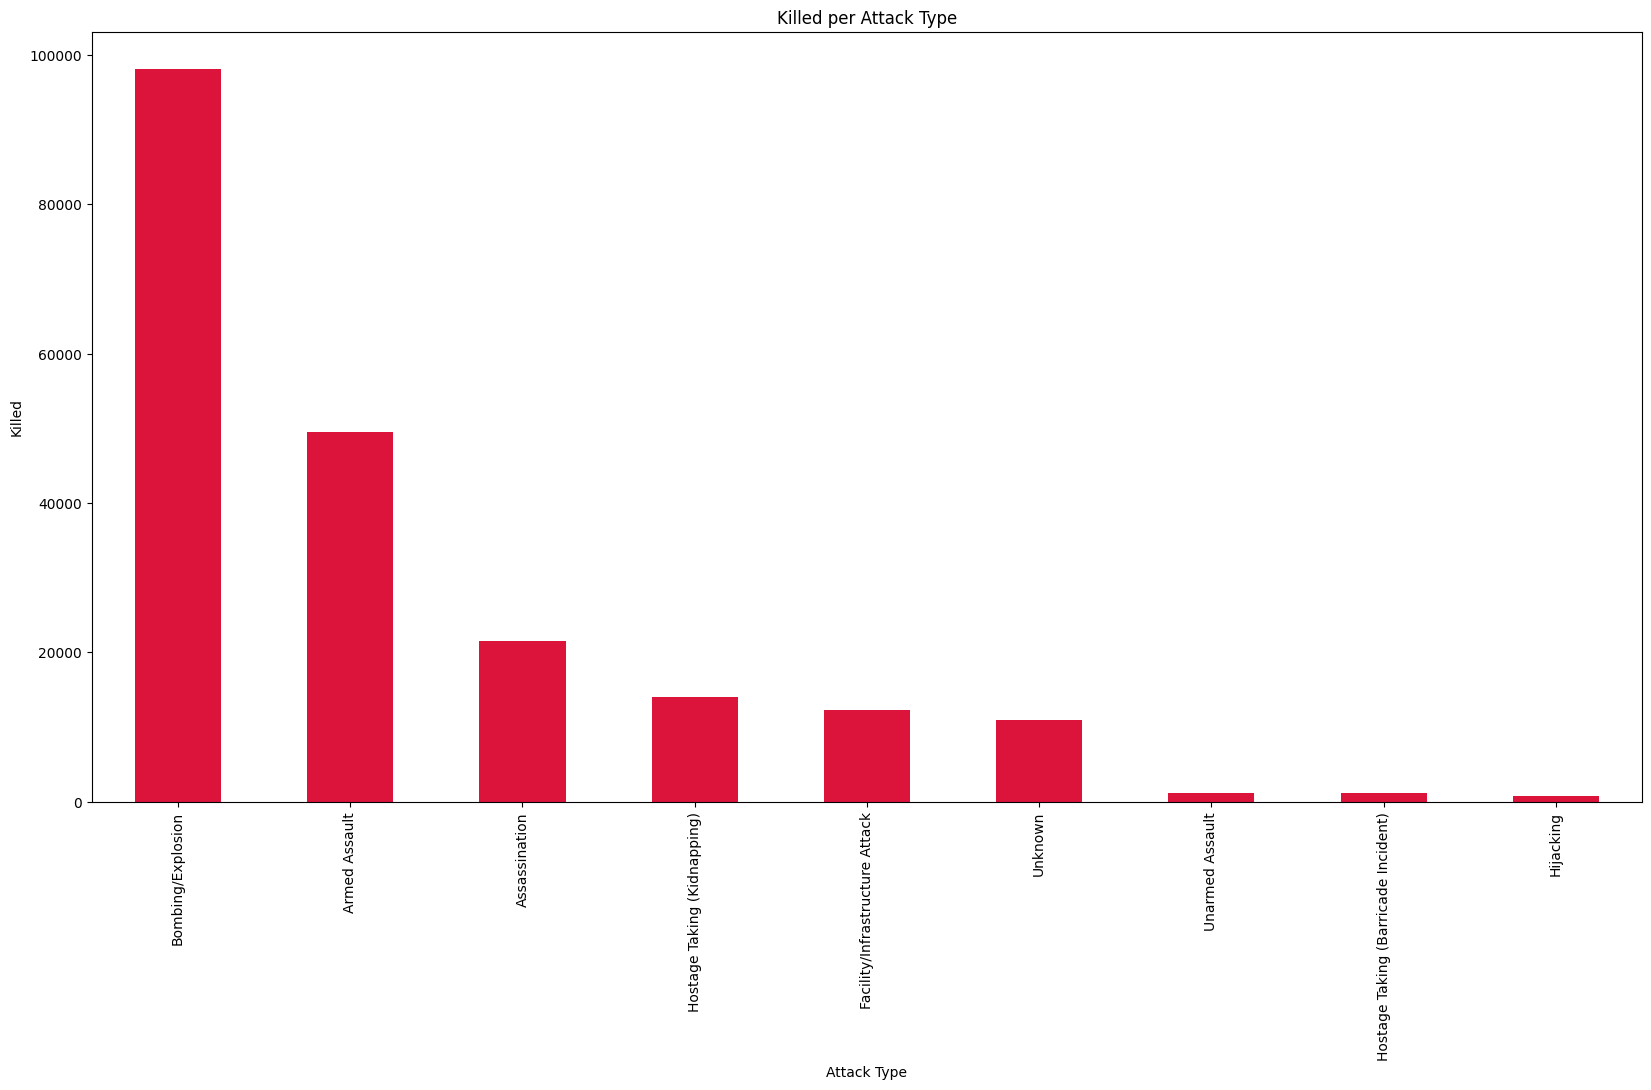

In [225]:
#Plot Killed Data

ATKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Killed")
plt.show()

1. The least number of kills were done by Hijacking with kills 759
2. The most number of kills were done by Bombing/Explosion with kills 98158

In [226]:
#Attack Type wise Wounded

ATWoun = g_data["Attack Type"].value_counts()

In [227]:
ATWoun.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 9 entries, Bombing/Explosion to Hijacking
Series name: Attack Type
Non-Null Count  Dtype
--------------  -----
9 non-null      int64
dtypes: int64(1)
memory usage: 144.0+ bytes


In [228]:
ATWoun.head() #Shows only first 5 rows of the data

Bombing/Explosion                 98158
Armed Assault                     49553
Assassination                     21539
Hostage Taking (Kidnapping)       14045
Facility/Infrastructure Attack    12325
Name: Attack Type, dtype: int64

In [229]:
ATWoun.tail() ##Shows only last 5 rows of the data

Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [230]:
ATWoun #Shows the full data

Bombing/Explosion                      98158
Armed Assault                          49553
Assassination                          21539
Hostage Taking (Kidnapping)            14045
Facility/Infrastructure Attack         12325
Unknown                                10942
Unarmed Assault                         1229
Hostage Taking (Barricade Incident)     1156
Hijacking                                759
Name: Attack Type, dtype: int64

In [231]:
ATWoun.shape #Gives number of rows and columns

(9,)

In [232]:
ATWoun.describe() #Inform about important statistical terms depending on Data

count        9.000000
mean     23300.666667
std      31899.156654
min        759.000000
25%       1229.000000
50%      12325.000000
75%      21539.000000
max      98158.000000
Name: Attack Type, dtype: float64

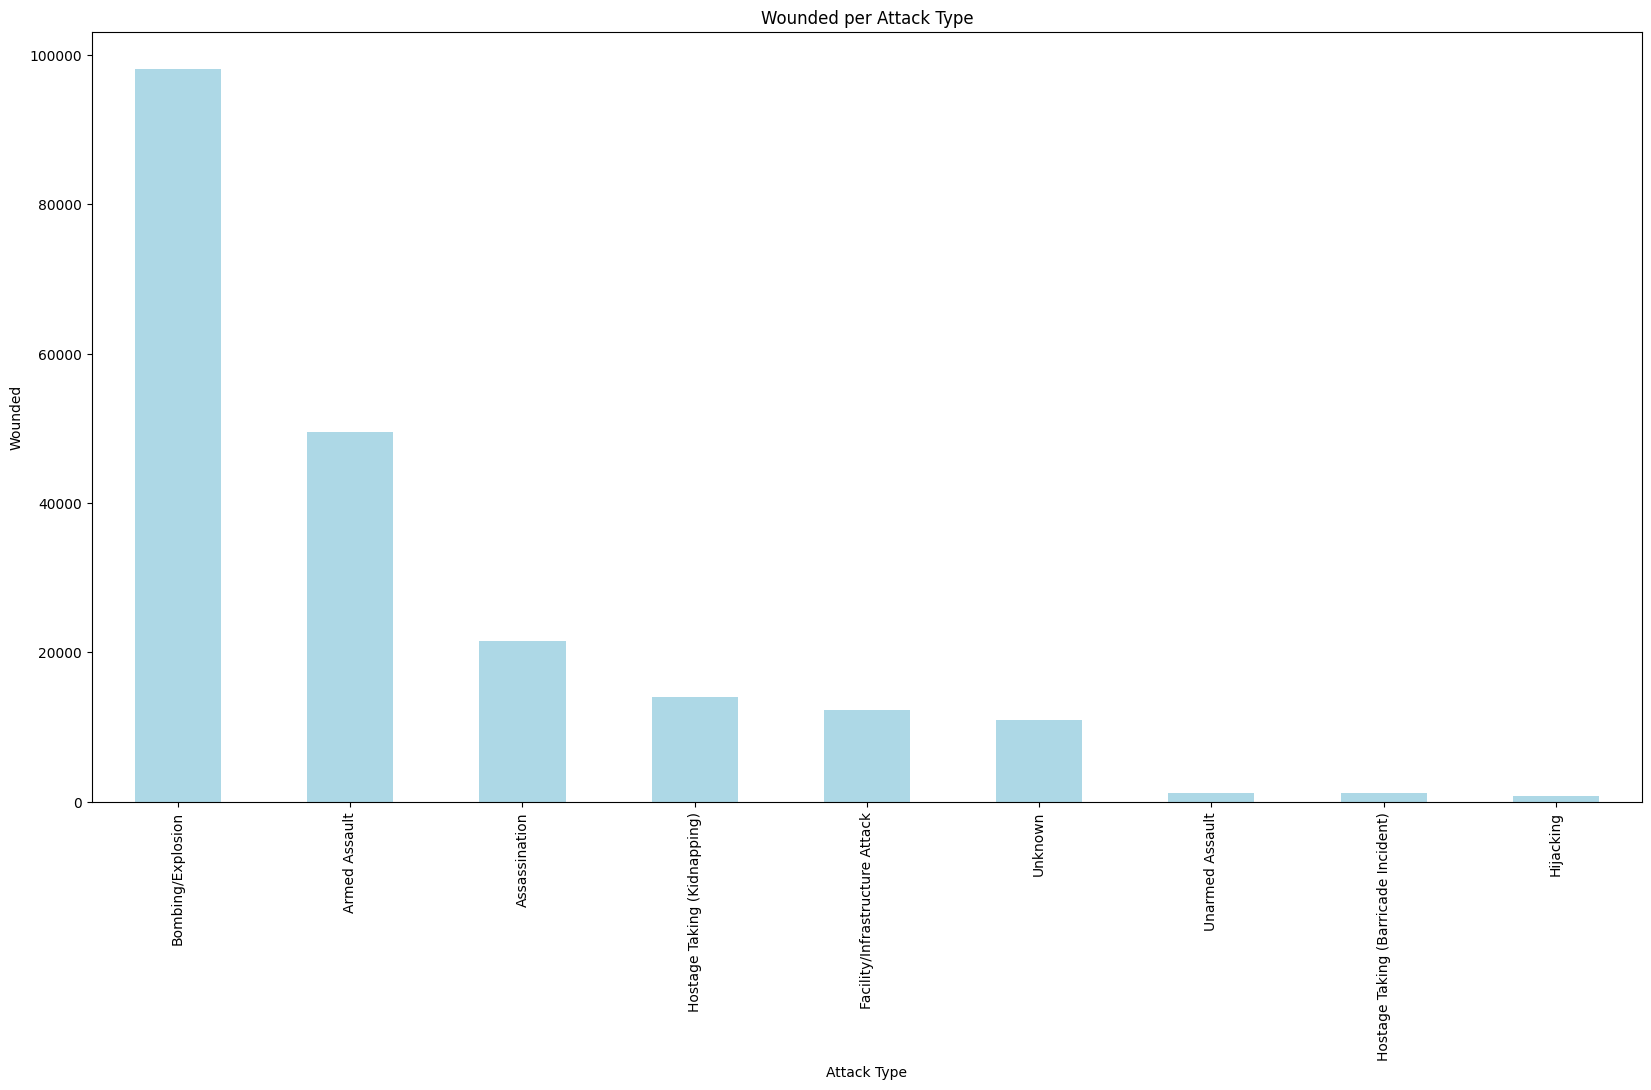

In [233]:
#Plot Wounded Data

ATWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Wounded")
plt.show()

1. The least number of wounds were done by Hijacking with wounds 759
2. The most number of wounds were done by Bombing/Explosion with wounds 98158

### 10. Visualize Data (Target Type)

In [234]:
#Target Type wise Attacks

TTAtck = g_data["Target Type"].value_counts()

In [235]:
TTAtck.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 22 entries, Private Citizens & Property to Other
Series name: Target Type
Non-Null Count  Dtype
--------------  -----
22 non-null     int64
dtypes: int64(1)
memory usage: 352.0+ bytes


In [236]:
TTAtck.head() #Shows only first 5 rows of the data

Private Citizens & Property    51985
Military                       34131
Police                         28568
Government (General)           23828
Business                       22169
Name: Target Type, dtype: int64

In [237]:
TTAtck.tail() ##Shows only last 5 rows of the data

Tourists                460
Maritime                406
Food or Water Supply    352
Abortion Related        267
Other                   197
Name: Target Type, dtype: int64

In [238]:
TTAtck #Shows the full data

Private Citizens & Property       51985
Military                          34131
Police                            28568
Government (General)              23828
Business                          22169
Unknown                            7174
Transportation                     7173
Utilities                          6328
Religious Figures/Institutions     5107
Educational Institution            4761
Government (Diplomatic)            3802
Terrorists/Non-State Militia       3775
Journalists & Media                3313
Violent Political Party            2079
Airports & Aircraft                1428
Telecommunication                  1275
NGO                                1128
Tourists                            460
Maritime                            406
Food or Water Supply                352
Abortion Related                    267
Other                               197
Name: Target Type, dtype: int64

In [239]:
TTAtck.shape #Gives number of rows and columns

(22,)

In [240]:
TTAtck.describe() #Inform about important statistical terms depending on Data

count       22.000000
mean      9532.090909
std      13775.512311
min        197.000000
25%       1164.750000
50%       3788.500000
75%       7173.750000
max      51985.000000
Name: Target Type, dtype: float64

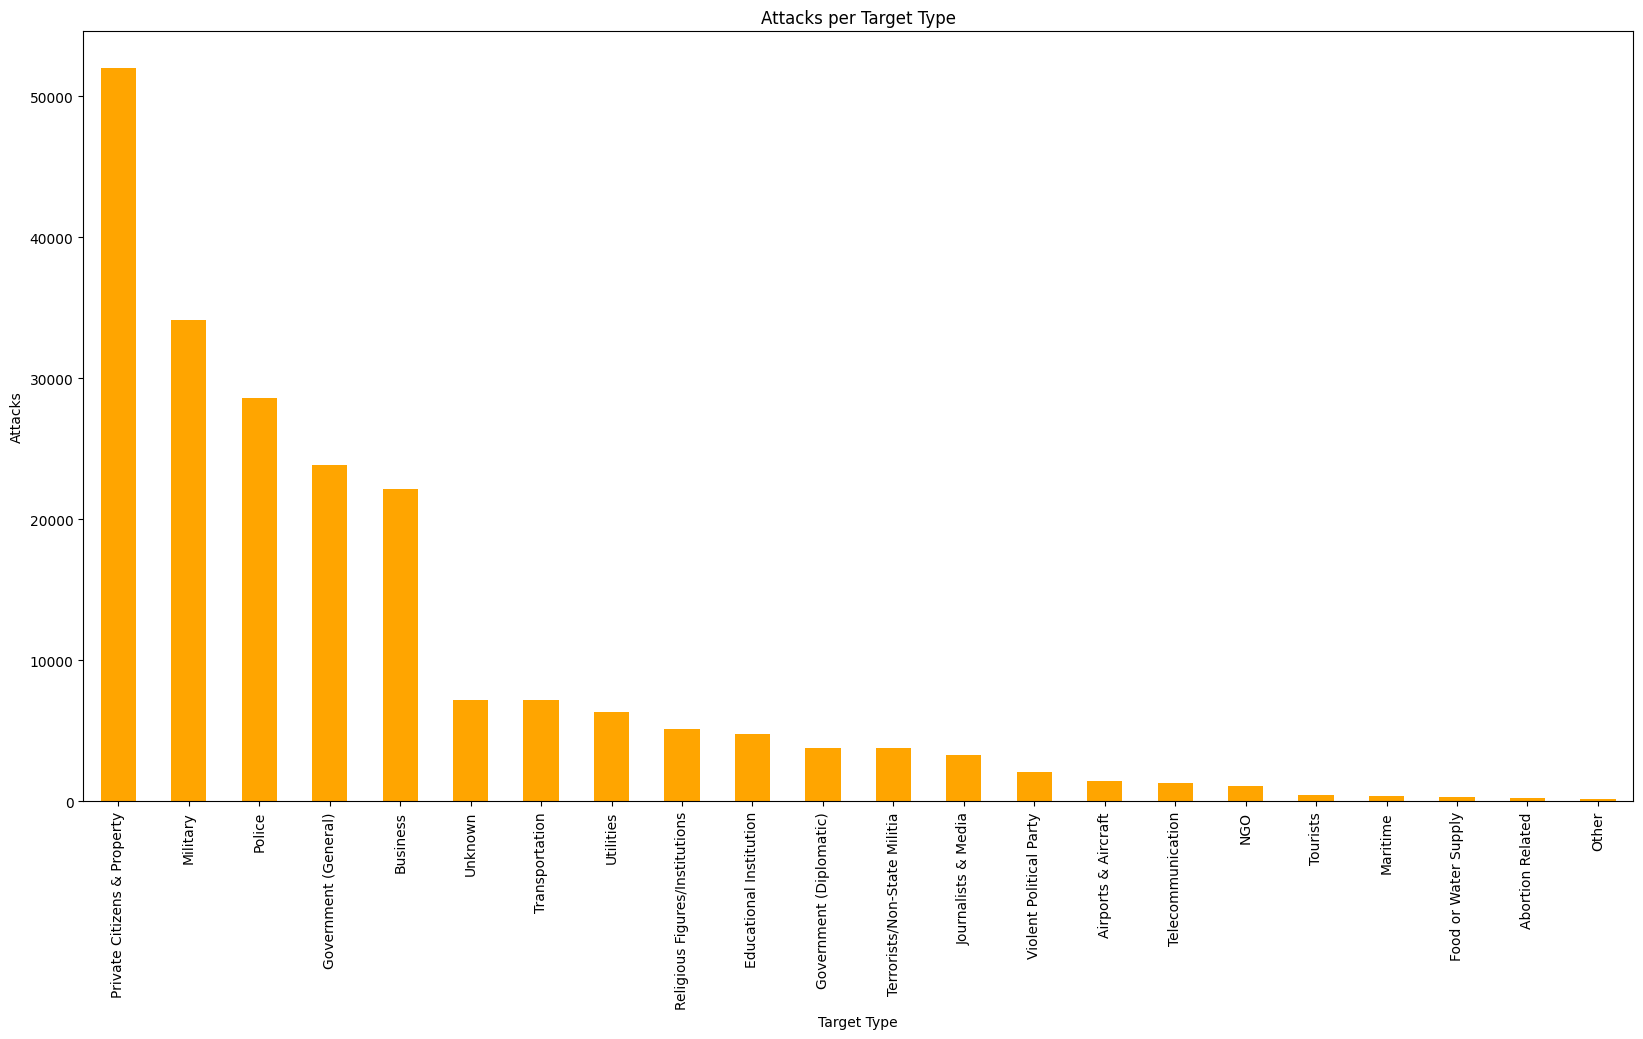

In [241]:
#Plot Attack Data

TTAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Attacks per Target Type")
plt.xlabel("Target Type")
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were on other with attacks 197
2. The most number of attacks were on Private Property and Citizens with attacks 51985

In [242]:
#Target Type wise Casualty

TTCas = g_data["Target Type"].value_counts()

In [243]:
TTCas.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 22 entries, Private Citizens & Property to Other
Series name: Target Type
Non-Null Count  Dtype
--------------  -----
22 non-null     int64
dtypes: int64(1)
memory usage: 352.0+ bytes


In [244]:
TTCas.head() #Shows only first 5 rows of the data

Private Citizens & Property    51985
Military                       34131
Police                         28568
Government (General)           23828
Business                       22169
Name: Target Type, dtype: int64

In [245]:
TTCas.tail() ##Shows only last 5 rows of the data

Tourists                460
Maritime                406
Food or Water Supply    352
Abortion Related        267
Other                   197
Name: Target Type, dtype: int64

In [246]:
TTCas #Shows the full data

Private Citizens & Property       51985
Military                          34131
Police                            28568
Government (General)              23828
Business                          22169
Unknown                            7174
Transportation                     7173
Utilities                          6328
Religious Figures/Institutions     5107
Educational Institution            4761
Government (Diplomatic)            3802
Terrorists/Non-State Militia       3775
Journalists & Media                3313
Violent Political Party            2079
Airports & Aircraft                1428
Telecommunication                  1275
NGO                                1128
Tourists                            460
Maritime                            406
Food or Water Supply                352
Abortion Related                    267
Other                               197
Name: Target Type, dtype: int64

In [247]:
TTCas.shape #Gives number of rows and columns

(22,)

In [248]:
TTCas.describe() #Inform about important statistical terms depending on Data

count       22.000000
mean      9532.090909
std      13775.512311
min        197.000000
25%       1164.750000
50%       3788.500000
75%       7173.750000
max      51985.000000
Name: Target Type, dtype: float64

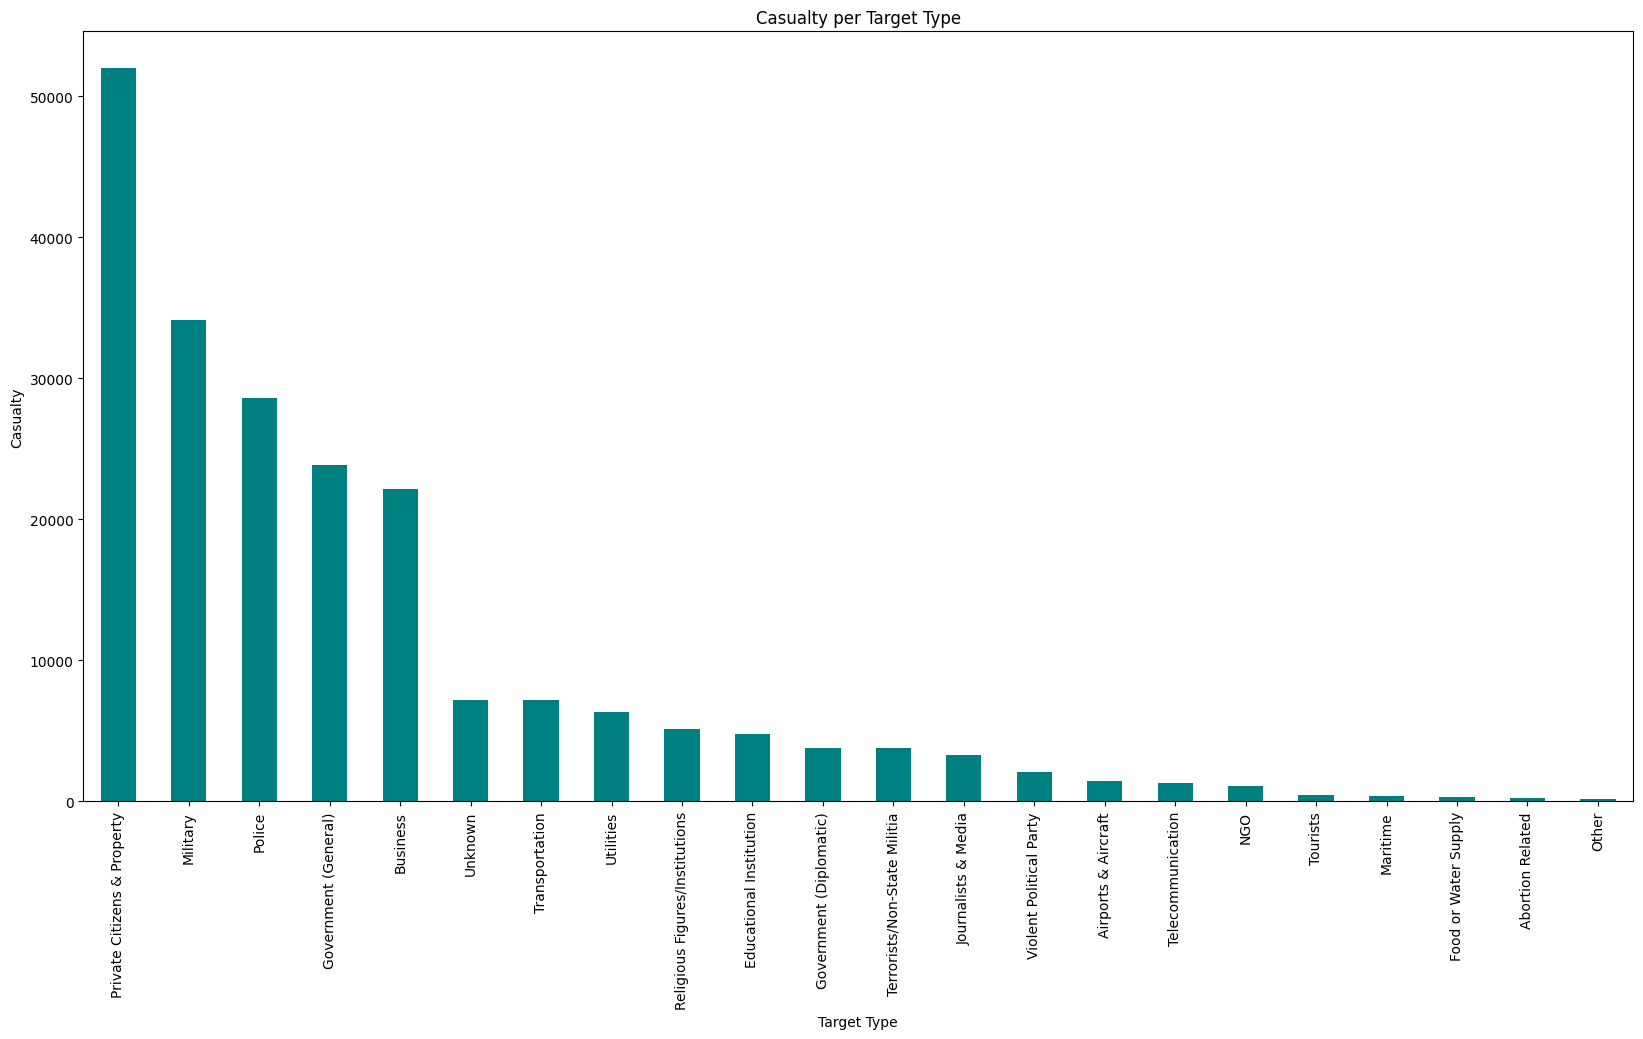

In [249]:
#Plot Casualty Data

TTCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Casualty per Target Type")
plt.xlabel("Target Type")
plt.ylabel("Casualty")
plt.show()

1. The least number of casualties were on other with casualties 197
2. The most number of casualties were on Private Property and Citizens with casualties 51985

In [250]:
#Target Type wise Killed

TTKill = g_data["Target Type"].value_counts()

In [251]:
TTKill.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 22 entries, Private Citizens & Property to Other
Series name: Target Type
Non-Null Count  Dtype
--------------  -----
22 non-null     int64
dtypes: int64(1)
memory usage: 352.0+ bytes


In [252]:
TTKill.head() #Shows only first 5 rows of the data

Private Citizens & Property    51985
Military                       34131
Police                         28568
Government (General)           23828
Business                       22169
Name: Target Type, dtype: int64

In [253]:
TTKill.tail() ##Shows only last 5 rows of the data

Tourists                460
Maritime                406
Food or Water Supply    352
Abortion Related        267
Other                   197
Name: Target Type, dtype: int64

In [254]:
TTKill #Shows the full data

Private Citizens & Property       51985
Military                          34131
Police                            28568
Government (General)              23828
Business                          22169
Unknown                            7174
Transportation                     7173
Utilities                          6328
Religious Figures/Institutions     5107
Educational Institution            4761
Government (Diplomatic)            3802
Terrorists/Non-State Militia       3775
Journalists & Media                3313
Violent Political Party            2079
Airports & Aircraft                1428
Telecommunication                  1275
NGO                                1128
Tourists                            460
Maritime                            406
Food or Water Supply                352
Abortion Related                    267
Other                               197
Name: Target Type, dtype: int64

In [255]:
TTKill.shape #Gives number of rows and columns

(22,)

In [256]:
TTKill.describe() #Inform about important statistical terms depending on Data

count       22.000000
mean      9532.090909
std      13775.512311
min        197.000000
25%       1164.750000
50%       3788.500000
75%       7173.750000
max      51985.000000
Name: Target Type, dtype: float64

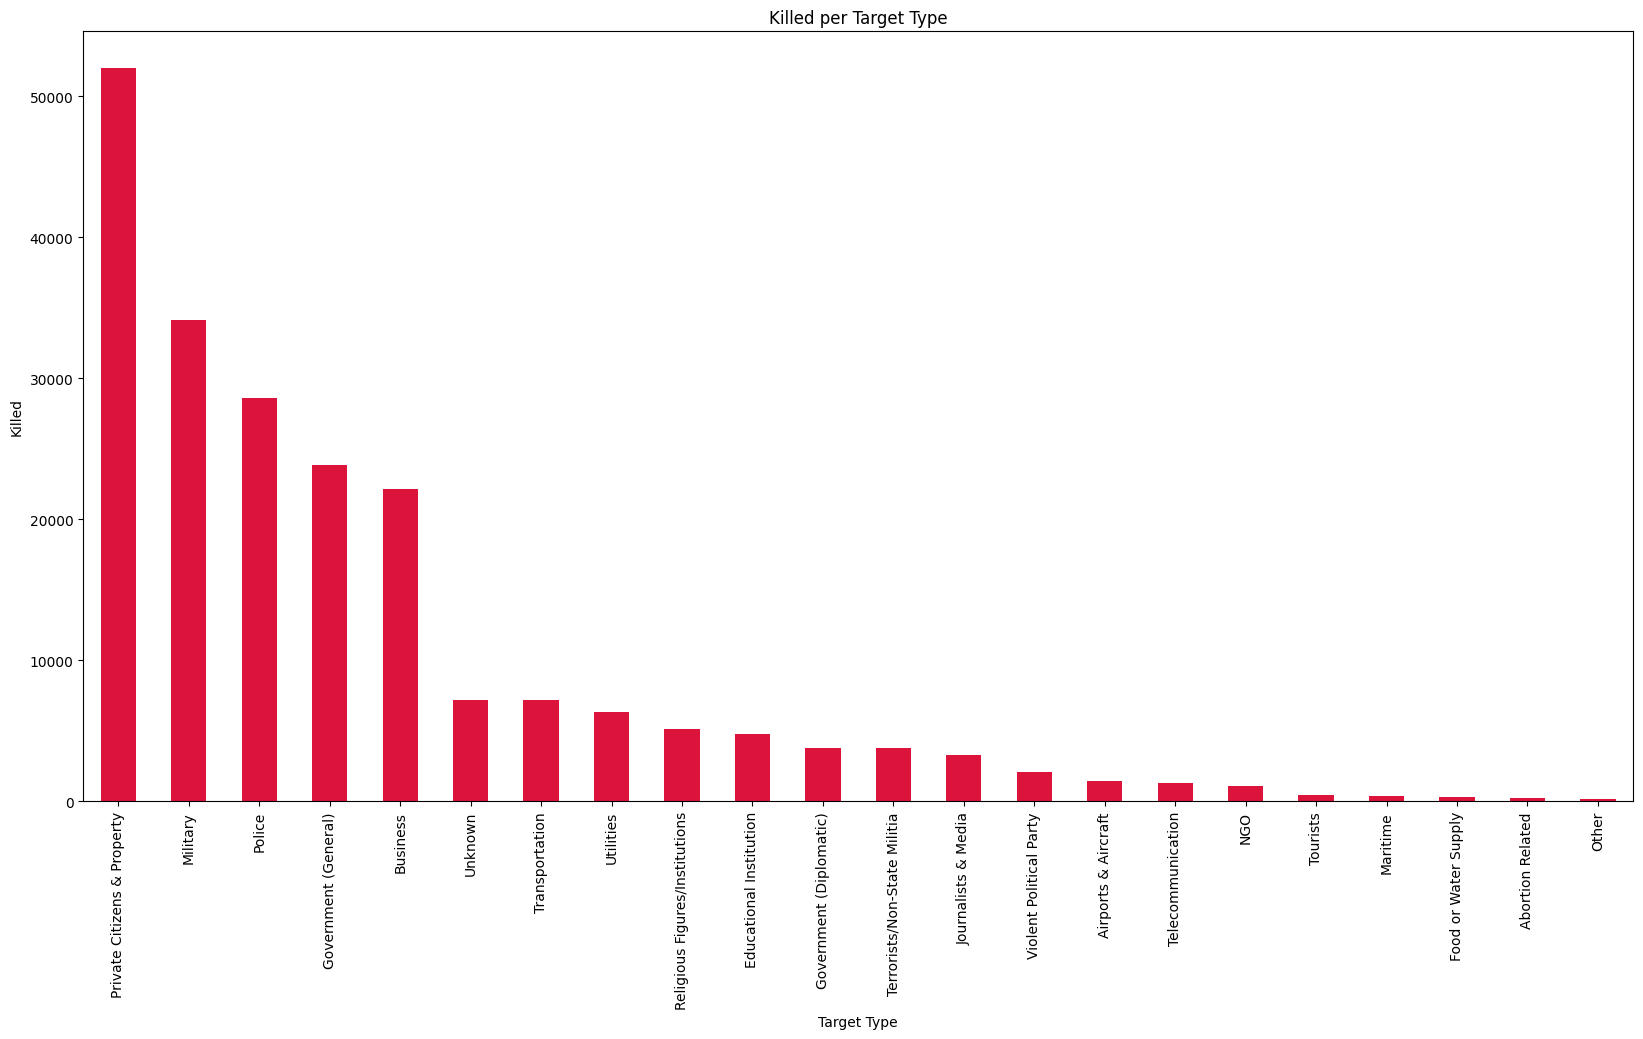

In [257]:
#Plot Killed Data

TTKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Killed per Target Type")
plt.xlabel("Target Type")
plt.ylabel("Killed")
plt.show()

1. The least number of kills were on other with kills 197
2. The most number of kills were on Private Property and Citizens with kills 51985

In [258]:
#Target Type wise Wounded

TTWoun = g_data["Target Type"].value_counts()

In [259]:
TTWoun.info() #Information about Data

<class 'pandas.core.series.Series'>
Index: 22 entries, Private Citizens & Property to Other
Series name: Target Type
Non-Null Count  Dtype
--------------  -----
22 non-null     int64
dtypes: int64(1)
memory usage: 352.0+ bytes


In [260]:
TTWoun.head() #Shows only first 5 rows of the data

Private Citizens & Property    51985
Military                       34131
Police                         28568
Government (General)           23828
Business                       22169
Name: Target Type, dtype: int64

In [261]:
TTWoun.tail() ##Shows only last 5 rows of the data

Tourists                460
Maritime                406
Food or Water Supply    352
Abortion Related        267
Other                   197
Name: Target Type, dtype: int64

In [262]:
TTWoun #Shows the full data

Private Citizens & Property       51985
Military                          34131
Police                            28568
Government (General)              23828
Business                          22169
Unknown                            7174
Transportation                     7173
Utilities                          6328
Religious Figures/Institutions     5107
Educational Institution            4761
Government (Diplomatic)            3802
Terrorists/Non-State Militia       3775
Journalists & Media                3313
Violent Political Party            2079
Airports & Aircraft                1428
Telecommunication                  1275
NGO                                1128
Tourists                            460
Maritime                            406
Food or Water Supply                352
Abortion Related                    267
Other                               197
Name: Target Type, dtype: int64

In [263]:
TTWoun.shape #Gives number of rows and columns

(22,)

In [264]:
TTWoun.describe() #Inform about important statistical terms depending on Data

count       22.000000
mean      9532.090909
std      13775.512311
min        197.000000
25%       1164.750000
50%       3788.500000
75%       7173.750000
max      51985.000000
Name: Target Type, dtype: float64

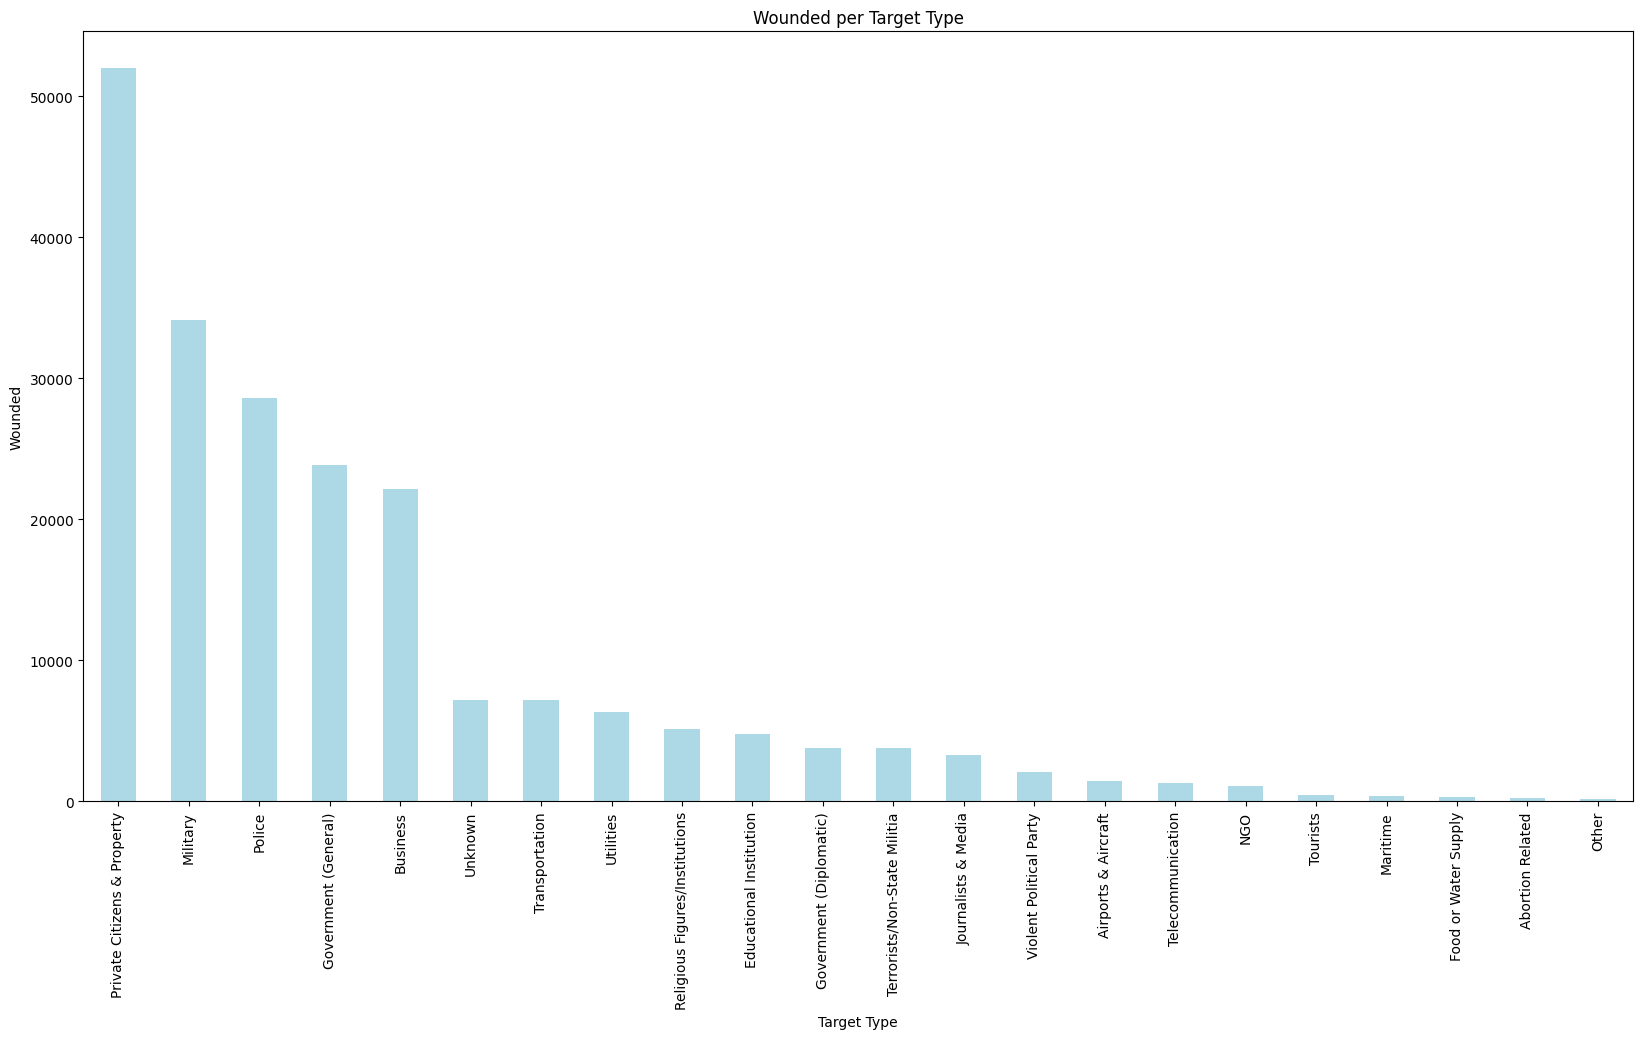

In [265]:
#Plot Wounded Data

TTWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Wounded per Target Type")
plt.xlabel("Target Type")
plt.ylabel("Wounded")
plt.show()

1. The least number of wounds were on other with wounds 197
2. The most number of wounds were on Private Property and Citizens with wounds 51985

### 11. Visualize Data (Country and Group)

In [266]:
#Terrorist Group and Country wise Attacks

TCAtck = g_data[["Group Name", "Country"]].value_counts().drop("Unknown").head(20)

In [267]:
TCAtck.info() #Information about Data

<class 'pandas.core.series.Series'>
MultiIndex: 20 entries, ('Taliban', 'Afghanistan') to ('Nicaraguan Democratic Force (FDN)', 'Nicaragua')
Series name: None
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 168.2+ KB


In [268]:
TCAtck.head() #Shows only first 5 rows of the data

Group Name                                   Country    
Taliban                                      Afghanistan    11926
Islamic State of Iraq and the Levant (ISIL)  Iraq            6182
Shining Path (SL)                            Peru            4550
Al-Shabaab                                   Somalia         3849
New People's Army (NPA)                      Philippines     3393
dtype: int64

In [269]:
TCAtck.tail() ##Shows only last 5 rows of the data

Group Name                                Country  
Liberation Tigers of Tamil Eelam (LTTE)   Sri Lanka    1592
Tehrik-i-Taliban Pakistan (TTP)           Pakistan     1471
Al-Qaida in the Arabian Peninsula (AQAP)  Yemen        1098
Fulani extremists                         Nigeria      1075
Nicaraguan Democratic Force (FDN)         Nicaragua     886
dtype: int64

In [270]:
TCAtck #Shows the full data

Group Name                                        Country       
Taliban                                           Afghanistan       11926
Islamic State of Iraq and the Levant (ISIL)       Iraq               6182
Shining Path (SL)                                 Peru               4550
Al-Shabaab                                        Somalia            3849
New People's Army (NPA)                           Philippines        3393
Farabundo Marti National Liberation Front (FMLN)  El Salvador        3330
Houthi extremists (Ansar Allah)                   Yemen              2848
Boko Haram                                        Nigeria            2790
Irish Republican Army (IRA)                       United Kingdom     2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia           2468
Kurdistan Workers' Party (PKK)                    Turkey             2252
Communist Party of India - Maoist (CPI-Maoist)    India              2092
Basque Fatherland and Freedom (ETA)            

In [271]:
TCAtck.shape #Gives number of rows and columns

(20,)

In [272]:
TCAtck.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      2999.250000
std       2460.935207
min        886.000000
25%       1730.000000
50%       2360.000000
75%       3345.750000
max      11926.000000
dtype: float64

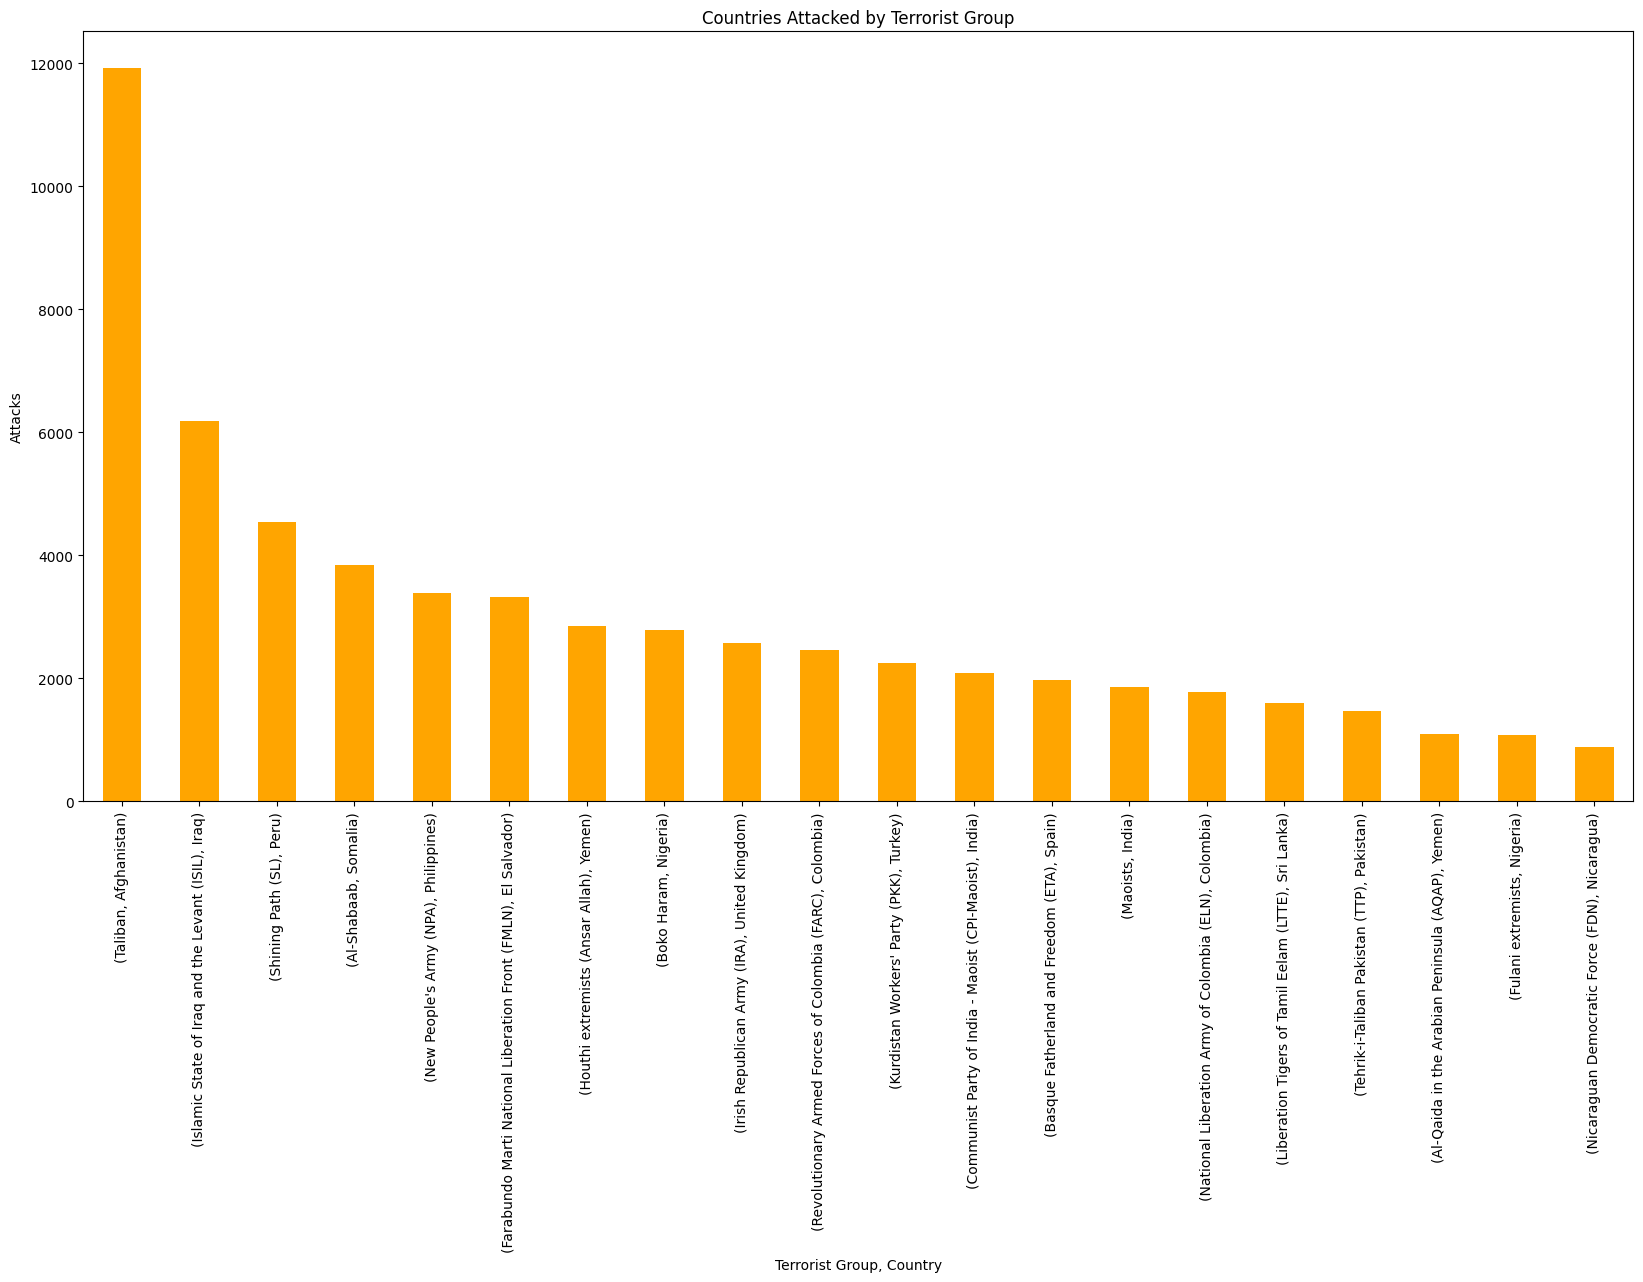

In [273]:
#Plot Attack Data

TCAtck.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Countries Attacked by Terrorist Group")
plt.xlabel("Terrorist Group, Country")
plt.xticks()
plt.ylabel("Attacks")
plt.show()

1. The least number of attacks were done by Nicaraguan Democratic Force (FDN) in Nicaragua with attacks 886
2. The most number of attacks were done by Taliban in Afghanistan with attacks 11926

In [274]:
#Terrorist Group and Country wise Casualty

TCCas = g_data[["Group Name", "Country"]].value_counts().drop("Unknown").head(20)

In [275]:
TCCas.info() #Information about Data

<class 'pandas.core.series.Series'>
MultiIndex: 20 entries, ('Taliban', 'Afghanistan') to ('Nicaraguan Democratic Force (FDN)', 'Nicaragua')
Series name: None
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 168.2+ KB


In [276]:
TCCas.head() #Shows only first 5 rows of the data

Group Name                                   Country    
Taliban                                      Afghanistan    11926
Islamic State of Iraq and the Levant (ISIL)  Iraq            6182
Shining Path (SL)                            Peru            4550
Al-Shabaab                                   Somalia         3849
New People's Army (NPA)                      Philippines     3393
dtype: int64

In [277]:
TCCas.tail() ##Shows only last 5 rows of the data

Group Name                                Country  
Liberation Tigers of Tamil Eelam (LTTE)   Sri Lanka    1592
Tehrik-i-Taliban Pakistan (TTP)           Pakistan     1471
Al-Qaida in the Arabian Peninsula (AQAP)  Yemen        1098
Fulani extremists                         Nigeria      1075
Nicaraguan Democratic Force (FDN)         Nicaragua     886
dtype: int64

In [278]:
TCCas #Shows the full data

Group Name                                        Country       
Taliban                                           Afghanistan       11926
Islamic State of Iraq and the Levant (ISIL)       Iraq               6182
Shining Path (SL)                                 Peru               4550
Al-Shabaab                                        Somalia            3849
New People's Army (NPA)                           Philippines        3393
Farabundo Marti National Liberation Front (FMLN)  El Salvador        3330
Houthi extremists (Ansar Allah)                   Yemen              2848
Boko Haram                                        Nigeria            2790
Irish Republican Army (IRA)                       United Kingdom     2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia           2468
Kurdistan Workers' Party (PKK)                    Turkey             2252
Communist Party of India - Maoist (CPI-Maoist)    India              2092
Basque Fatherland and Freedom (ETA)            

In [279]:
TCCas.shape #Gives number of rows and columns

(20,)

In [280]:
TCCas.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      2999.250000
std       2460.935207
min        886.000000
25%       1730.000000
50%       2360.000000
75%       3345.750000
max      11926.000000
dtype: float64

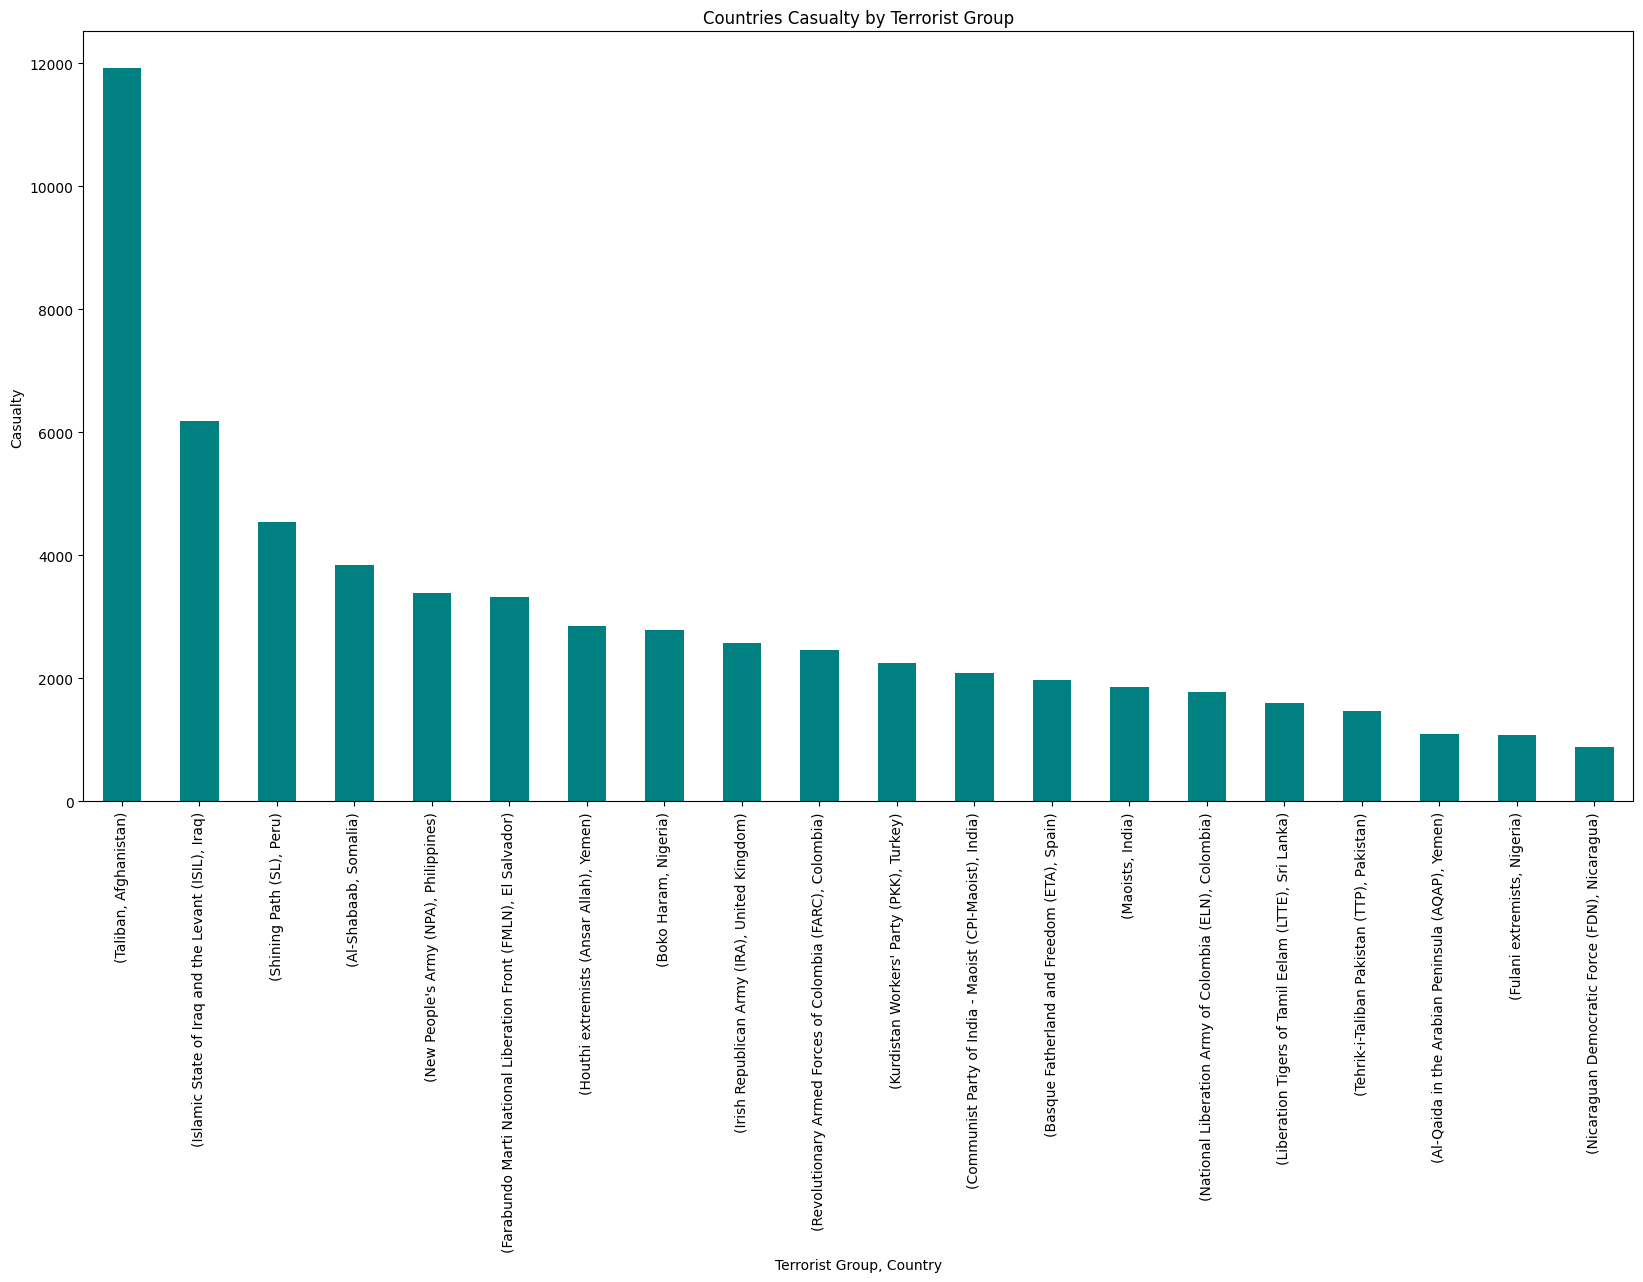

In [281]:
#Plot Casualty Data

TCCas.plot(kind = "bar", color = "teal", figsize = (20,10))
plt.title("Countries Casualty by Terrorist Group")
plt.xlabel("Terrorist Group, Country")
plt.ylabel("Casualty")
plt.show()

1. The least number of casualties were done by Nicaraguan Democratic Force (FDN) in Nicaragua with casualties 886
2. The most number of casualties were done by Taliban in Afghanistan with casualties 11926

In [282]:
#Terrorist Group and Country wise Killed

TCKill = g_data[["Group Name", "Country"]].value_counts().drop("Unknown").head(20)

In [283]:
TCKill.info() #Information about Data

<class 'pandas.core.series.Series'>
MultiIndex: 20 entries, ('Taliban', 'Afghanistan') to ('Nicaraguan Democratic Force (FDN)', 'Nicaragua')
Series name: None
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 168.2+ KB


In [284]:
TCKill.head() #Shows only first 5 rows of the data

Group Name                                   Country    
Taliban                                      Afghanistan    11926
Islamic State of Iraq and the Levant (ISIL)  Iraq            6182
Shining Path (SL)                            Peru            4550
Al-Shabaab                                   Somalia         3849
New People's Army (NPA)                      Philippines     3393
dtype: int64

In [285]:
TCKill.tail() ##Shows only last 5 rows of the data

Group Name                                Country  
Liberation Tigers of Tamil Eelam (LTTE)   Sri Lanka    1592
Tehrik-i-Taliban Pakistan (TTP)           Pakistan     1471
Al-Qaida in the Arabian Peninsula (AQAP)  Yemen        1098
Fulani extremists                         Nigeria      1075
Nicaraguan Democratic Force (FDN)         Nicaragua     886
dtype: int64

In [286]:
TCKill #Shows the full data

Group Name                                        Country       
Taliban                                           Afghanistan       11926
Islamic State of Iraq and the Levant (ISIL)       Iraq               6182
Shining Path (SL)                                 Peru               4550
Al-Shabaab                                        Somalia            3849
New People's Army (NPA)                           Philippines        3393
Farabundo Marti National Liberation Front (FMLN)  El Salvador        3330
Houthi extremists (Ansar Allah)                   Yemen              2848
Boko Haram                                        Nigeria            2790
Irish Republican Army (IRA)                       United Kingdom     2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia           2468
Kurdistan Workers' Party (PKK)                    Turkey             2252
Communist Party of India - Maoist (CPI-Maoist)    India              2092
Basque Fatherland and Freedom (ETA)            

In [287]:
TCKill.shape #Gives number of rows and columns

(20,)

In [288]:
TCKill.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      2999.250000
std       2460.935207
min        886.000000
25%       1730.000000
50%       2360.000000
75%       3345.750000
max      11926.000000
dtype: float64

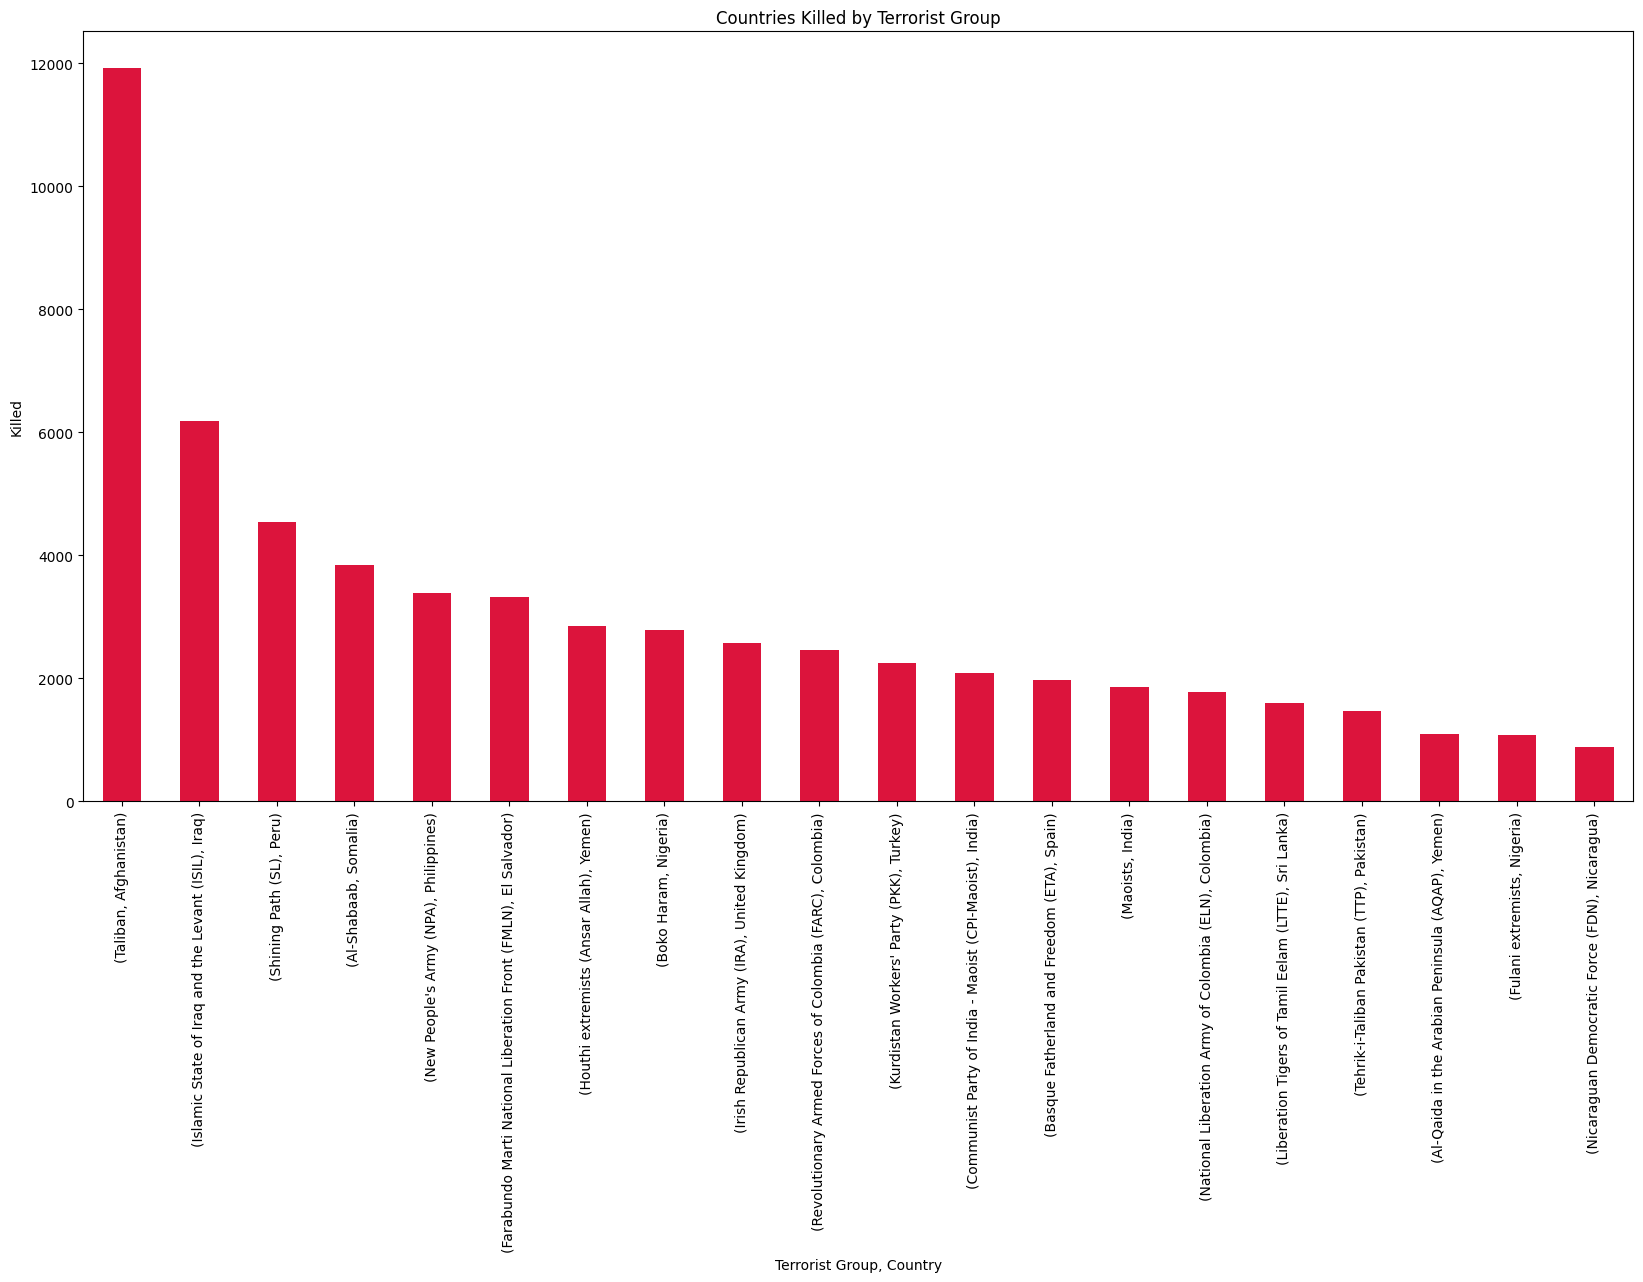

In [289]:
#Plot Killed Data

TCKill.plot(kind = "bar", color = "crimson", figsize = (20,10))
plt.title("Countries Killed by Terrorist Group")
plt.xlabel("Terrorist Group, Country")
plt.ylabel("Killed")
plt.show()

1. The least number of kills were done by Nicaraguan Democratic Force (FDN) in Nicaragua with kills 886
2. The most number of kills were done by Taliban in Afghanistan with kills 11926

In [290]:
#Terrorist Group and Country wise Wounded

TCWoun = g_data[["Group Name", "Country"]].value_counts().drop("Unknown").head(20)

In [291]:
TCWoun.info() #Information about Data

<class 'pandas.core.series.Series'>
MultiIndex: 20 entries, ('Taliban', 'Afghanistan') to ('Nicaraguan Democratic Force (FDN)', 'Nicaragua')
Series name: None
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 168.2+ KB


In [292]:
TCWoun.head() #Shows only first 5 rows of the data

Group Name                                   Country    
Taliban                                      Afghanistan    11926
Islamic State of Iraq and the Levant (ISIL)  Iraq            6182
Shining Path (SL)                            Peru            4550
Al-Shabaab                                   Somalia         3849
New People's Army (NPA)                      Philippines     3393
dtype: int64

In [293]:
TCWoun.tail() ##Shows only last 5 rows of the data

Group Name                                Country  
Liberation Tigers of Tamil Eelam (LTTE)   Sri Lanka    1592
Tehrik-i-Taliban Pakistan (TTP)           Pakistan     1471
Al-Qaida in the Arabian Peninsula (AQAP)  Yemen        1098
Fulani extremists                         Nigeria      1075
Nicaraguan Democratic Force (FDN)         Nicaragua     886
dtype: int64

In [294]:
TCWoun #Shows the full data

Group Name                                        Country       
Taliban                                           Afghanistan       11926
Islamic State of Iraq and the Levant (ISIL)       Iraq               6182
Shining Path (SL)                                 Peru               4550
Al-Shabaab                                        Somalia            3849
New People's Army (NPA)                           Philippines        3393
Farabundo Marti National Liberation Front (FMLN)  El Salvador        3330
Houthi extremists (Ansar Allah)                   Yemen              2848
Boko Haram                                        Nigeria            2790
Irish Republican Army (IRA)                       United Kingdom     2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia           2468
Kurdistan Workers' Party (PKK)                    Turkey             2252
Communist Party of India - Maoist (CPI-Maoist)    India              2092
Basque Fatherland and Freedom (ETA)            

In [295]:
TCWoun.shape #Gives number of rows and columns

(20,)

In [296]:
TCWoun.describe() #Inform about important statistical terms depending on Data

count       20.000000
mean      2999.250000
std       2460.935207
min        886.000000
25%       1730.000000
50%       2360.000000
75%       3345.750000
max      11926.000000
dtype: float64

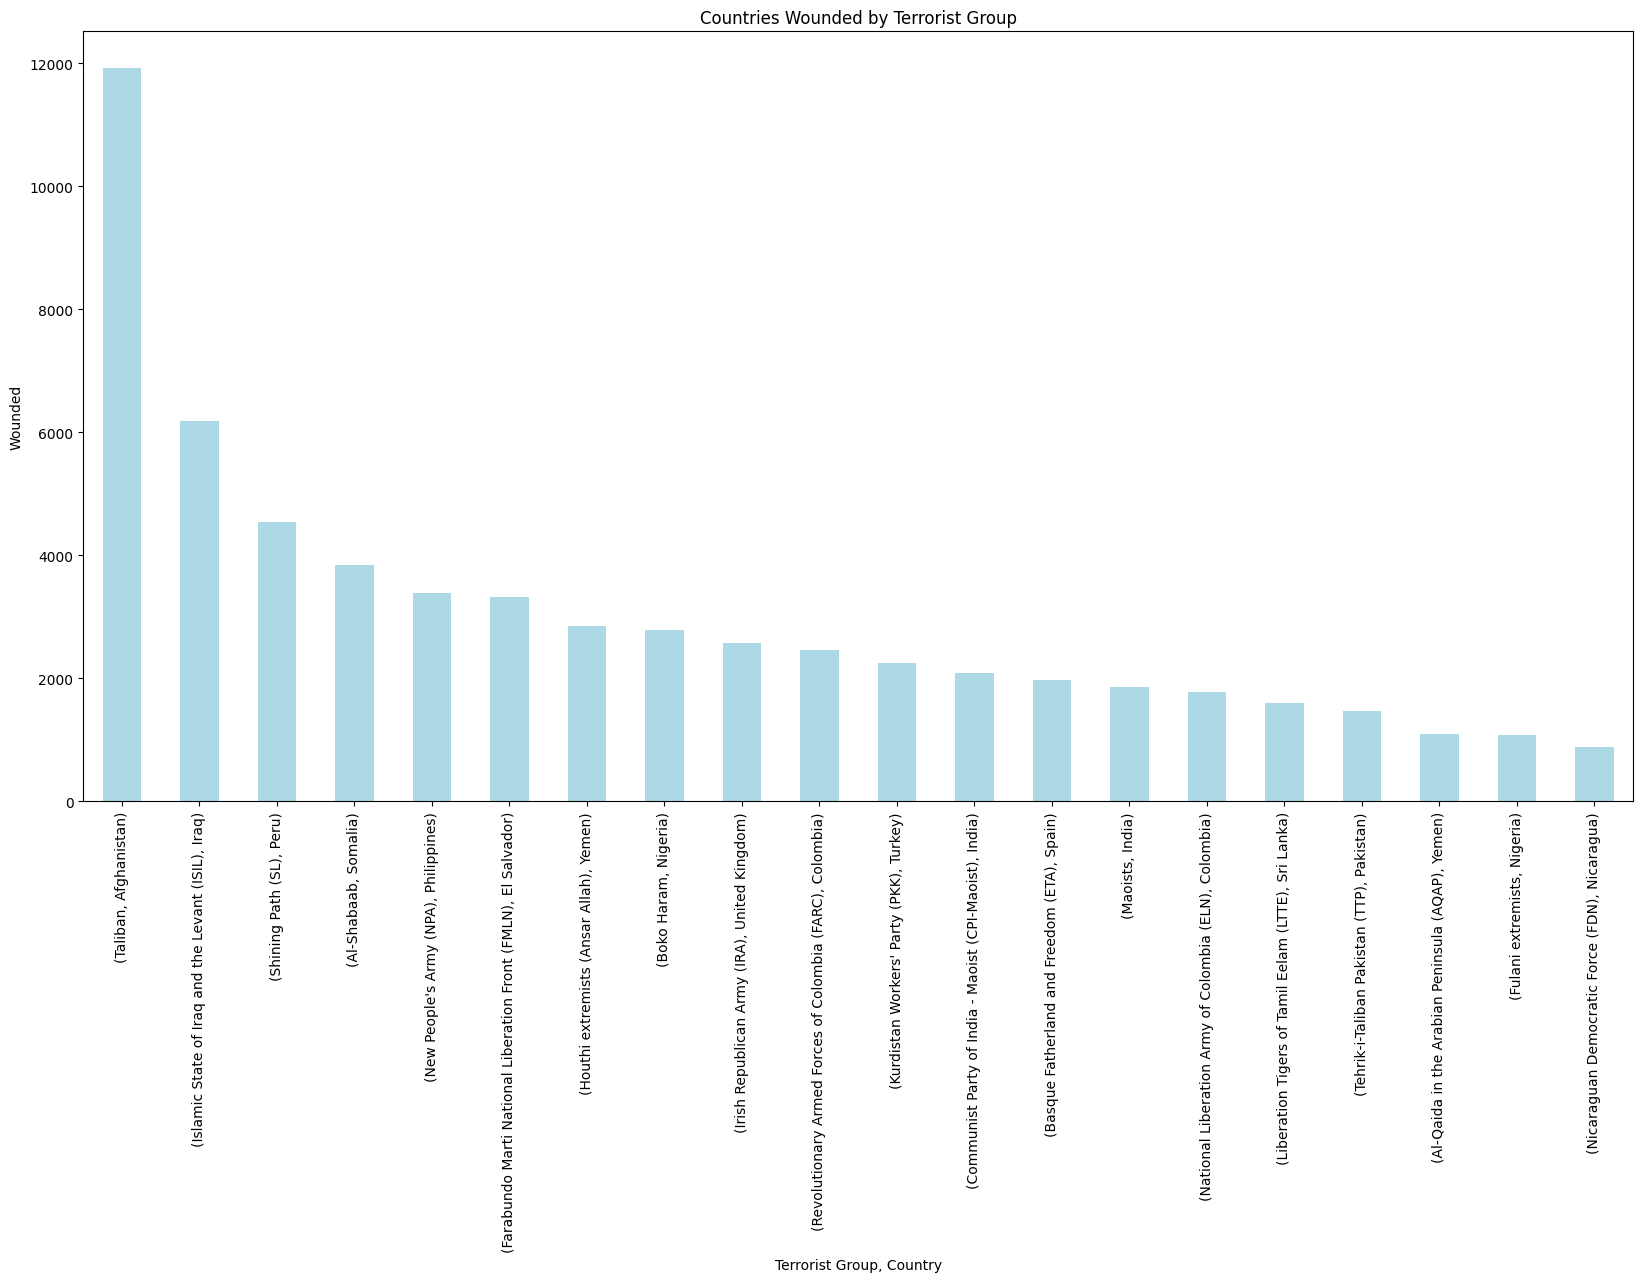

In [297]:
#Plot Wounded Data

TCWoun.plot(kind = "bar", color = "lightblue", figsize = (20,10))
plt.title("Countries Wounded by Terrorist Group")
plt.xlabel("Terrorist Group, Country")
plt.ylabel("Wounded")
plt.show()

1. The least number of wounds were done by Nicaraguan Democratic Force (FDN) in Nicaragua with wounds 886
2. The most number of wounds were done by Taliban in Afghanistan with wounds 11926

### 12. Humanity Affected World-Wide by Attacks

In [298]:
#Casualty

Cas = g_data.loc[:, "Casualty"].sum()

print("Total number of Casualties accross the world from 1970 to 2020 : ", Cas)

Total number of Casualties accross the world from 1970 to 2020 :  1064954.0


In [299]:
#Killed

Kill = g_data.loc[:, "Killed"].sum()

print("Total number of Killed accross the world from 1970 to 2020 : ", Kill)

Total number of Killed accross the world from 1970 to 2020 :  479348.0


In [300]:
#Wounded

Woun = g_data.loc[:, "Wounded"].sum()

print("Total number of Wounded accross the world from 1970 to 2020 : ", Woun) 

Total number of Wounded accross the world from 1970 to 2020 :  585606.0


### 13. Conclusions

Total number of Casualties accross the world from 1970 to 2020 :  1064954.0

Total number of Killed accross the world from 1970 to 2020 :  479348.0

Total number of Wounded accross the world from 1970 to 2020 :  585606.0
